In [1]:

import pandas as pd
import os

In [6]:
aggr_file_path = 'output/'
aggr_file = os.path.join(aggr_file_path, 'output_full_v3_working.csv')

In [7]:
df = pd.read_csv(aggr_file)

In [20]:
preO_postO = 0
preO_postX = 0
preX_postO = 0
preX_postX = 0
df.loc[:61]

participant  type  exp_cnt  test  conf  ans  real_ans  res     te_time  \
0       dongik   pre        1     1     2    3         2    0   53.734672   
1       dongik   pre        1     2     2    4         5    0   79.666022   
2       dongik   pre        1     3     3    1         1    1   58.094600   
3       dongik   pre        1     4     1    4         2    0   61.311142   
4       dongik   pre        1     5     1    2         1    0   66.657115   
..         ...   ...      ...   ...   ...  ...       ...  ...         ...   
57       jihee  post        1     3     5    1         2    0  311.806630   
58       jihee  post        1     4     5    4         3    0   71.564210   
59       jihee  post        1     5     4    5         4    0  182.686449   
60       jihee   pre        2     1     3    4         4    1   64.999726   
61       jihee   pre        2     2     5    5         4    0   26.771064   

    conf_time  total_time  
0    9.024443    0.000000  
1    2.073507    0.000000  
2    1.575358    0.000000  
3    2.088472    0.000000  
4    1.472333  361.753635  
..        ...         ...  
57   1.855359    0.000000  
58   1.967942    0.000000  
59   2.840055  754.650258  
60   2.128486    0.000000  
61   1.969444    0.000000  

[62 rows x 11 columns]

In [64]:

cnt_dict = {}
for idx_exp_cnt in range(1, 6): # exp_count
    for idx_test_cnt in range(1, 6): # test_count
        for idx_res_type in range(1, 5): # 1: O-O, 2: O-X, 3: X-O, 4: X-X
            dict_key = 'exp'+str(idx_exp_cnt)+'_'+str(idx_test_cnt)+'_'+str(idx_res_type)
            cnt_dict[dict_key] = 0

In [65]:
import numpy as np

for idx in range(0, len(df), 10):
    # print(idx)
    step = 4
    next_idx = idx+step

    pre_line = df.loc[idx : next_idx]
    post_line = df.loc[next_idx+1 : next_idx+1 + step]

    # idx_exp_ 간소화 중
    # pre_exp = pre_line['exp_cnt']
    # pre_test = pre_line['test']
    # post_exp = post_line['exp_cnt']
    # post_test = post_line['test']
    #
    # idx_list = []
    # for exp_cnt_idx in range(0, 5):
    #     idx_list.append('exp' + str(pre_exp[0+exp_cnt_idx]) + '_' + str(pre_test[0+exp_cnt_idx])+'_')
    # print(idx_list)


    pre_list = list(pre_line['res'])
    post_list = list(post_line['res'])

    idx_exp = ''

    for list_idx, list_elem in enumerate(pre_list):
        idx_exp = 'exp' + str(pre_line['exp_cnt'][0+idx+list_idx]) + '_' + str(pre_line['test'][0+idx+list_idx])+'_'
        if list_elem > post_list[list_idx]: # preO-postX
            idx_exp += '2'
        elif list_elem < post_list[list_idx]: # preX-postO
            idx_exp += '3'
        else:
            if list_elem == 0: # preX-postX
                idx_exp += '4'
            else:
                idx_exp += '1'

        cnt_dict[idx_exp] += 1

print(cnt_dict)


{'exp1_1_1': 0, 'exp1_1_2': 1, 'exp1_1_3': 4, 'exp1_1_4': 1, 'exp1_2_1': 0, 'exp1_2_2': 0, 'exp1_2_3': 5, 'exp1_2_4': 1, 'exp1_3_1': 2, 'exp1_3_2': 1, 'exp1_3_3': 1, 'exp1_3_4': 2, 'exp1_4_1': 1, 'exp1_4_2': 1, 'exp1_4_3': 4, 'exp1_4_4': 0, 'exp1_5_1': 0, 'exp1_5_2': 0, 'exp1_5_3': 3, 'exp1_5_4': 3, 'exp2_1_1': 4, 'exp2_1_2': 0, 'exp2_1_3': 1, 'exp2_1_4': 1, 'exp2_2_1': 5, 'exp2_2_2': 0, 'exp2_2_3': 0, 'exp2_2_4': 1, 'exp2_3_1': 2, 'exp2_3_2': 1, 'exp2_3_3': 1, 'exp2_3_4': 2, 'exp2_4_1': 2, 'exp2_4_2': 0, 'exp2_4_3': 4, 'exp2_4_4': 0, 'exp2_5_1': 2, 'exp2_5_2': 0, 'exp2_5_3': 3, 'exp2_5_4': 1, 'exp3_1_1': 5, 'exp3_1_2': 1, 'exp3_1_3': 0, 'exp3_1_4': 0, 'exp3_2_1': 2, 'exp3_2_2': 0, 'exp3_2_3': 1, 'exp3_2_4': 3, 'exp3_3_1': 6, 'exp3_3_2': 0, 'exp3_3_3': 0, 'exp3_3_4': 0, 'exp3_4_1': 4, 'exp3_4_2': 2, 'exp3_4_3': 0, 'exp3_4_4': 0, 'exp3_5_1': 3, 'exp3_5_2': 0, 'exp3_5_3': 3, 'exp3_5_4': 0, 'exp4_1_1': 4, 'exp4_1_2': 1, 'exp4_1_3': 1, 'exp4_1_4': 0, 'exp4_2_1': 4, 'exp4_2_2': 0, 'exp4_2_3

In [67]:
preO_postO = 0 # 1
preO_postX = 0 # 2
preX_postO = 0 # 3
preX_postX = 0 # 4

pre_post_dict = {
    '1':0, '2':0, '3':0, '4':0
}

for idx_exp_cnt in range(1, 6): # exp_count
    for idx_test_cnt in range(1, 6): # test_count
        for idx_res_type in range(1, 5): # 1: O-O, 2: O-X, 3: X-O, 4: X-X
            dict_key = 'exp'+str(idx_exp_cnt)+'_'+str(idx_test_cnt)+'_'+str(idx_res_type)
            pre_post_dict[str(idx_res_type)] += cnt_dict[dict_key]

print(pre_post_dict)

{'1': 55, '2': 16, '3': 56, '4': 23}


In [77]:
list_x = ['preO-postO', 'preO-postX', 'preX-postO', 'preX-postX']
list_y = list(pre_post_dict.values())
print(list_x, list_y)

['preO-postO', 'preO-postX', 'preX-postO', 'preX-postX'] [55, 16, 56, 23]


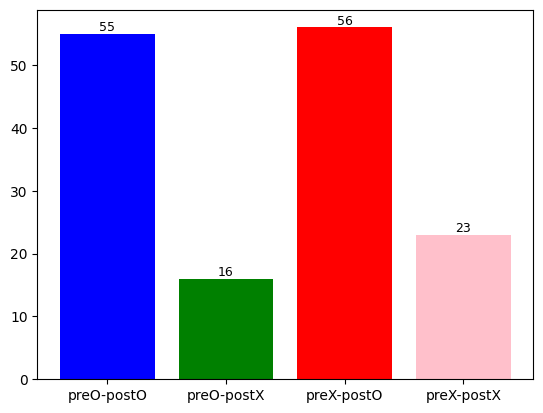

In [83]:
import matplotlib.pyplot as plt

plt.bar(list_x, list_y,
        color=['blue', 'green', 'red', 'pink'])

for i, v in enumerate(list_x):
    plt.text(v, list_y[i], list_y[i],  # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9,
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

In [84]:
df_time = df[['participant', 'type', 'te_time']]
df_time

participant  type    te_time
0        dongik   pre  53.734672
1        dongik   pre  79.666022
2        dongik   pre  58.094600
3        dongik   pre  61.311142
4        dongik   pre  66.657115
..          ...   ...        ...
295       yebon  post  79.027907
296       yebon  post  49.162096
297       yebon  post  42.030709
298       yebon  post  80.223173
299       yebon  post  38.653756

[300 rows x 3 columns]

In [123]:
df_all_time = df_time[['te_time']]
df_pre_tmp = df_time[df_time['type'] == 'pre']
df_post_tmp = df_time[df_time['type'] == 'post']

df_pre_time = df_pre_tmp[['te_time']]
df_post_time = df_post_tmp[['te_time']]

df_all_time
df_pre_time
df_post_time


# print(type(df_time['te_time']))
print(type(df_time[df_time.columns[2]]))

<class 'pandas.core.series.Series'>


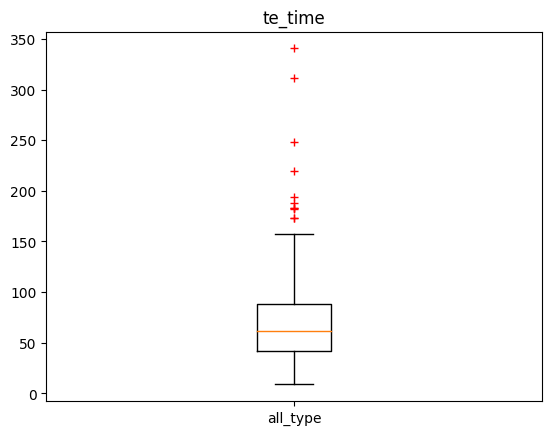

In [125]:
# plt.boxplot(df_all_time, df_pre_time, df_post_time)
# plt.boxplot(df_all_time, sym='r+')
plt.boxplot(df_time[df_time.columns[2]], sym='r+')
plt.title('te_time')
plt.xticks([1], ['all_type'])
plt.show()

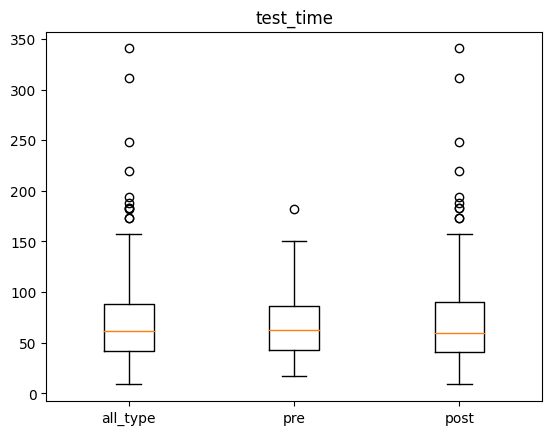

In [132]:
fig,ax = plt.subplots()
# ax.boxplot(df_all_time, df_pre_time, df_post_time)
ax.boxplot([df_time[df_time.columns[2]], df_pre_tmp[df_pre_tmp.columns[2]], df_post_tmp[df_post_tmp.columns[2]]])

plt.title('test_time')
plt.xticks([1,2,3], ['all_type', 'pre', 'post'])
plt.show()

In [161]:
def cut(mydata):
    "데이터의 상한선과 하한선 계산"
    IQR= mydata.quantile(0.75) - mydata.quantile(0.25)
    return pd.DataFrame([[mydata.quantile(0.25)-(1.5*IQR), mydata.quantile(0.75)+(1.5*IQR)]]
                             *mydata.shape[0],
                        columns=['lower', 'upper'],
                        index=mydata.index)

array([[<AxesSubplot:title={'center':'te_time'}>]], dtype=object)

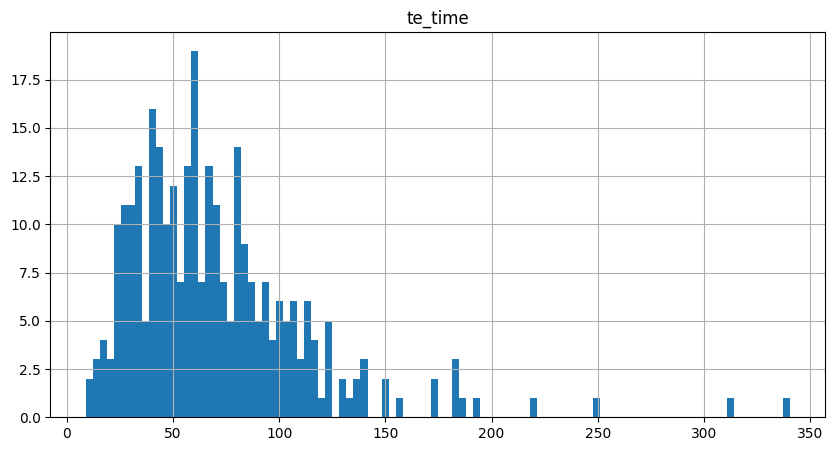

In [166]:
ori_df = df[['te_time']]
ori_df.hist(bins=100, figsize=(10,5))

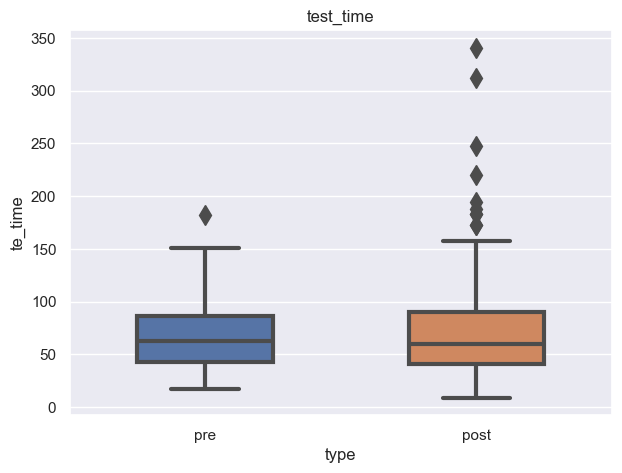

In [183]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(7,5)})
# ax = sns.boxplot(data=[df_time[df_time.columns[2]], df_pre_tmp[df_pre_tmp.columns[2]], df_post_tmp[df_post_tmp.columns[2]]], x='type of test', y='time')

sns.boxplot(x='type', y='te_time', data=df,
# sns.boxplot(y='te_time', data=df,
#                  color='green',
                 width=0.5, # 박스 폭 0~1
                 fliersize=10, # 아웃라이어 마커 사이즈
                 linewidth=3, # 라인 두꼐
                 saturation=0.8 # 색상 채도 0~1
            )

# sns.stripplot(x='type', y='te_time', data=df, jitter=True, color="0.2", size=2)
plt.title('test_time')
plt.show()

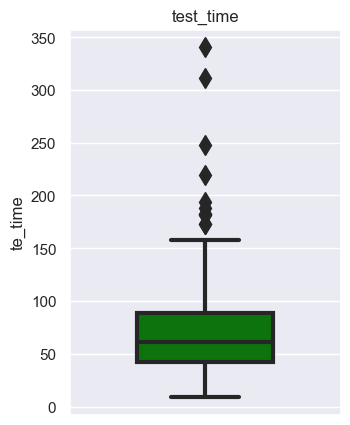

In [187]:
sns.set(rc = {'figure.figsize':(3.5,5)})
sns.boxplot(y='te_time', data=df,
                 color='green',
                 width=0.5, # 박스 폭 0~1
                 fliersize=10, # 아웃라이어 마커 사이즈
                 linewidth=3, # 라인 두꼐
                 saturation=0.8 # 색상 채도 0~1
            )

# sns.stripplot(x='type', y='te_time', data=df, jitter=True, color="0.2", size=2)
plt.title('test_time')
plt.show()

In [181]:
pre_tmp = df[df['type'] == 'pre']
pre_time = pre_tmp['te_time']
pre_Q2 = pre_time.quantile(.5)

post_tmp = df[df['type'] == 'post']
post_time = post_tmp['te_time']
post_Q2 = post_time.quantile(.5)

all_time = df['te_time']
all_Q2 = all_time.quantile(.5)

print(pre_Q2, post_Q2, all_Q2)

62.39913547 59.947119955 61.115680575


In [189]:
# 정답률 관련
all_corr = len(df.loc[df['res'] == 1]) # 전체 정답 개수
pre_corr = len(pre_tmp.loc[df['res'] == 1]) # pre-test 정답 개수
post_corr = len(post_tmp.loc[df['res'] == 1]) # post-test 정답 개수

all_acc = all_corr/300 * 100
pre_acc = pre_corr/150 * 100
post_acc = post_corr/150 * 100

print(all_acc, pre_acc, post_acc)

60.66666666666667 47.333333333333336 74.0


<AxesSubplot:>

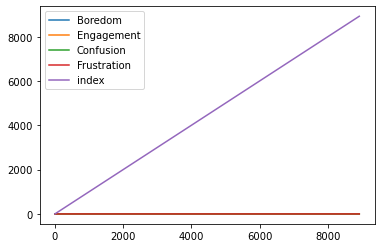

In [31]:
df.plot()

id
110001    AxesSubplot(0.125,0.125;0.775x0.755)
110002    AxesSubplot(0.125,0.125;0.775x0.755)
110004    AxesSubplot(0.125,0.125;0.775x0.755)
110005    AxesSubplot(0.125,0.125;0.775x0.755)
110006    AxesSubplot(0.125,0.125;0.775x0.755)
                          ...                 
882654    AxesSubplot(0.125,0.125;0.775x0.755)
907001    AxesSubplot(0.125,0.125;0.775x0.755)
928901    AxesSubplot(0.125,0.125;0.775x0.755)
940328    AxesSubplot(0.125,0.125;0.775x0.755)
987736    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Engagement, Length: 112, dtype: object

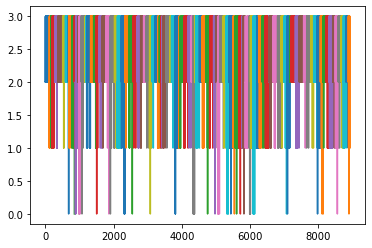

In [32]:
grouped.plot()

In [120]:
# df_mod = df[['id', 'Engagement']]
df_mod2 = df[['id', 'Engagement', 'Boredom', 'Confusion', 'Frustration ']]

df_mod2

id  Engagement  Boredom  Confusion  Frustration 
0     110001           2        0          0             0
1     110001           2        0          0             0
2     110001           3        0          0             0
3     110001           3        0          0             0
4     110001           3        0          0             0
...      ...         ...      ...        ...           ...
8920  987736           3        1          0             0
8921  987736           3        0          0             0
8922  987736           3        1          0             2
8923  987736           3        1          1             1
8924  987736           1        0          0             0

[8925 rows x 5 columns]

<AxesSubplot:>

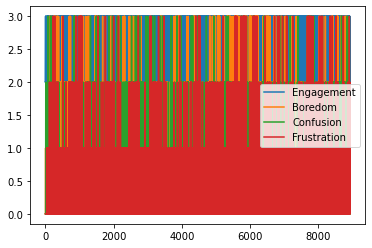

In [121]:
df_mod2.plot()

In [122]:
g_eng = df_mod2.groupby(df['id']).mean()
g_eng

Engagement   Boredom  Confusion  Frustration 
id                                                   
110001    2.894737  0.087719   0.122807      0.061404
110002    2.439024  0.780488   0.658537      0.439024
110004    2.235294  1.088235   0.382353      0.176471
110005    2.139785  1.483871   0.559140      0.290323
110006    2.367089  0.784810   0.164557      0.126582
...            ...       ...        ...           ...
882654    2.725275  0.494505   0.670330      0.208791
907001    2.745455  0.581818   0.800000      0.345455
928901    2.595238  0.678571   0.547619      0.273810
940328    2.626866  0.522388   0.313433      0.164179
987736    2.487805  0.756098   0.634146      0.536585

[112 rows x 4 columns]

ClipID  Boredom  Engagement  Confusion  Frustration       id  \
0     1100011002.avi        0           2          0             0  110001   
1     1100011003.avi        0           2          0             0  110001   
2     1100011004.avi        0           3          0             0  110001   
3     1100011005.avi        0           3          0             0  110001   
4     1100011006.avi        0           3          0             0  110001   
...              ...      ...         ...        ...           ...     ...   
8920  9877360164.avi        1           3          0             0  987736   
8921  9877360165.avi        0           3          0             0  987736   
8922  9877360166.avi        1           3          0             2  987736   
8923  9877360168.avi        1           3          1             1  987736   
8924  9877360169.avi        0           1          0             0  987736   

      index  
0         0  
1         1  
2         2  
3         3  
4         4  
...     ...  
8920   8920  
8921   8921  
8922   8922  
8923   8923  
8924   8924  

[8925 rows x 7 columns]

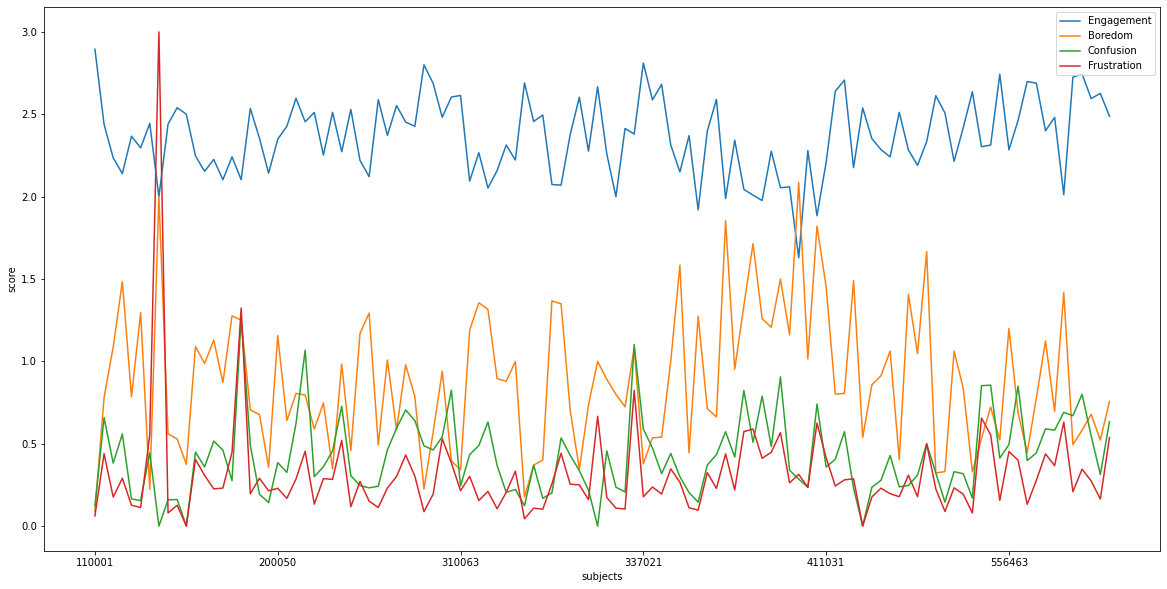

In [135]:
g_eng.plot(figsize=(20, 10))
plt.savefig('./all_mean.png')

plt.xlabel('subjects')
plt.ylabel('score')

g_eng_max = g_eng.max()
g_eng_min = g_eng.min()
g_eng_mean = g_eng.mean()
df

In [140]:
g_eng_max = g_eng.max()
g_eng_min = g_eng.min()
g_eng_mean = g_eng.mean()

print(' max\n', g_eng_max)
print(' min\n', g_eng_min)
print('mean\n', g_eng_mean)

 max
 Engagement      2.894737
Boredom         2.085714
Confusion       1.264706
Frustration     3.000000
dtype: float64
 min
 Engagement      1.628571
Boredom         0.087719
Confusion       0.000000
Frustration     0.000000
dtype: float64
mean
 Engagement      2.365108
Boredom         0.883636
Confusion       0.424431
Frustration     0.314197
dtype: float64


In [124]:
id_info = '110001'

df_sample = df[df['id'] == id_info]
df_sample

ClipID  Boredom  Engagement  Confusion  Frustration       id  \
0    1100011002.avi        0           2          0             0  110001   
1    1100011003.avi        0           2          0             0  110001   
2    1100011004.avi        0           3          0             0  110001   
3    1100011005.avi        0           3          0             0  110001   
4    1100011006.avi        0           3          0             0  110001   
..              ...      ...         ...        ...           ...     ...   
109  1100012063.avi        0           3          0             0  110001   
110  1100012064.avi        0           3          0             0  110001   
111  1100012065.avi        0           3          1             1  110001   
112  1100012066.avi        0           3          0             0  110001   
113  1100012069.avi        0           3          0             0  110001   

     index  
0        0  
1        1  
2        2  
3        3  
4        4  
..     ...  
109    109  
110    110  
111    111  
112    112  
113    113  

[114 rows x 7 columns]

In [149]:
df_sample2 = df[['id', 'Engagement']]
df_sample2

id            object
Engagement     int64
dtype: object

In [196]:
id_list = g_eng.index.to_list()

idx_list = list(range(0, 112))
cnt_list = []
total_list = []
rate_list = []

In [ ]:
total_list = []

for idx in id_list:
    df_sample = df_sample2[df_sample2['id'] == idx]
    df_sample.plot(figsize=(20,10), title=idx)
    
    total_len = len(df_sample)
    total_list.append(total_len)
        
    plt.xlabel('frames')
    plt.ylabel('Engaged')
    plt.ylim([0, 3.2])
#     plt.tight_layout()

    plt.savefig('./onlyEngaged/'+idx+'.png')
#     cnt_len = len(df_sample.loc[df_sample['Engagement'] < 1]) # Engagement 0인 개수
    cnt_len = len(df_sample.loc[df_sample['Engagement'] < 2]) # Engagement 0, 1인 개수
    cnt_list.append(cnt_len)
    
    rate_list.append(cnt_len / total_len) # 한 사람의 전체 강의 point 중 engagement가 특정 threshold 미만인 비율

    
# print(cnt_list)
# print(rate_list)


# print(len(id_list), total_list)
# mean = sum(total_list) / len(total_list)
# print(mean)
# plt.figure(figsize=(20,10))
# plt.plot(total_list)
# plt.show()
#     break

3.17 0.06134344240387034
[0, 3, 2, 6, 3, 0, 0, 0, 2, 1, 1, 3, 7, 3, 9, 3, 10, 3, 0, 1, 5, 0, 3, 2, 3, 1, 3, 7, 2, 10, 11, 1, 3, 2, 3, 2, 0, 2, 6, 1, 0, 8, 1, 4, 1, 3, 0, 1, 0, 2, 15, 7, 3, 4, 2, 0, 1, 13, 0, 5, 0, 3, 3, 3, 5, 1, 15, 1, 2, 13, 8, 10, 22, 13, 3, 8, 16, 14, 7, 27, 7, 6, 2, 8, 0, 3, 8, 7, 1, 8, 8, 0, 0, 0, 7, 0, 1, 2, 2, 1, 15, 6, 1, 3, 13, 1, 25, 1, 2, 5, 1, 4]


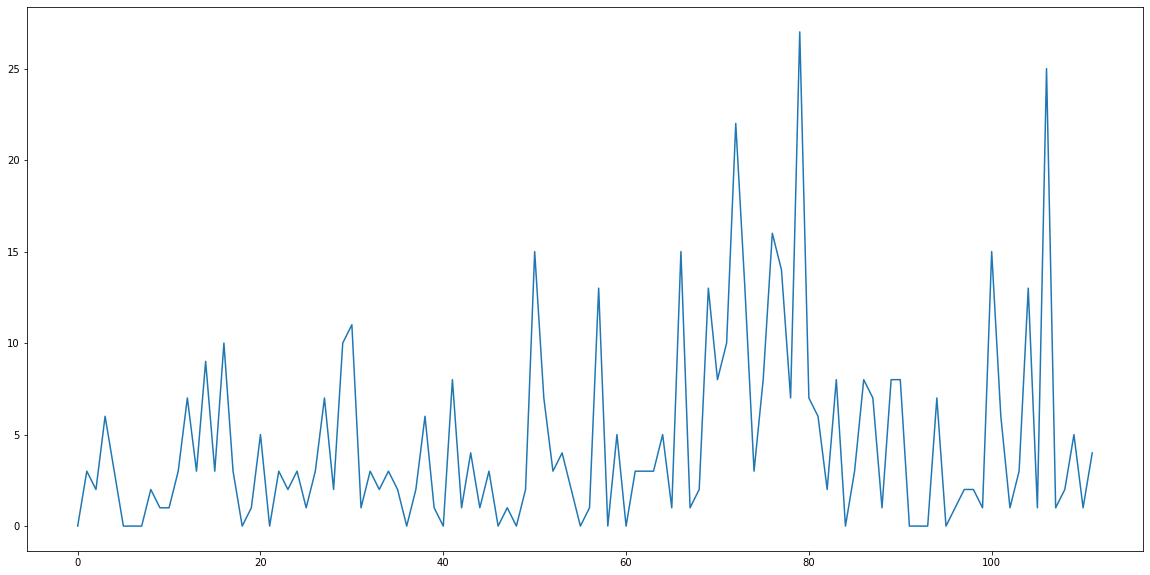

In [213]:
cnt_mean = (sum(cnt_list)-15-15-22-16-27-15-25-11-13-13-14-13) / (len(cnt_list)-12)
# cnt_mean = (sum(cnt_list)-15-15-22-16-27-15-25) / (len(cnt_list)-7)
rate_mean = sum(rate_list) / len(rate_list)
print(cnt_mean, rate_mean)
print(cnt_list)

plt.figure(figsize=(20,10))
plt.plot(cnt_list)
plt.show()

C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


110001
110002
110004


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

110005
110006


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

110007
110008
110010


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


110011
110012


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


110013
110014
110015


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

110016
110017
110041


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


111003
181374


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


200048
200049


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explic

200050
200054


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

202614
205601


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


210051
210052


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


210053
210055

C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]



210056


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


210057
210058
210059


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

210060
210061
226051


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

240846
248510


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


290428
303830


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310062
310063


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310064


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310066


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310068
310069


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310070
310071


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310072
310073


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310074
310075


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310076
310077


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310078


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310079
310080


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310081
310082


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


310083
334463
337021


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

342227
350361
400018


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

400022
400023
400030


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


400033
401835


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


410019
410020


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


410024
410025


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


410026
410027


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


410028
410029


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


410030
410032


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


411021
411031


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


414081
459999


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


500039
500043


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


500044


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


500067
500095


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510009
510034


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510035


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510036
510037


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510038
510040


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510042
510045


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510046


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


510047
522129


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


556463
567496


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


591292
769862


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


799402
826382


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


826412
882654


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

907001
928901
940328


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


987736


C:\Users\dlsxo\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


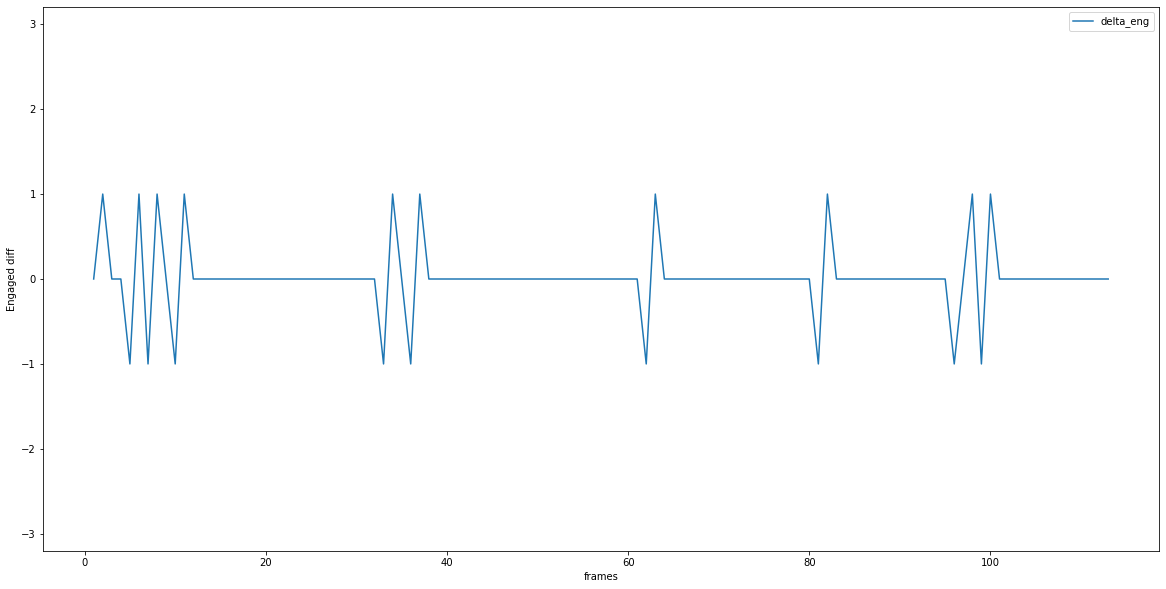

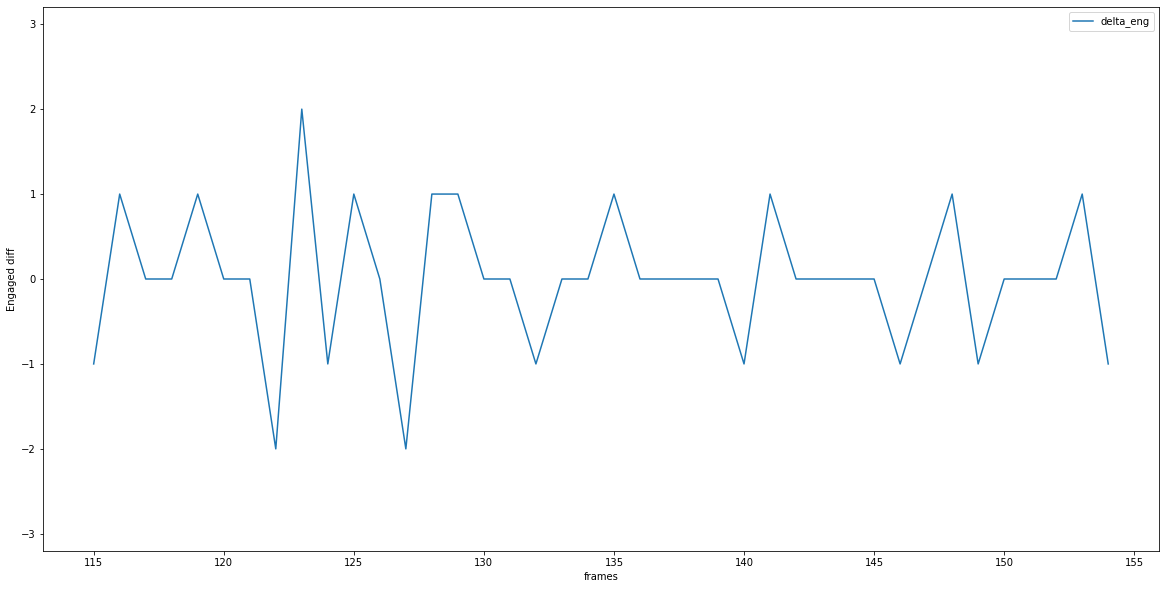

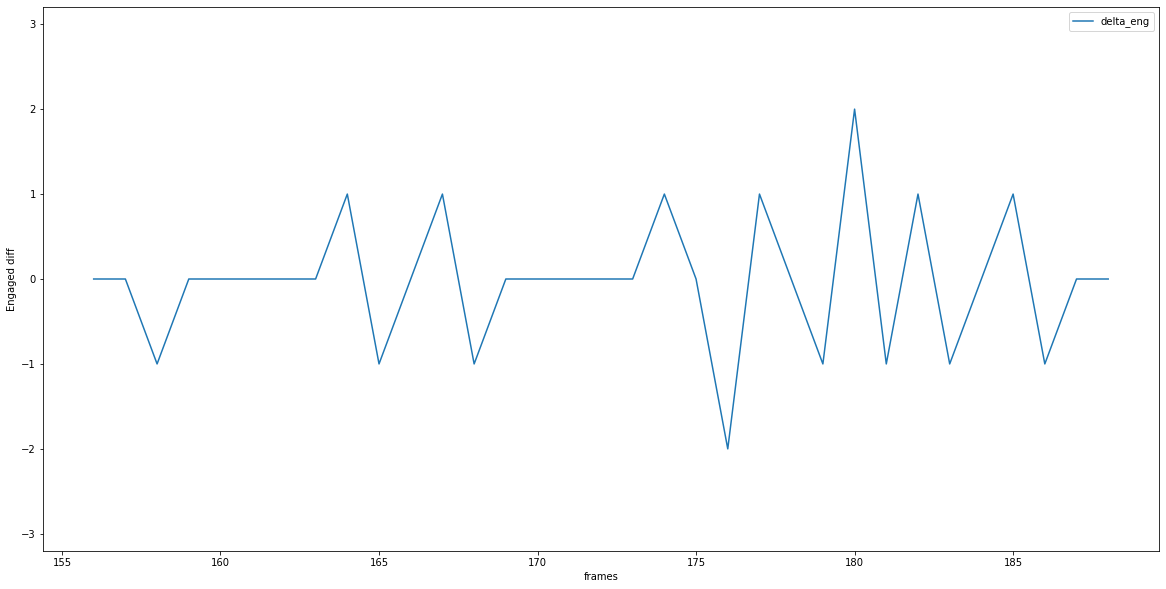

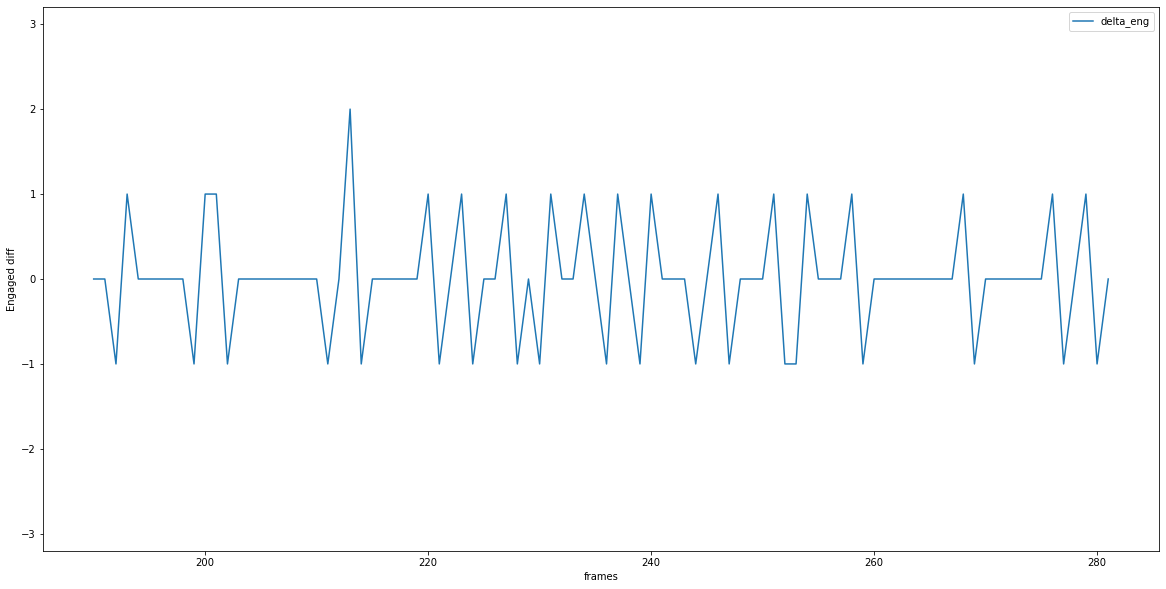

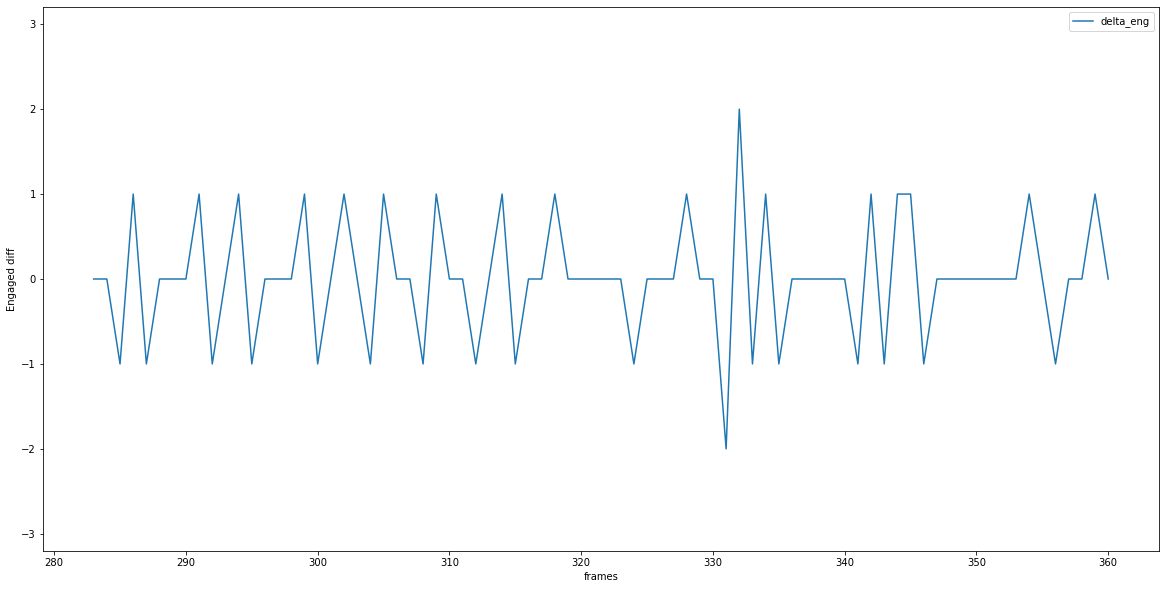

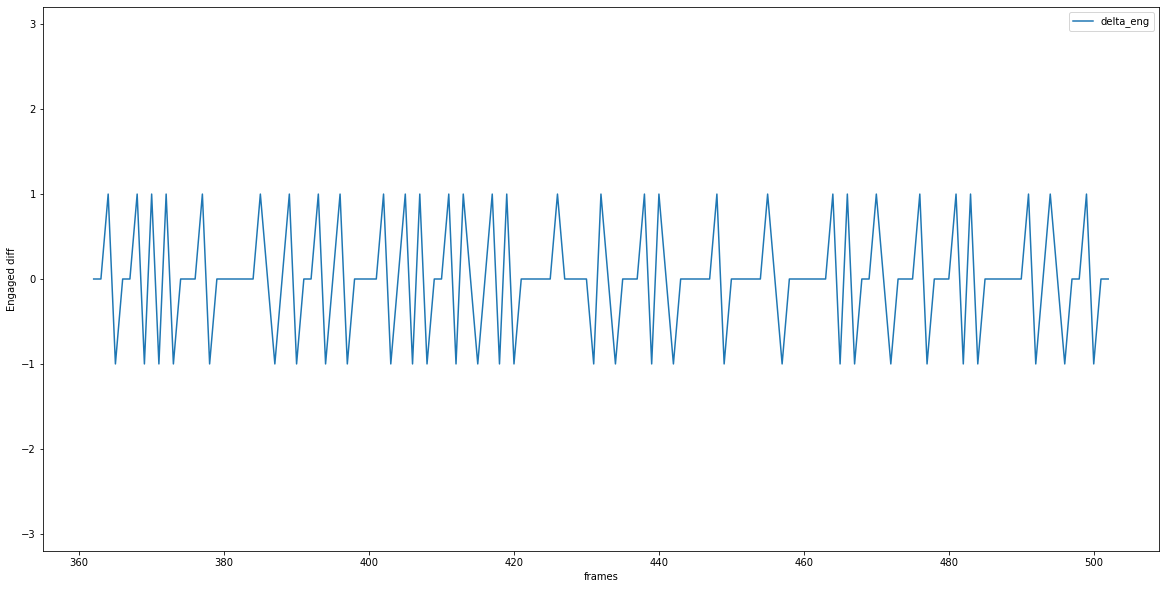

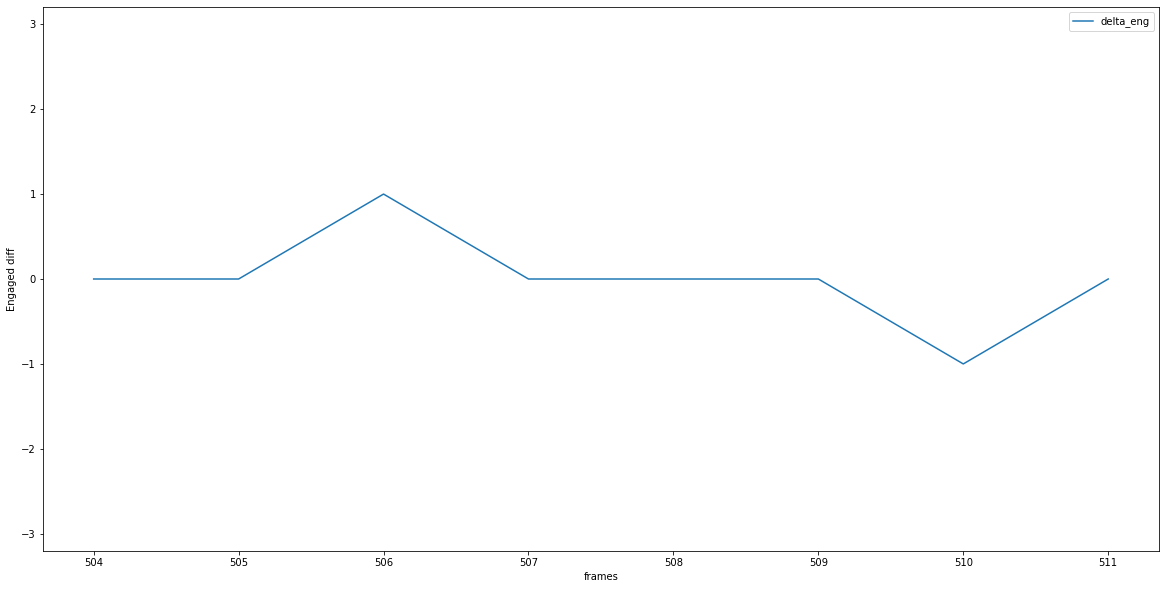

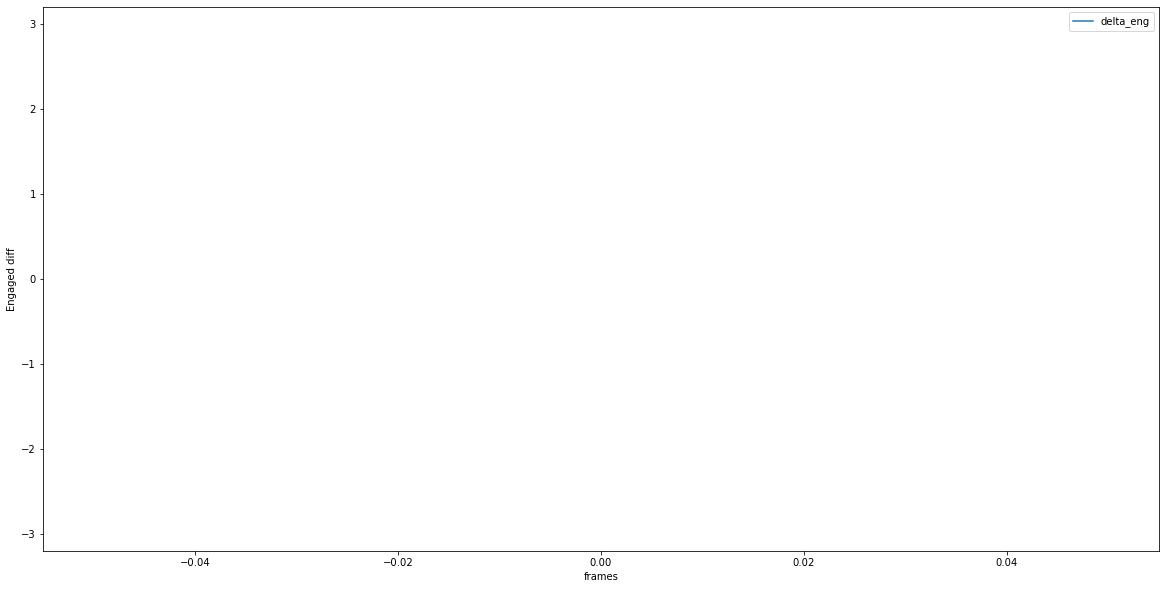

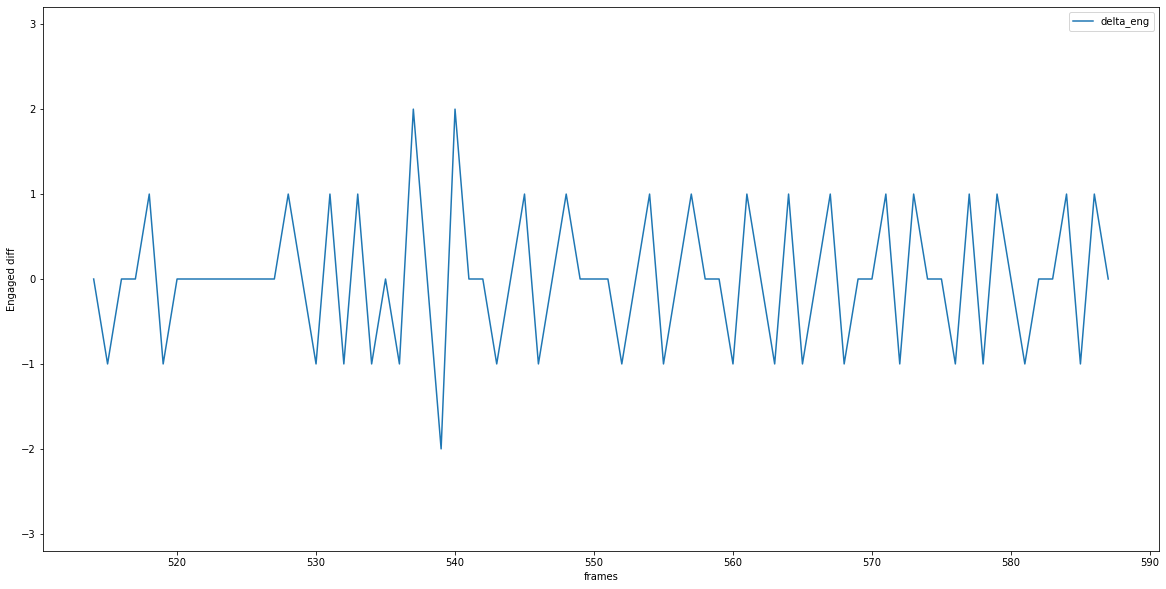

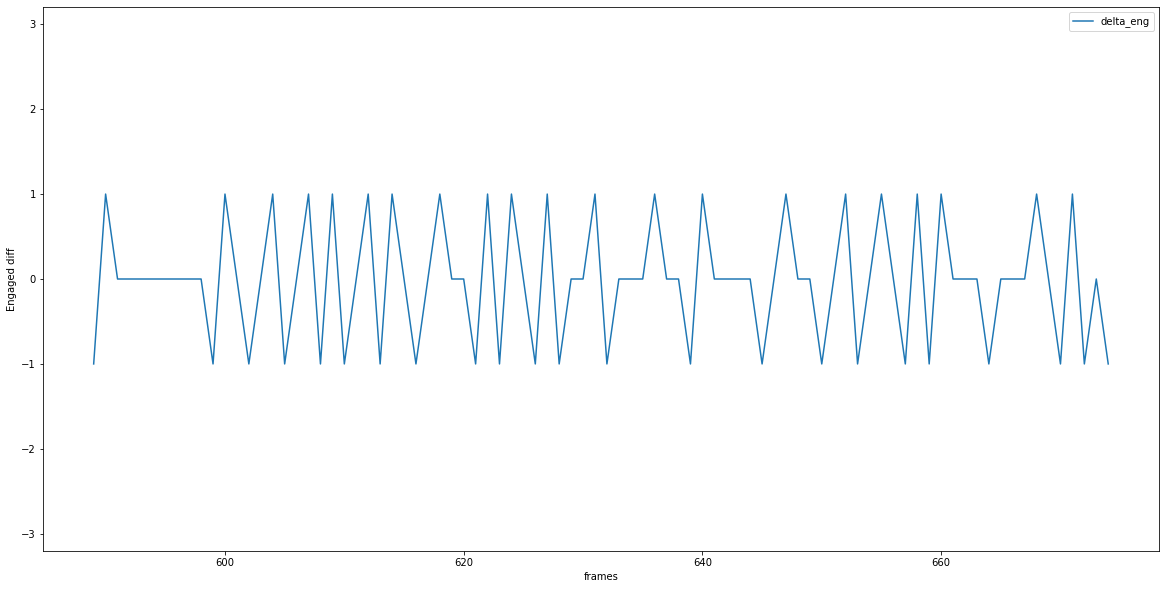

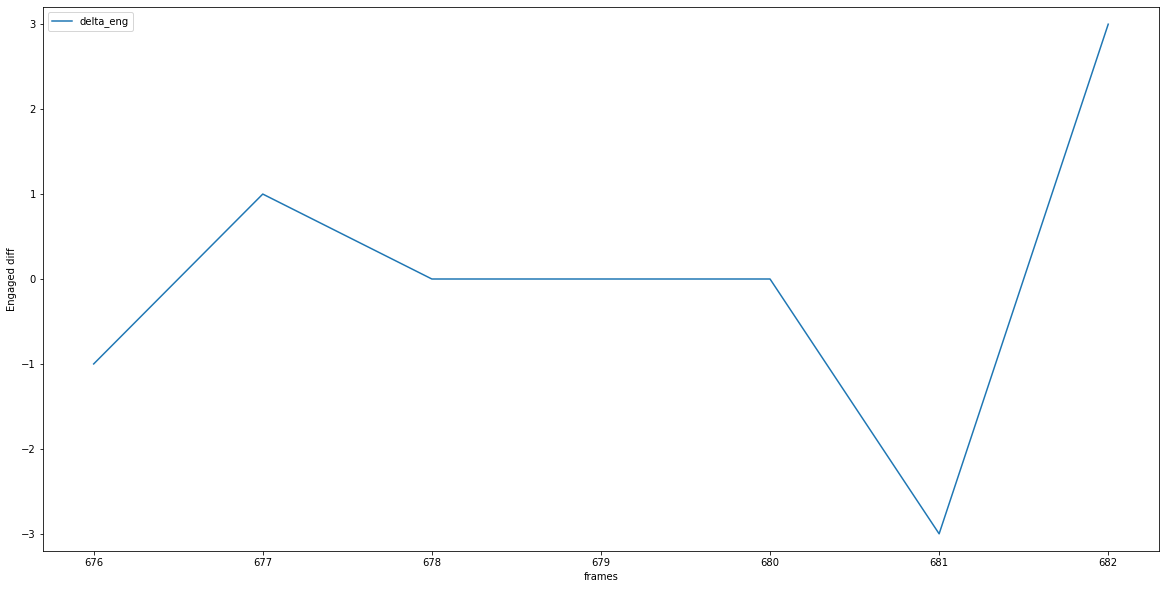

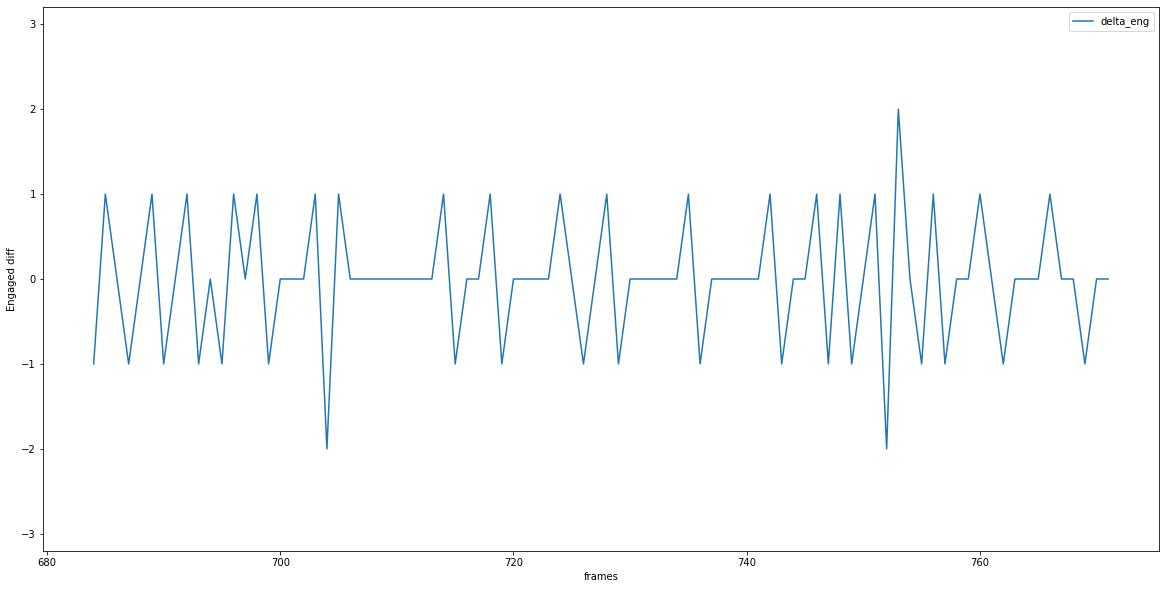

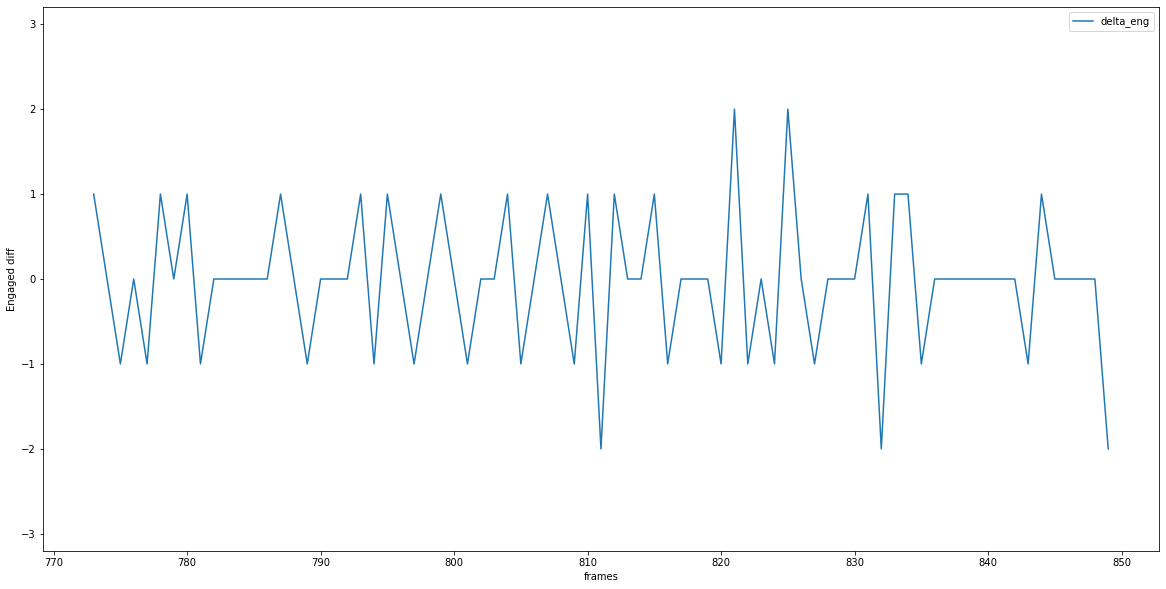

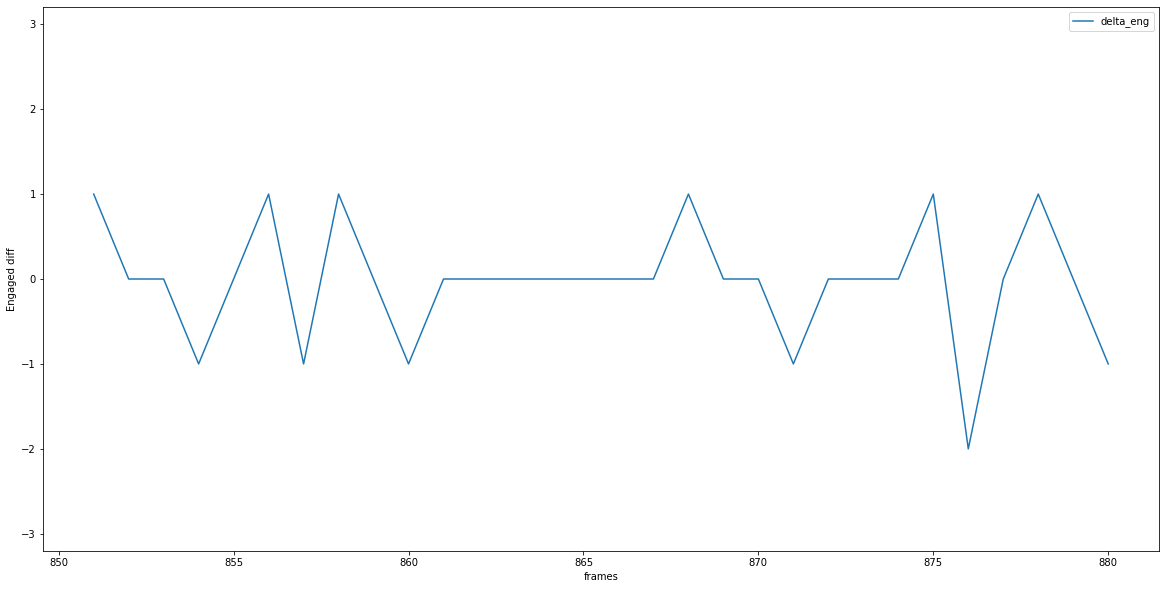

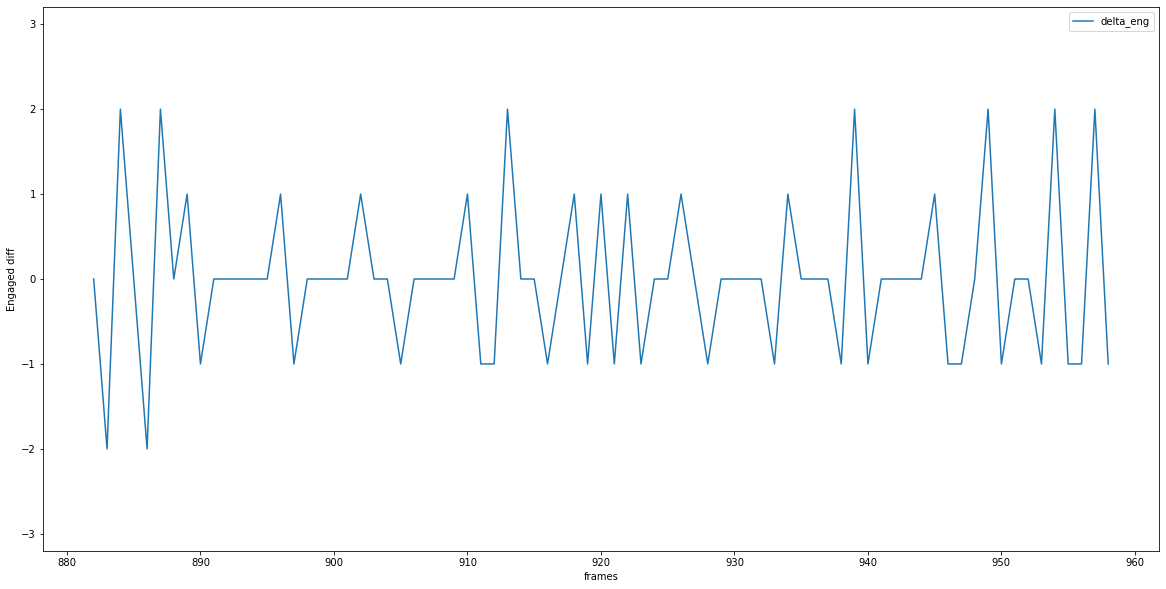

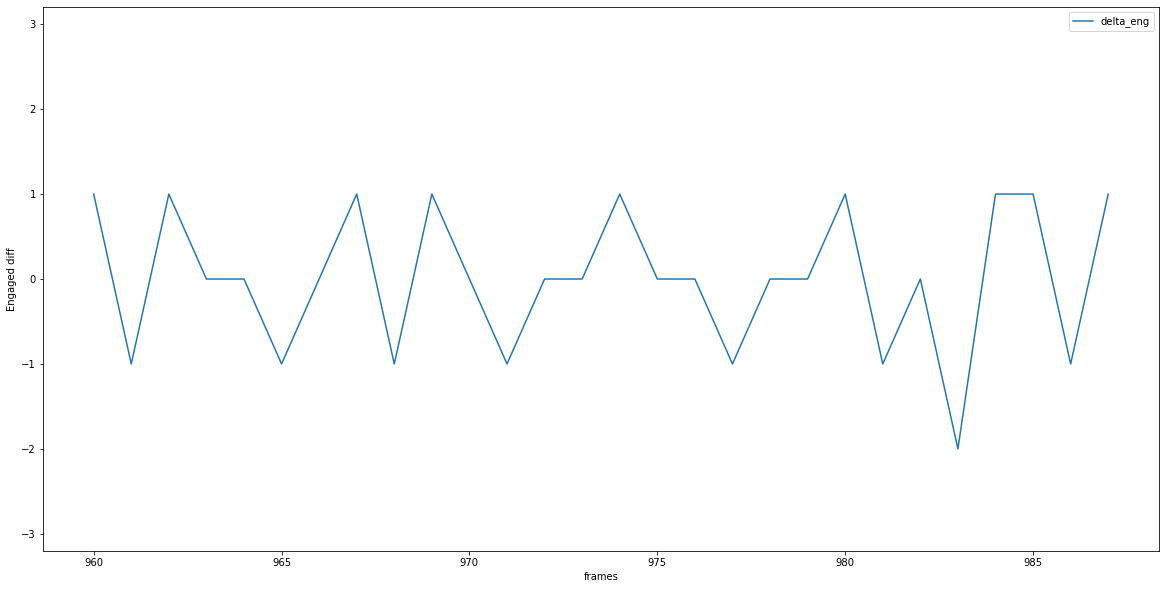

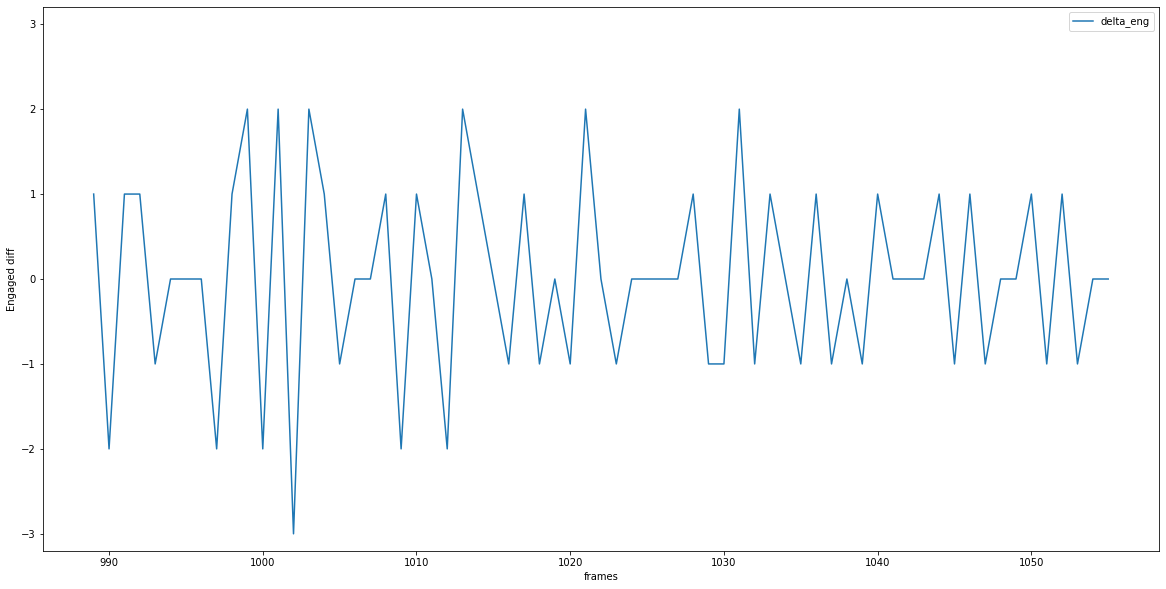

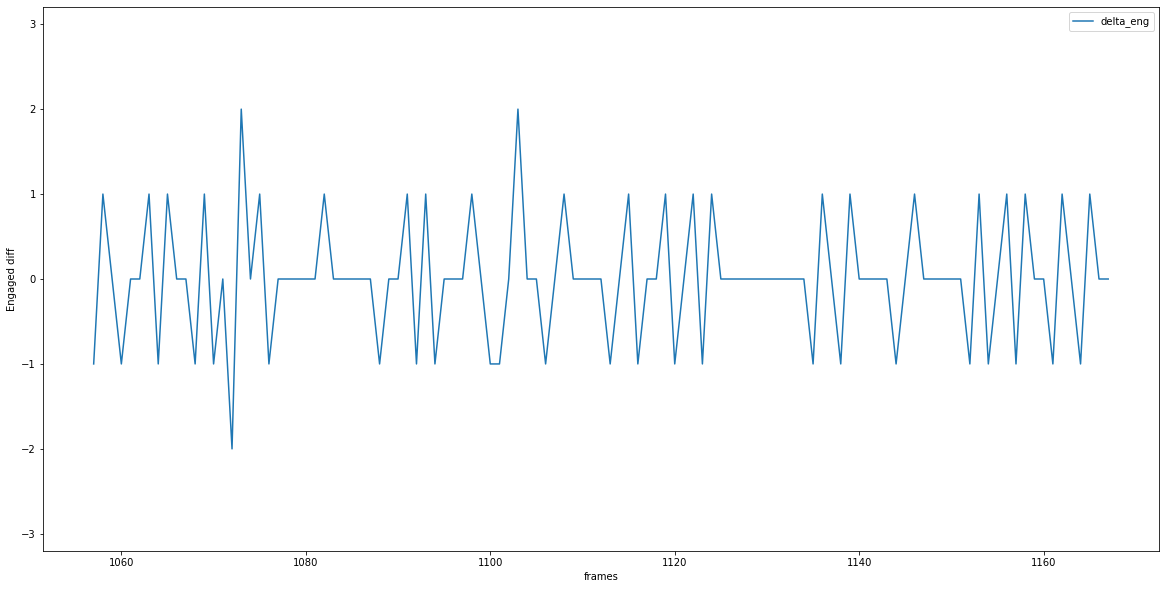

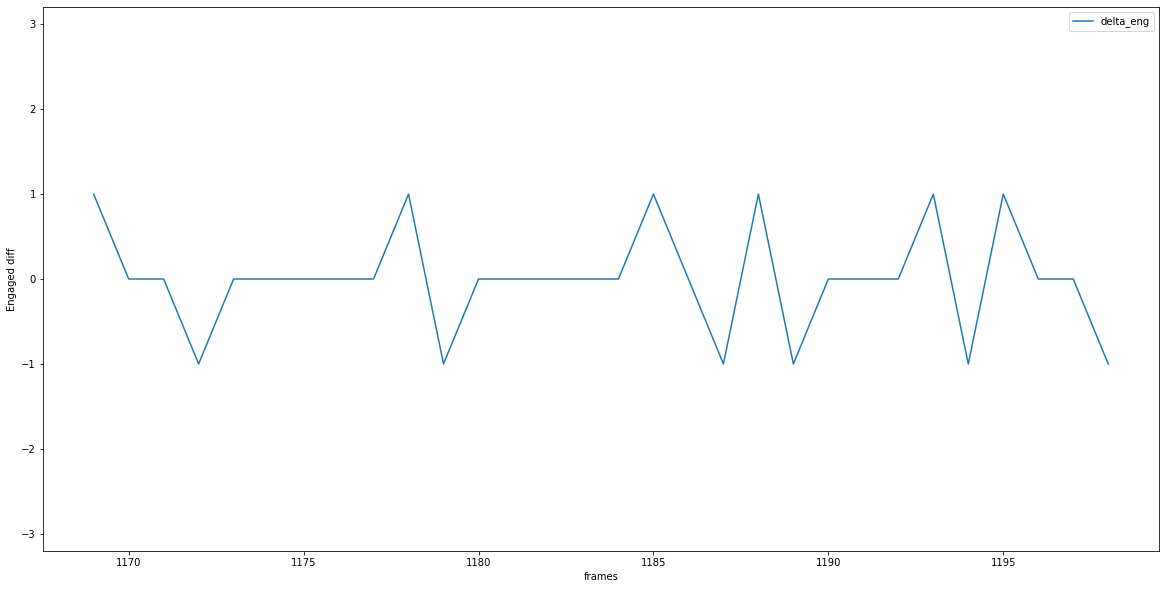

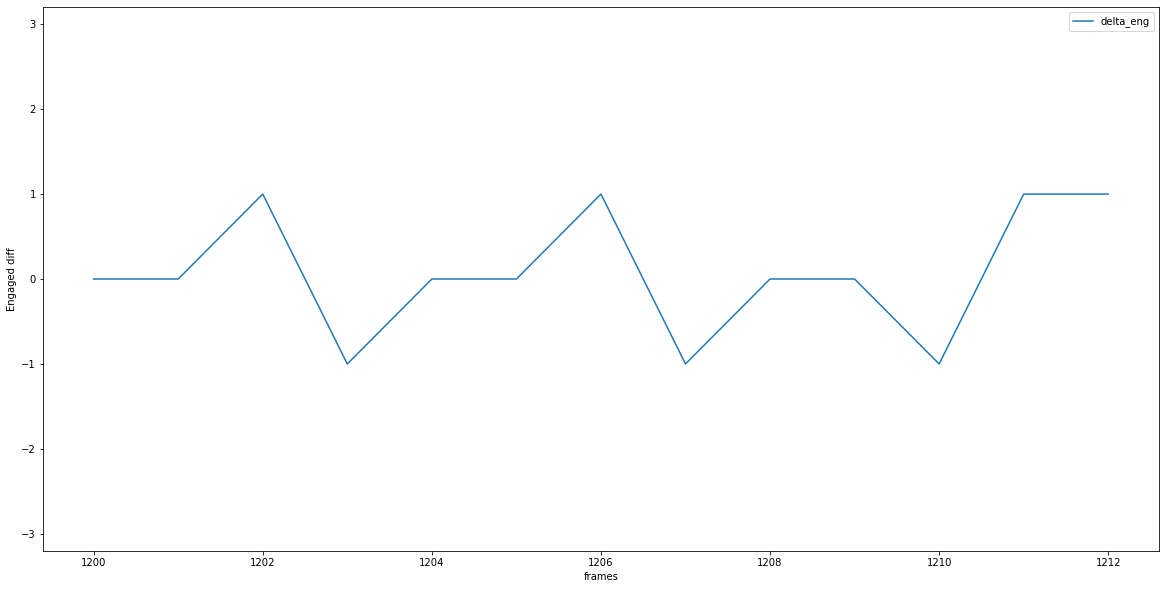

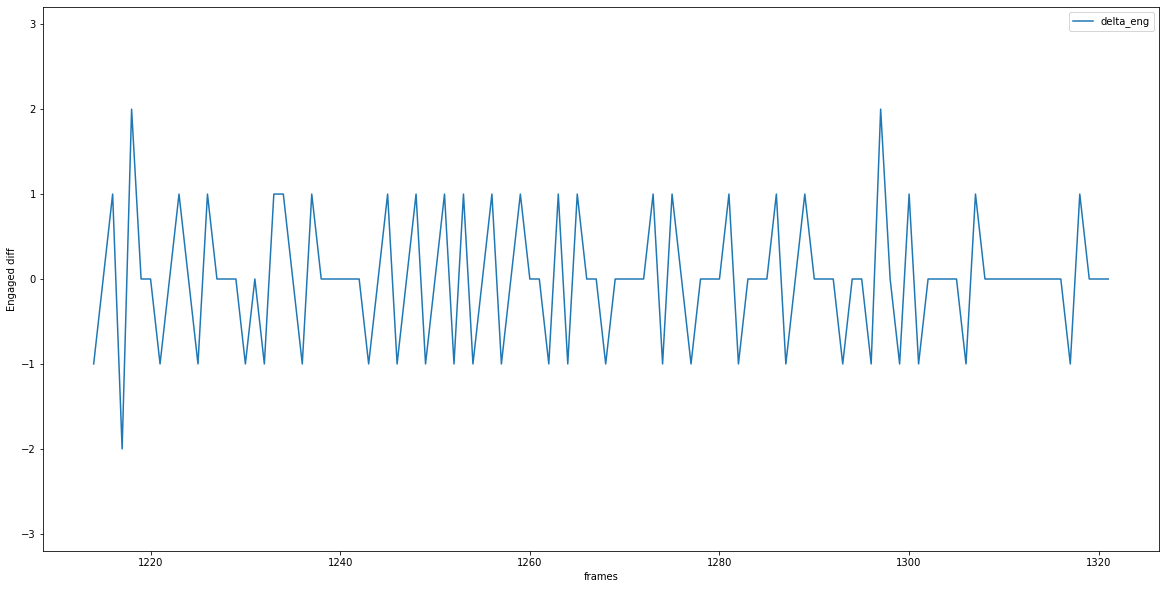

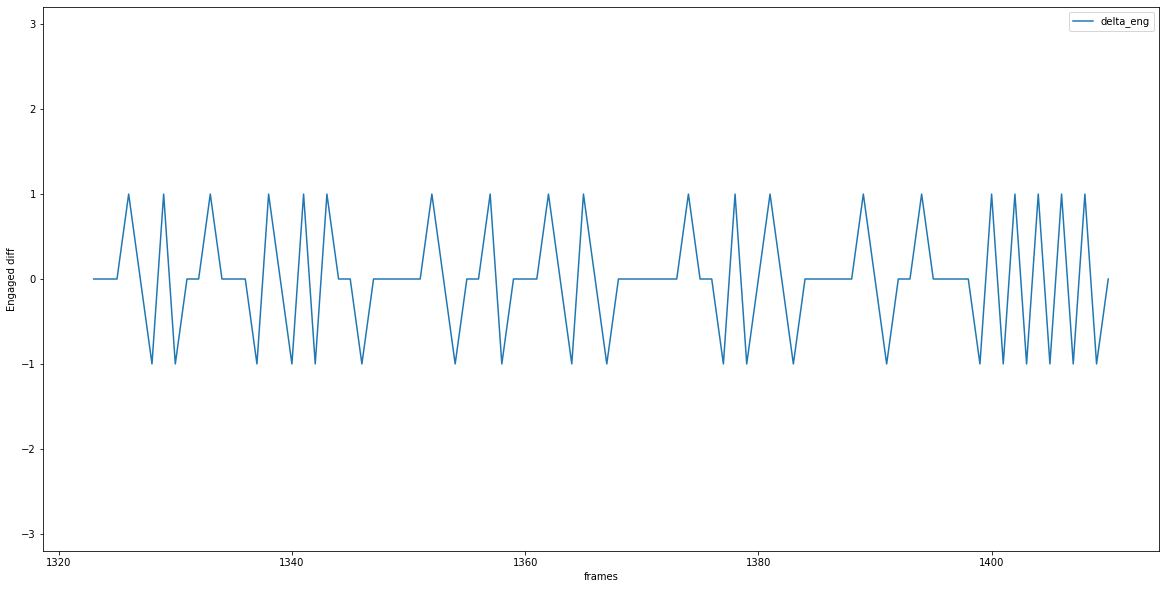

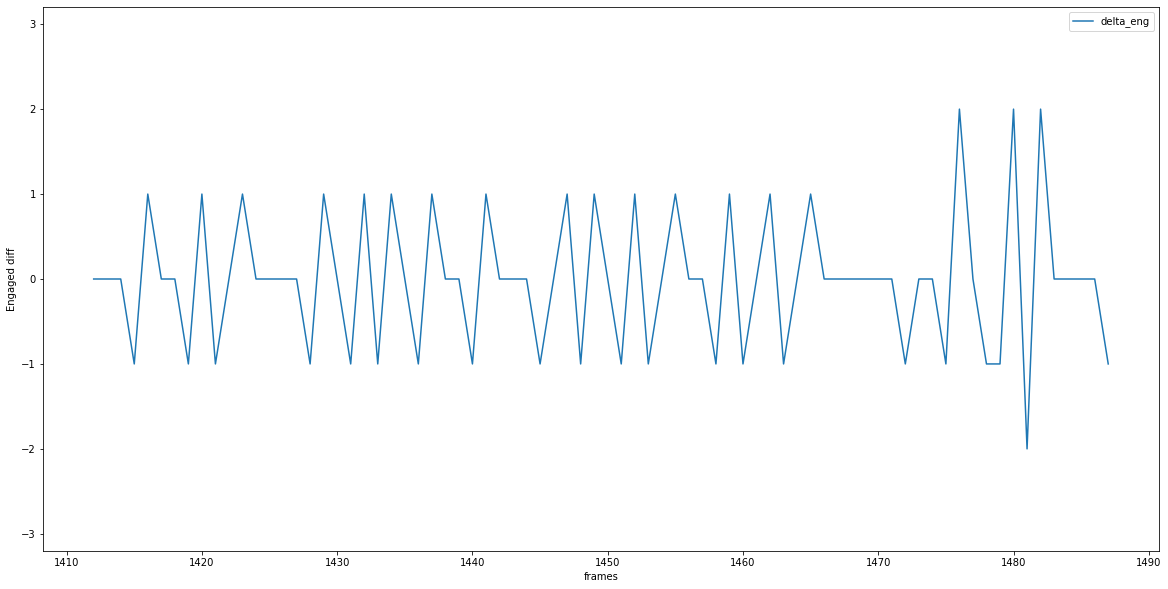

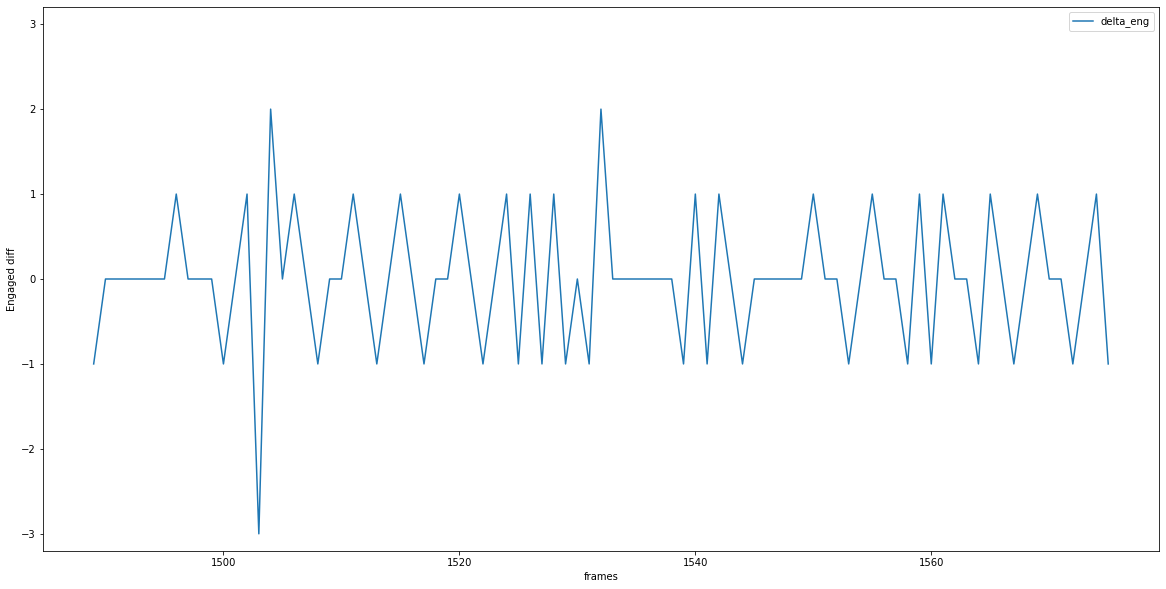

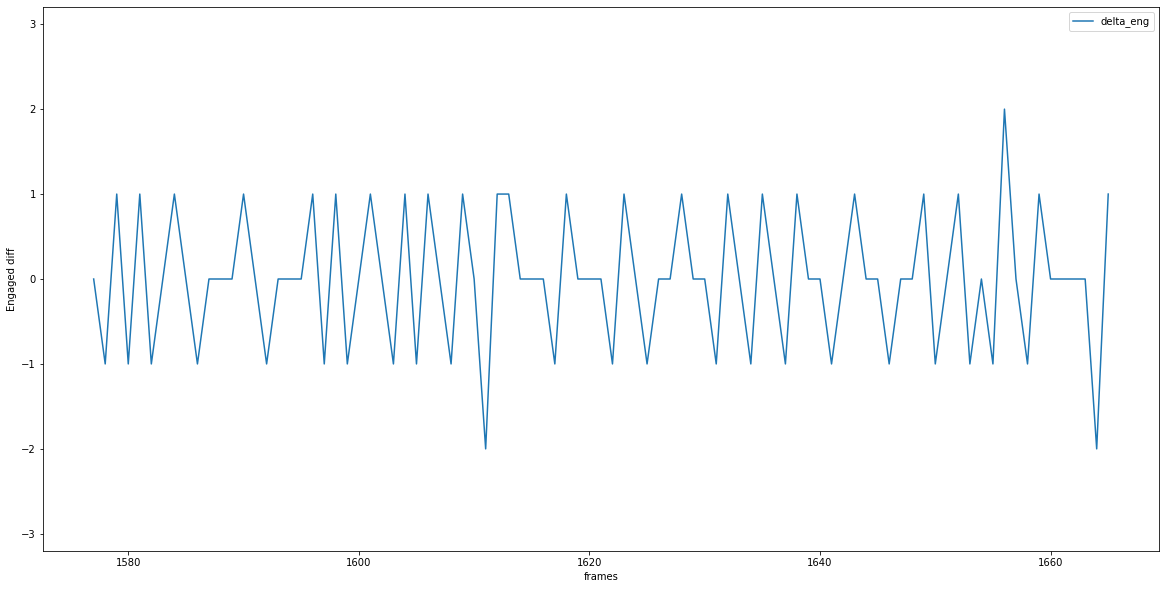

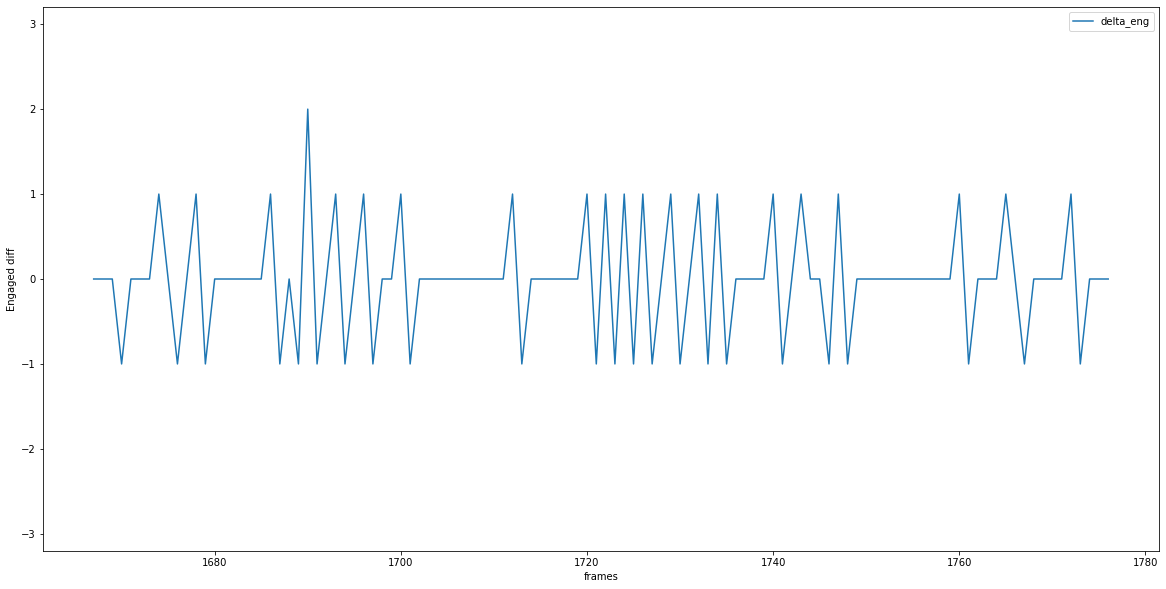

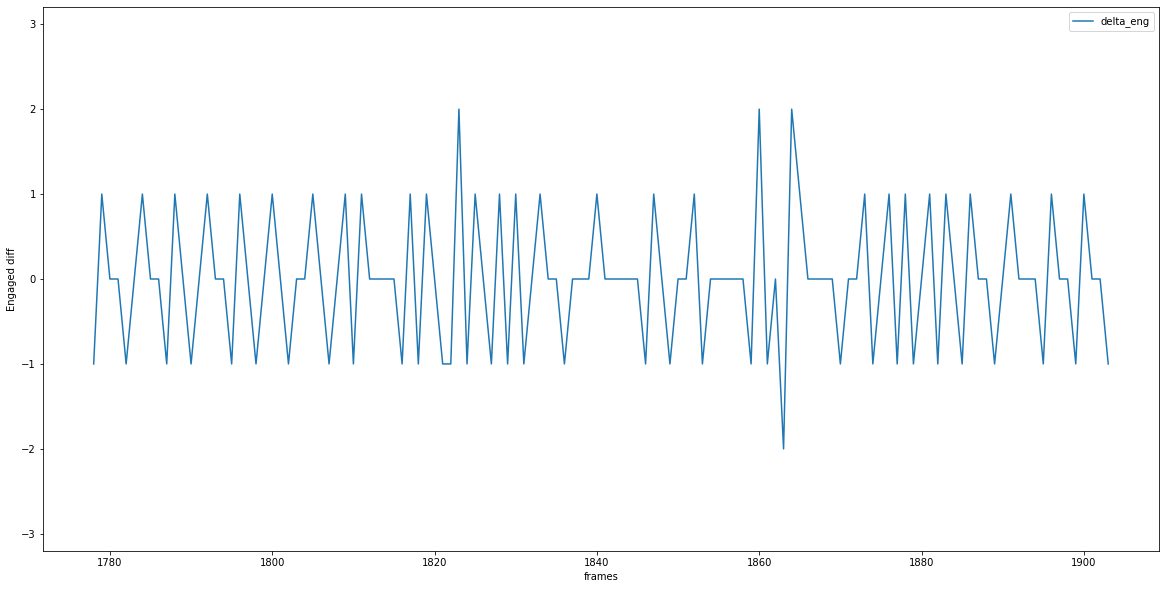

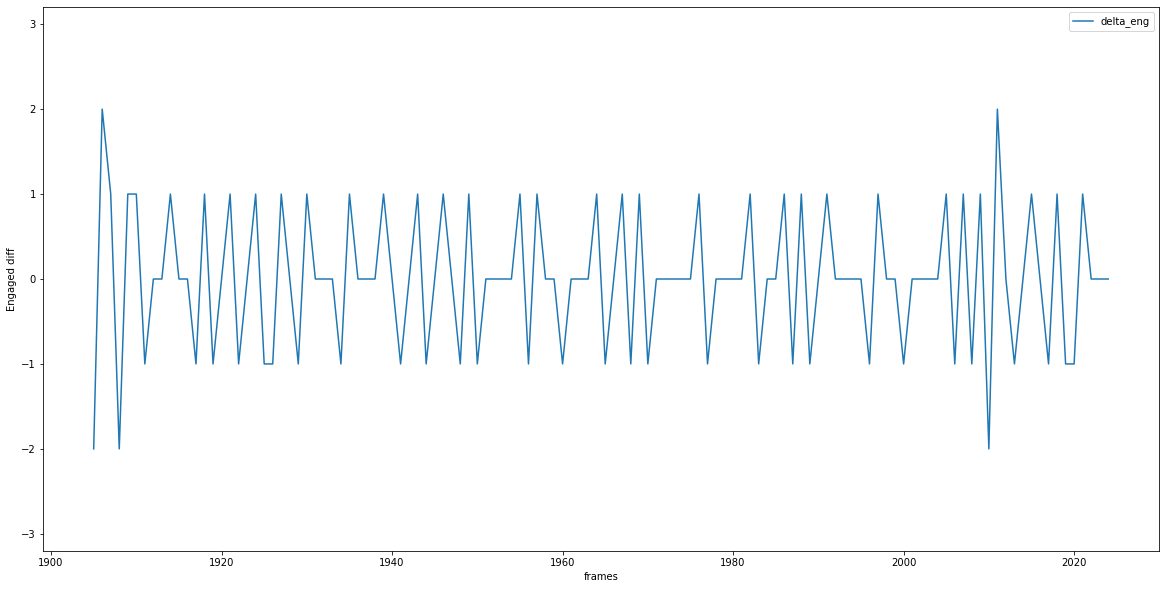

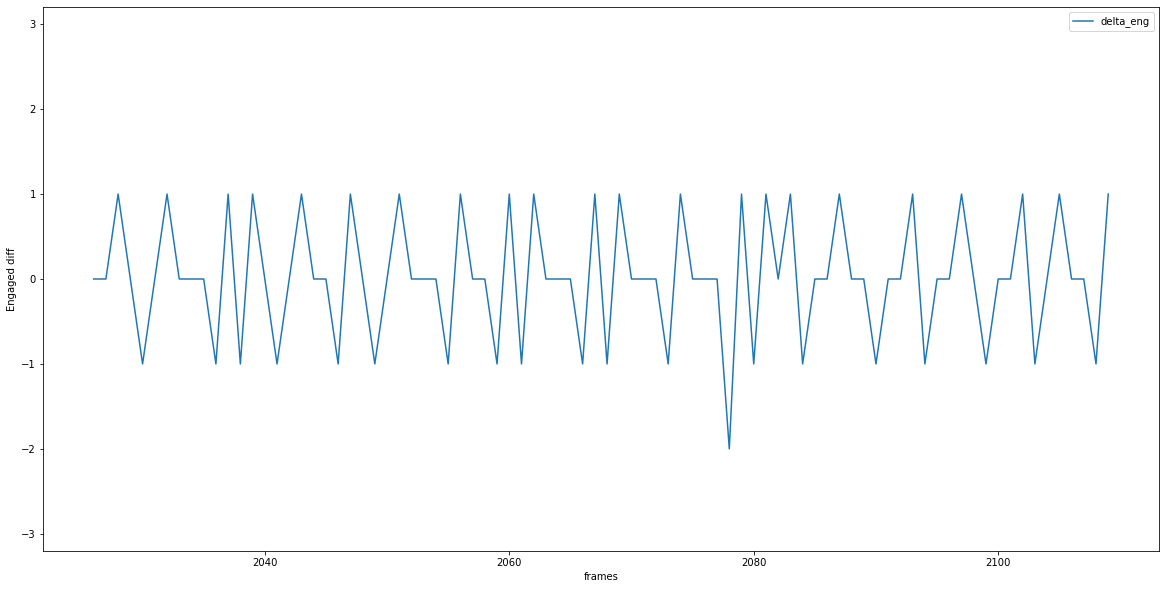

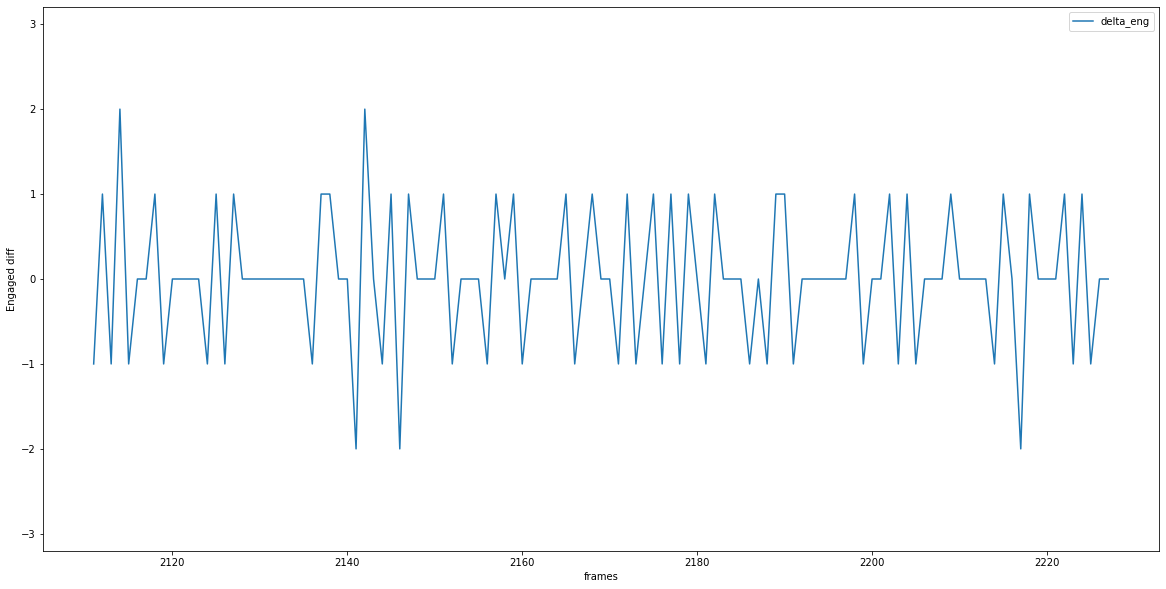

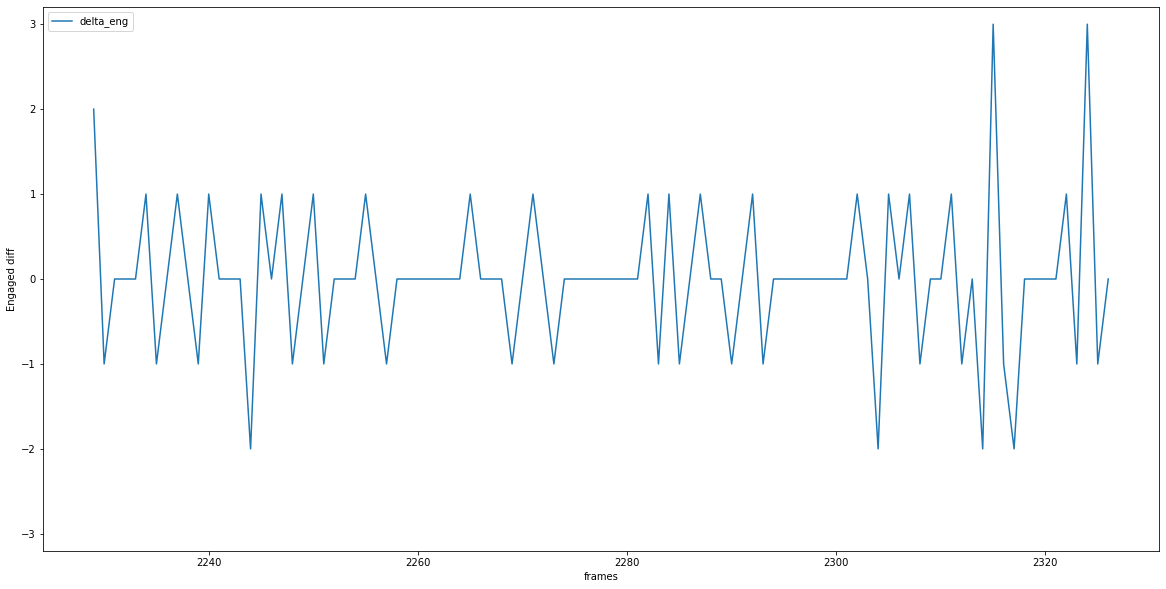

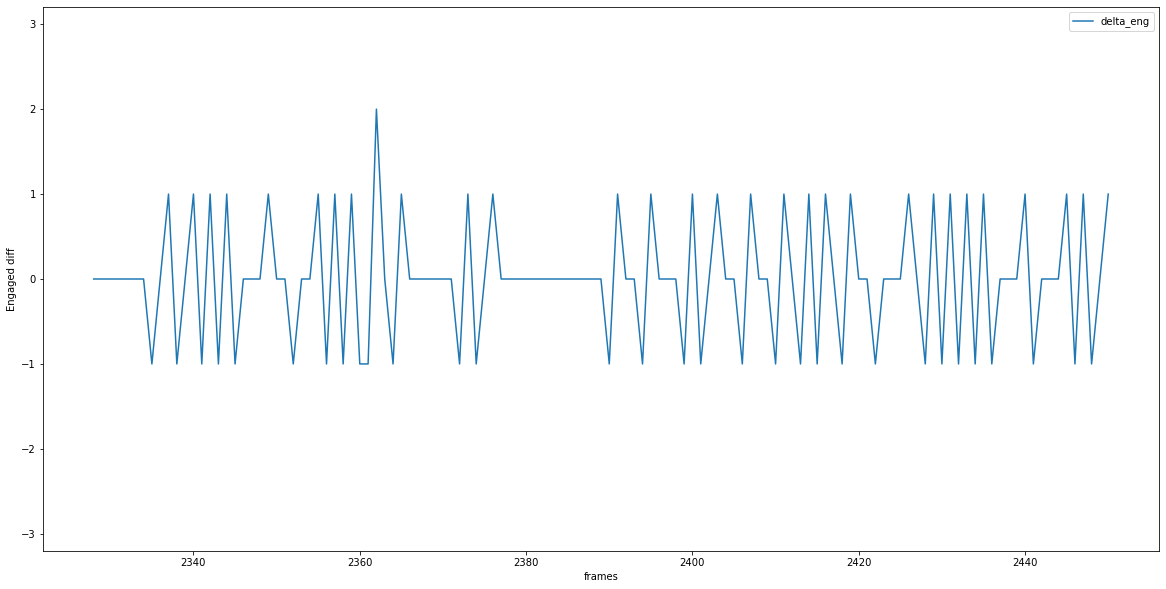

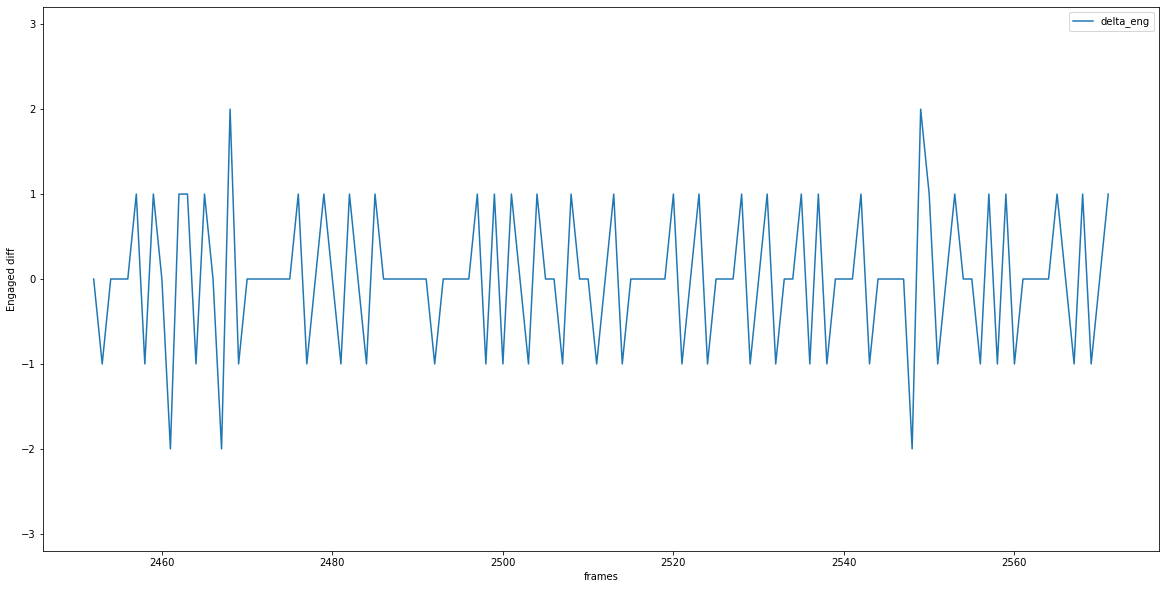

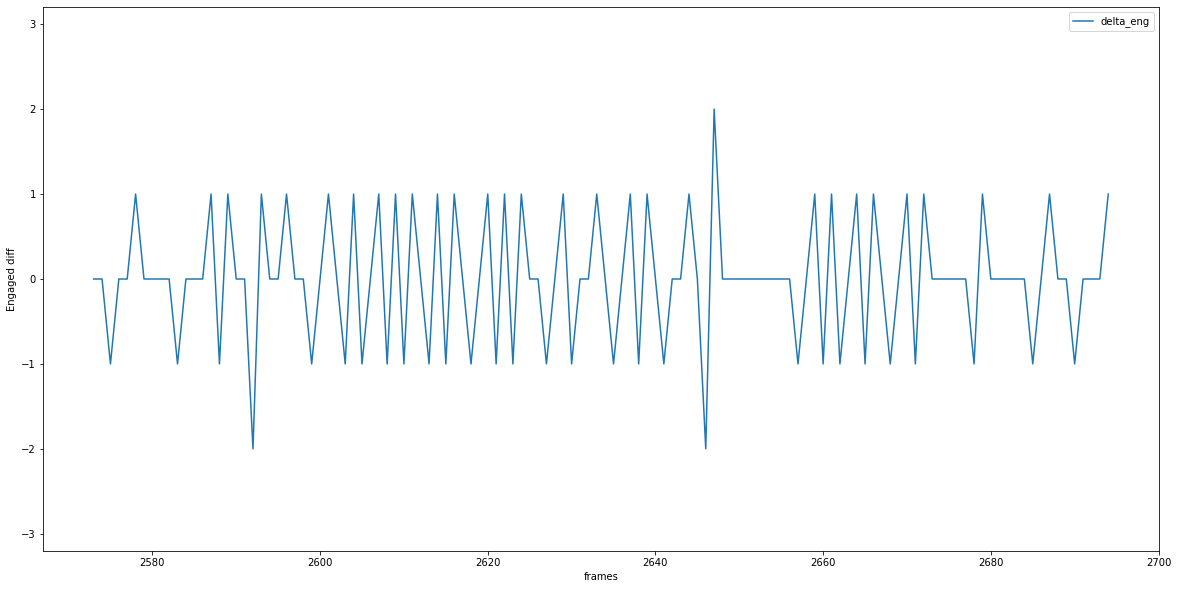

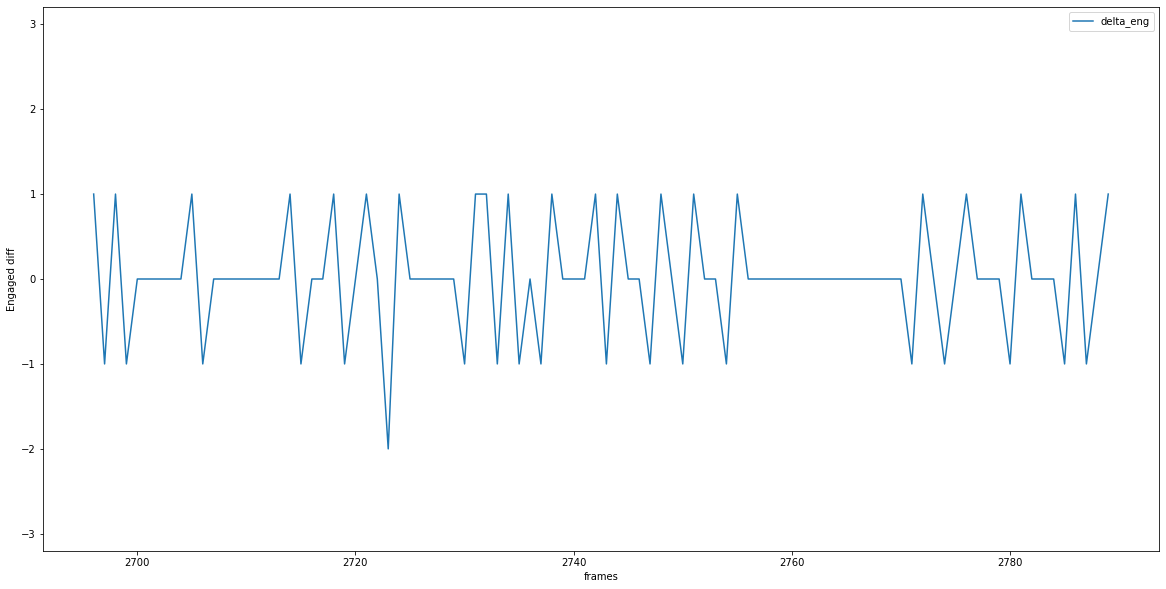

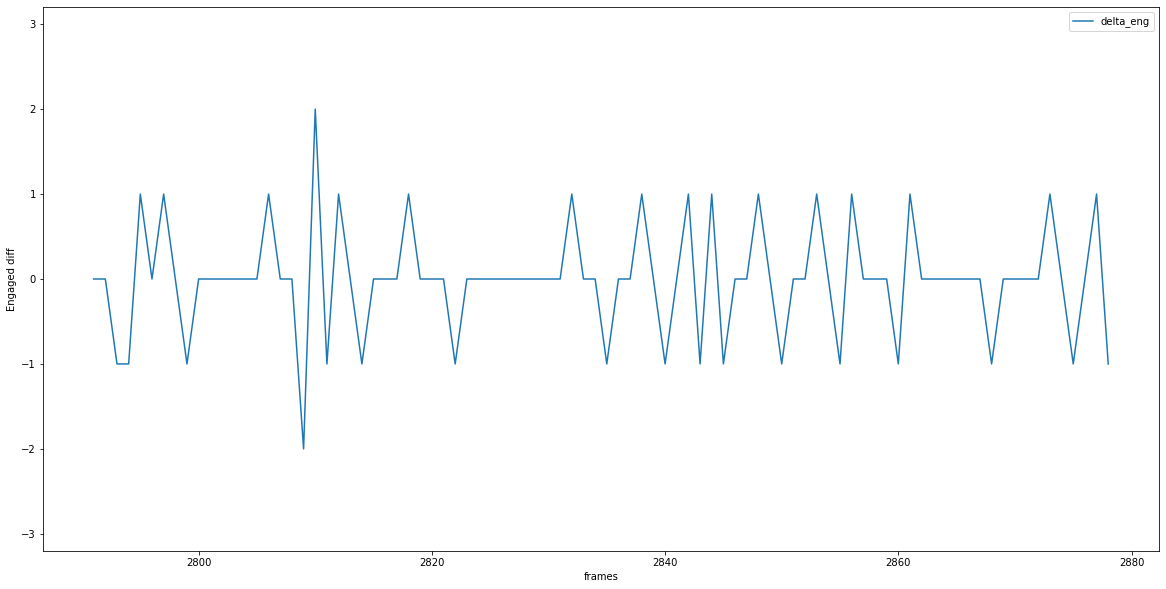

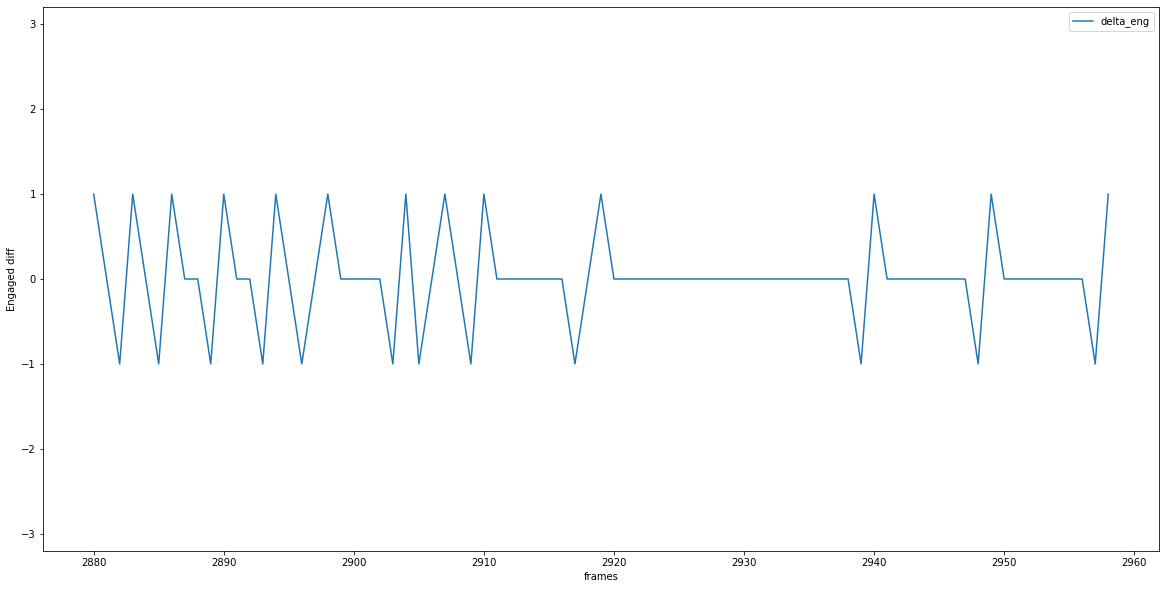

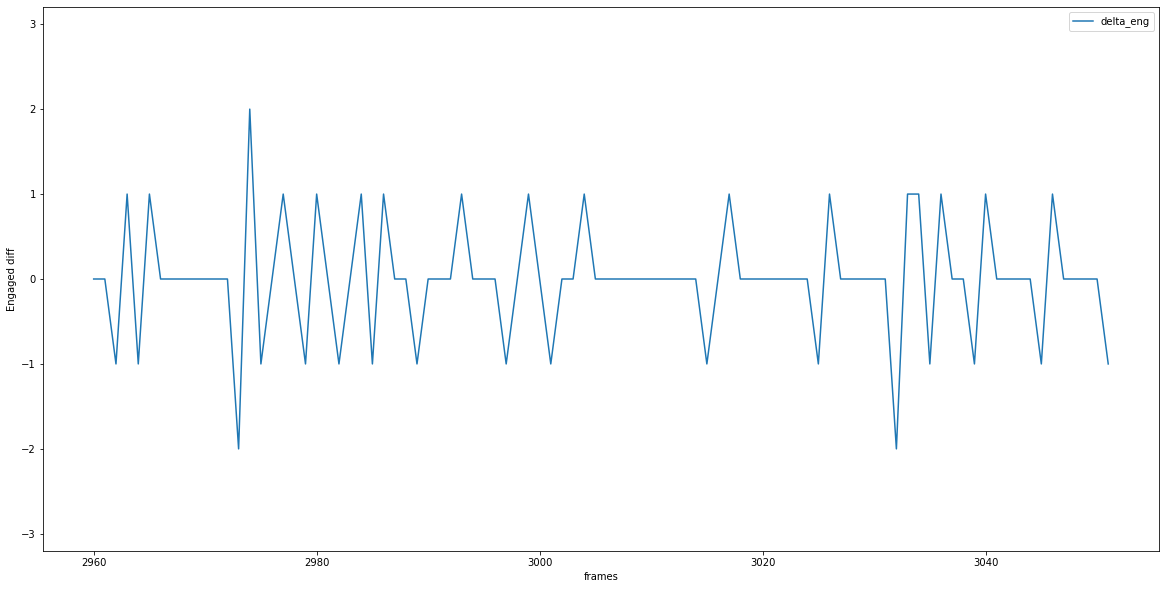

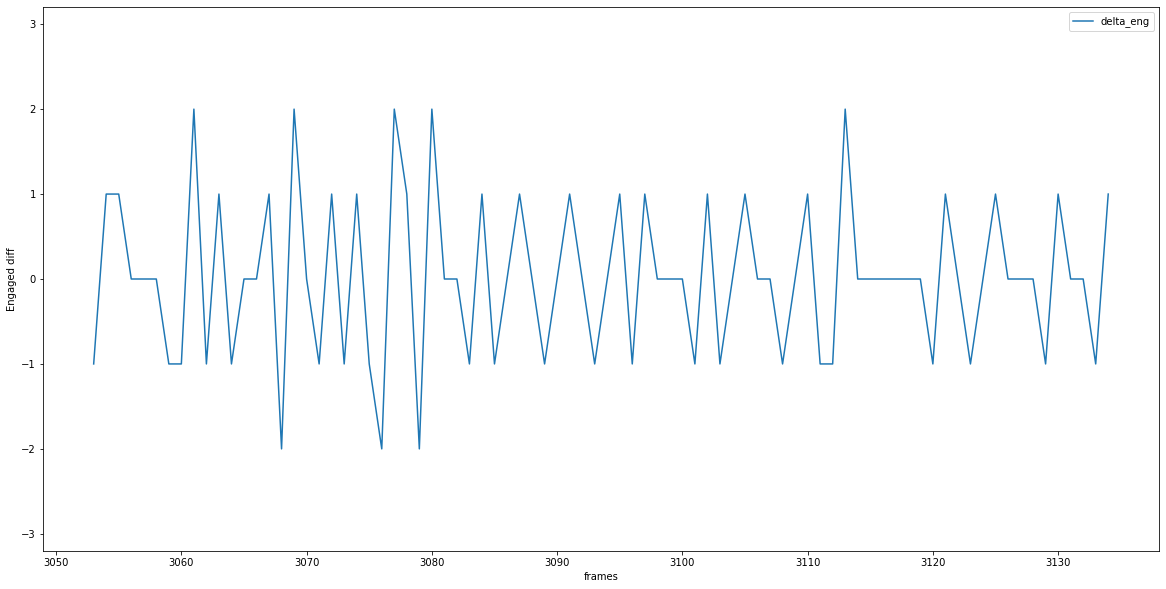

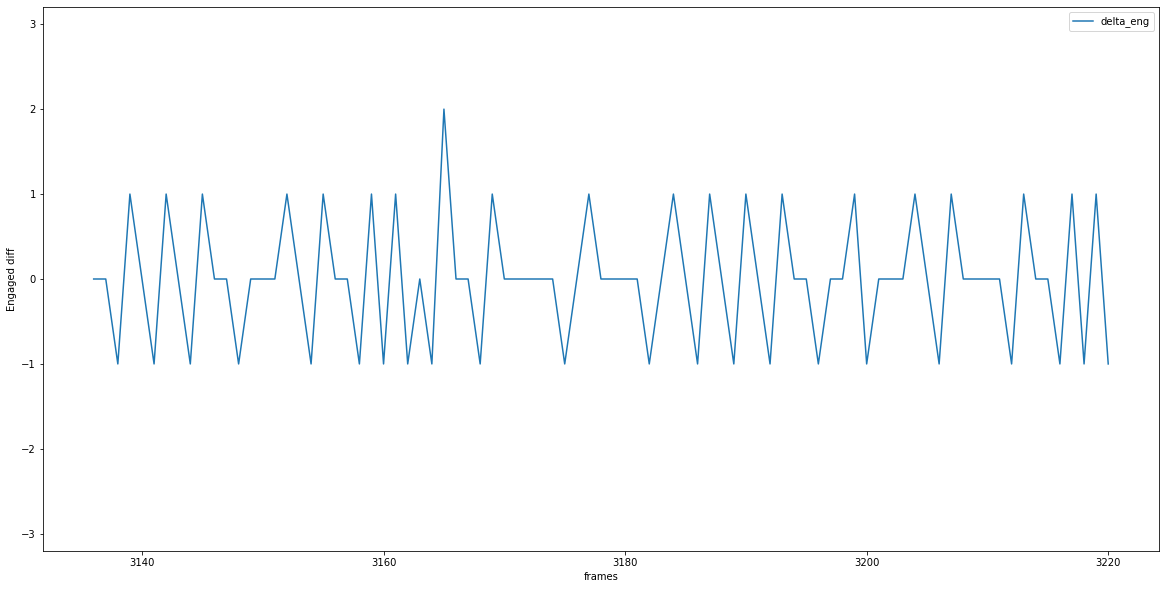

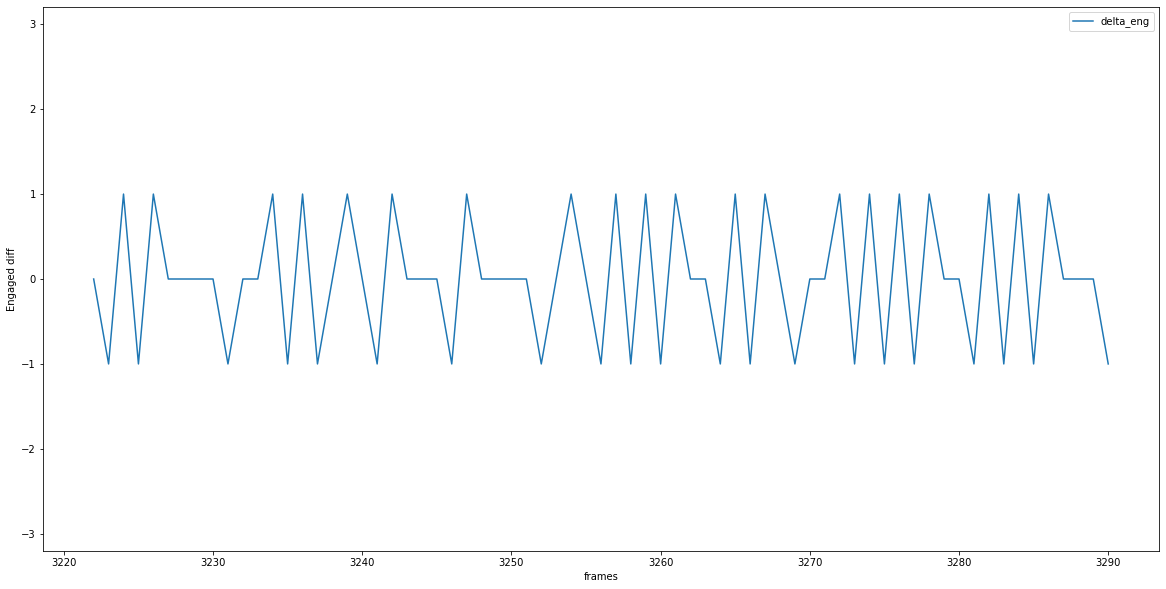

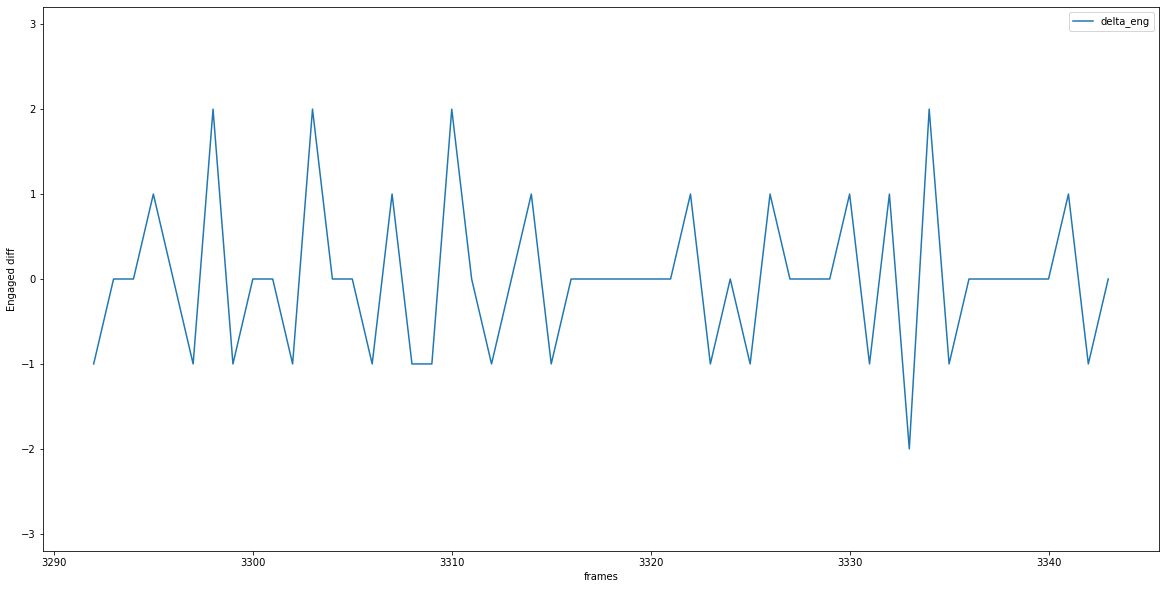

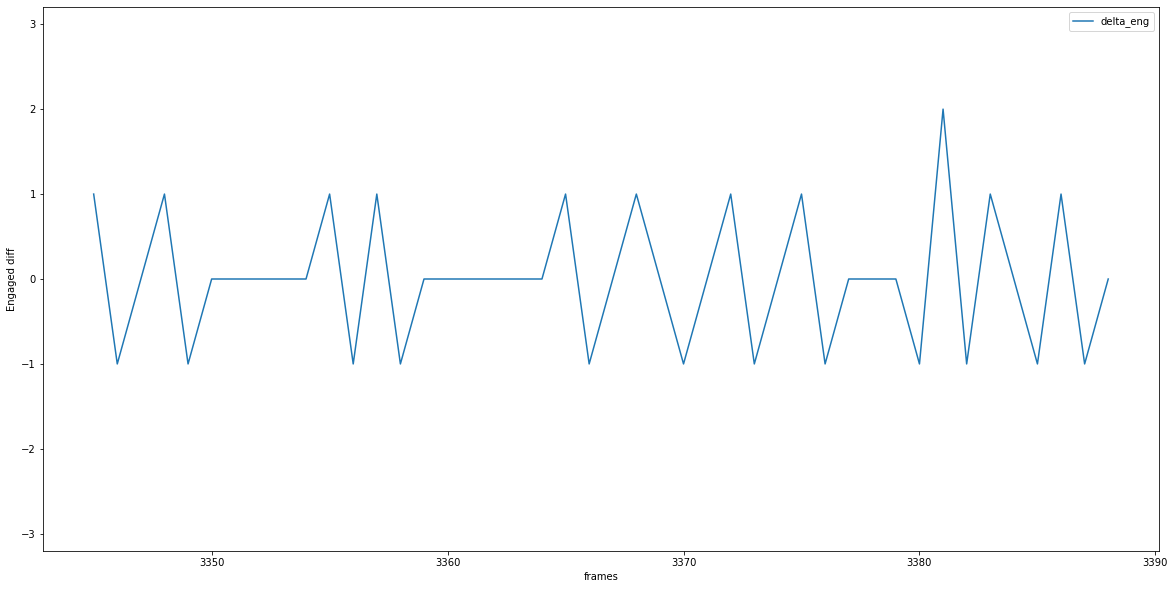

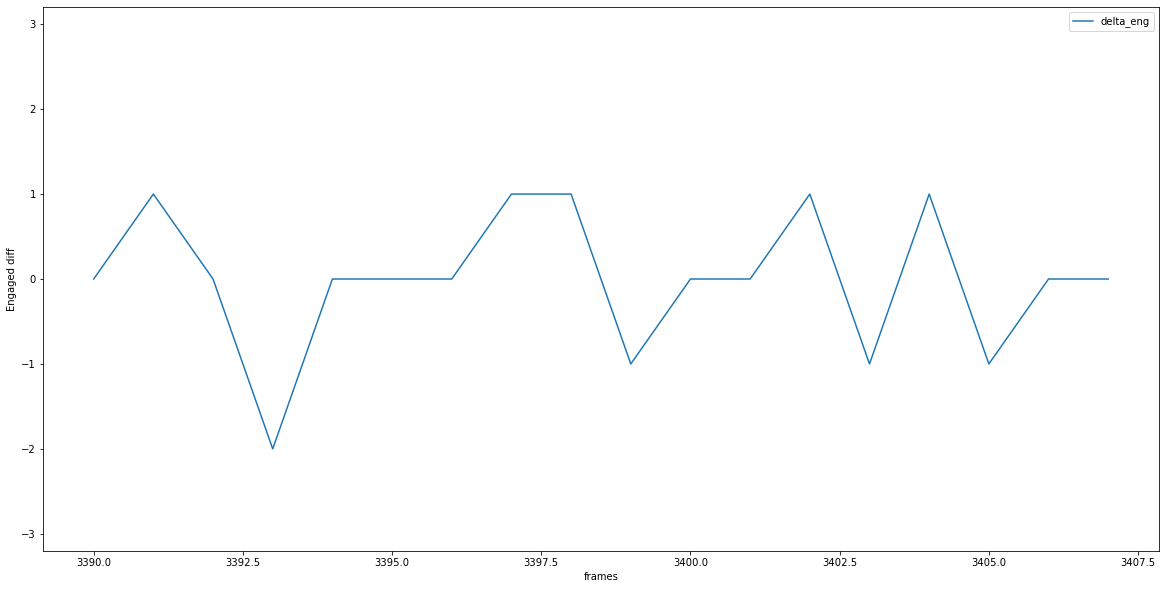

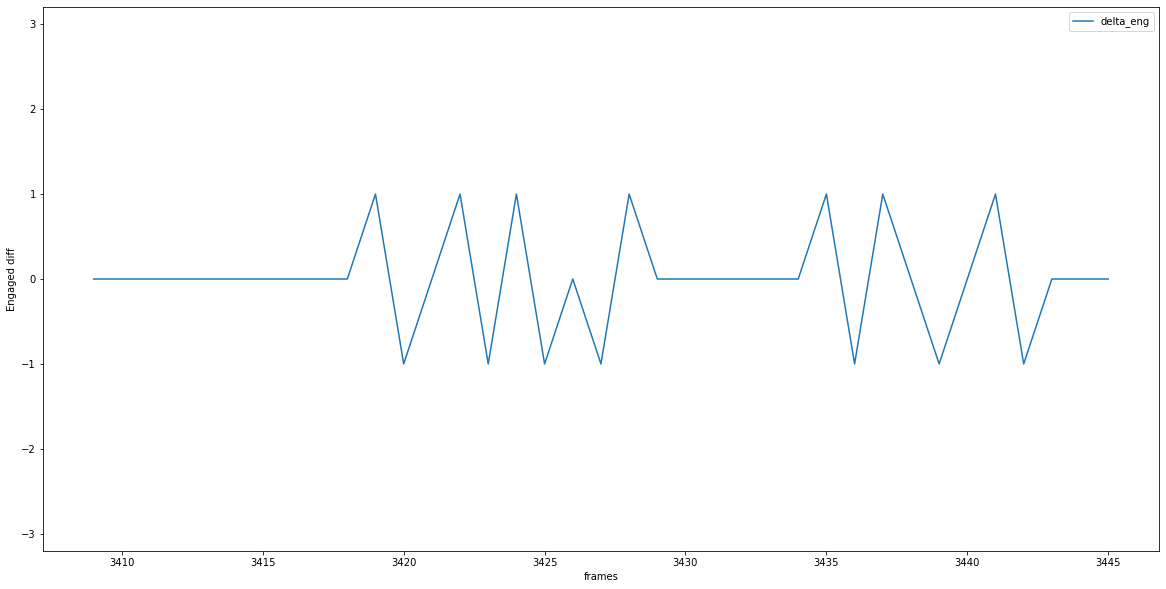

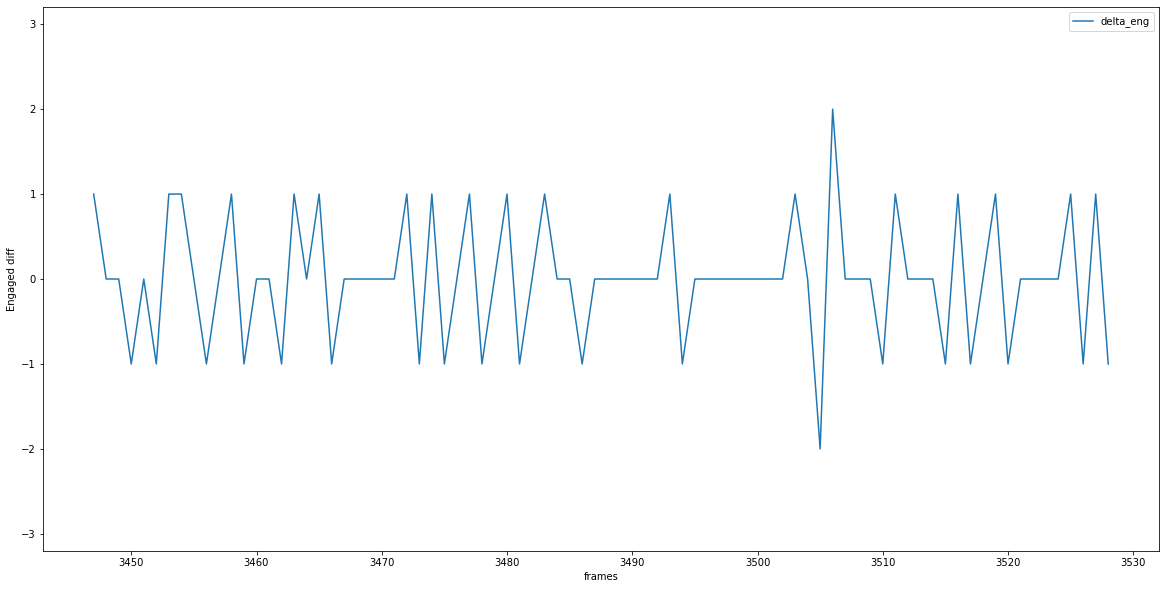

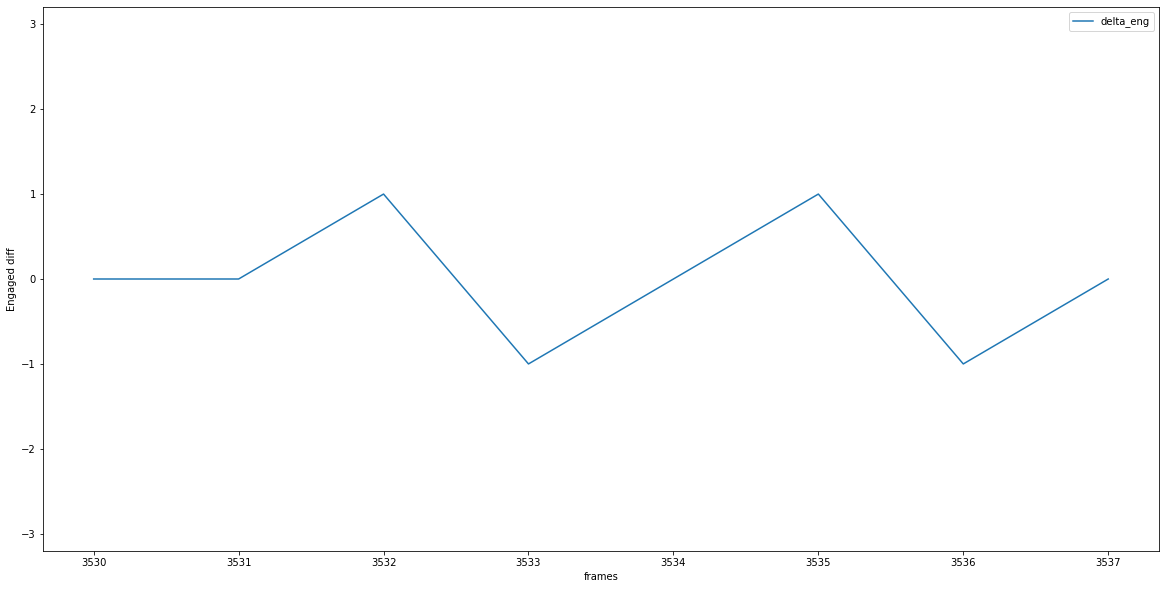

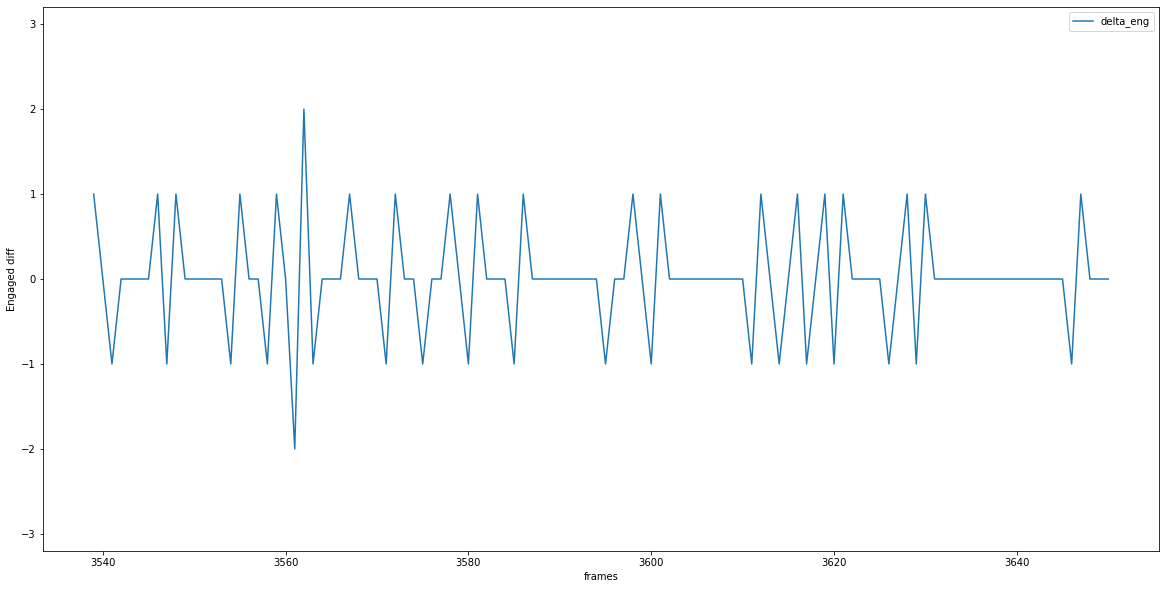

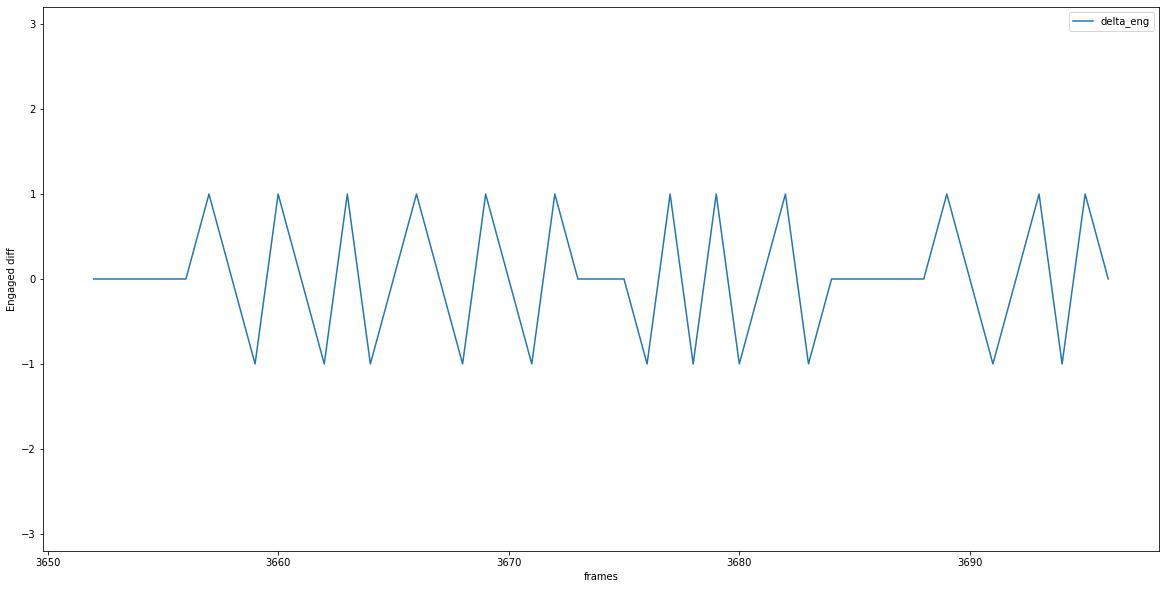

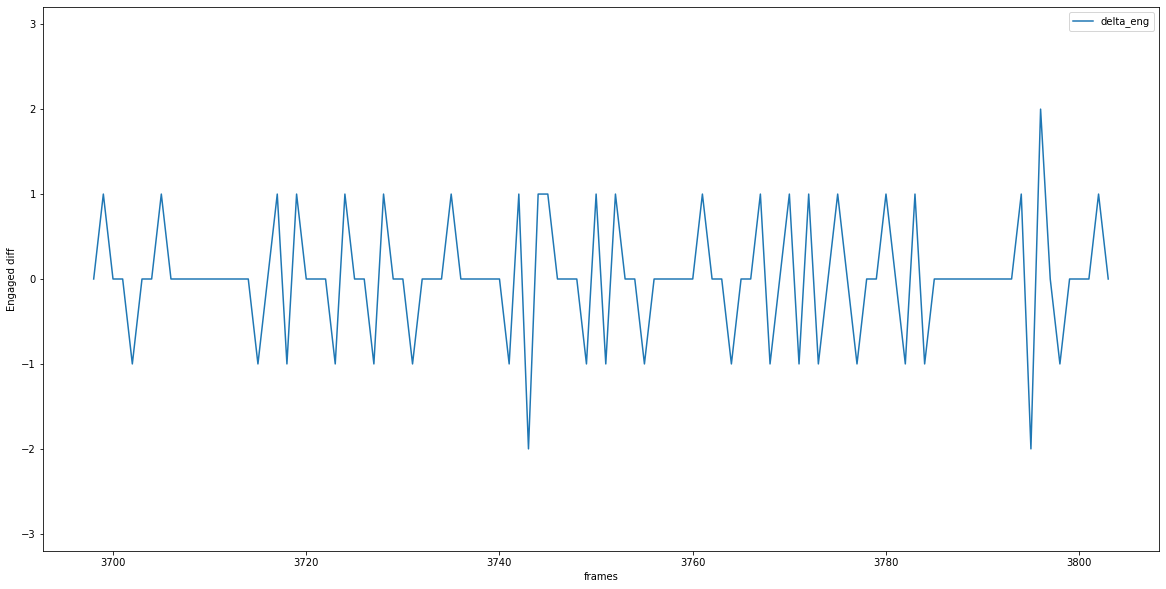

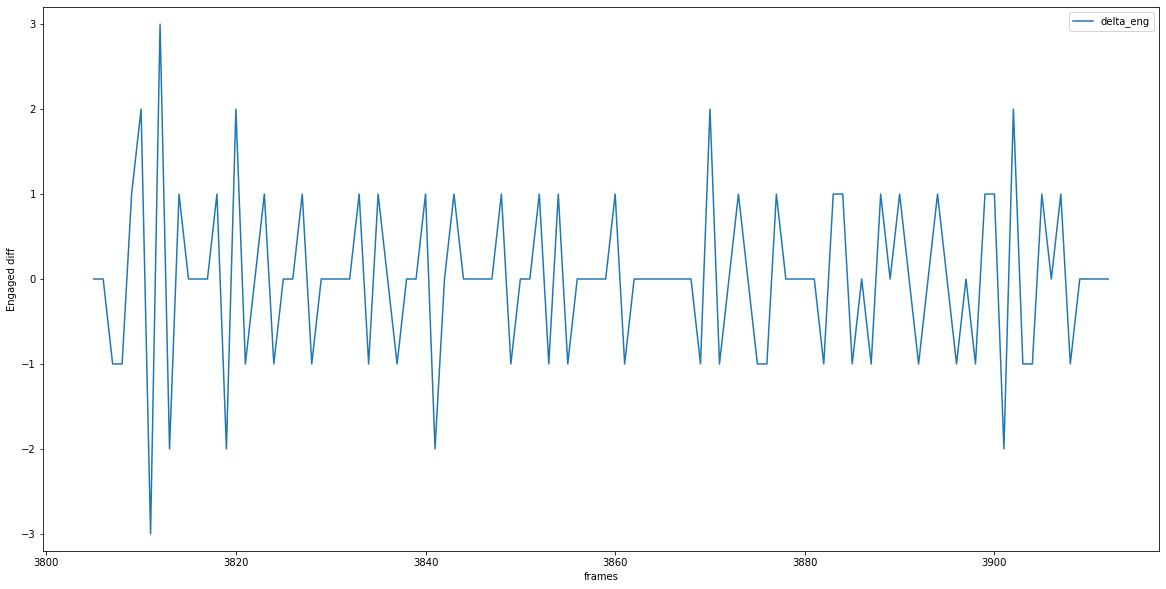

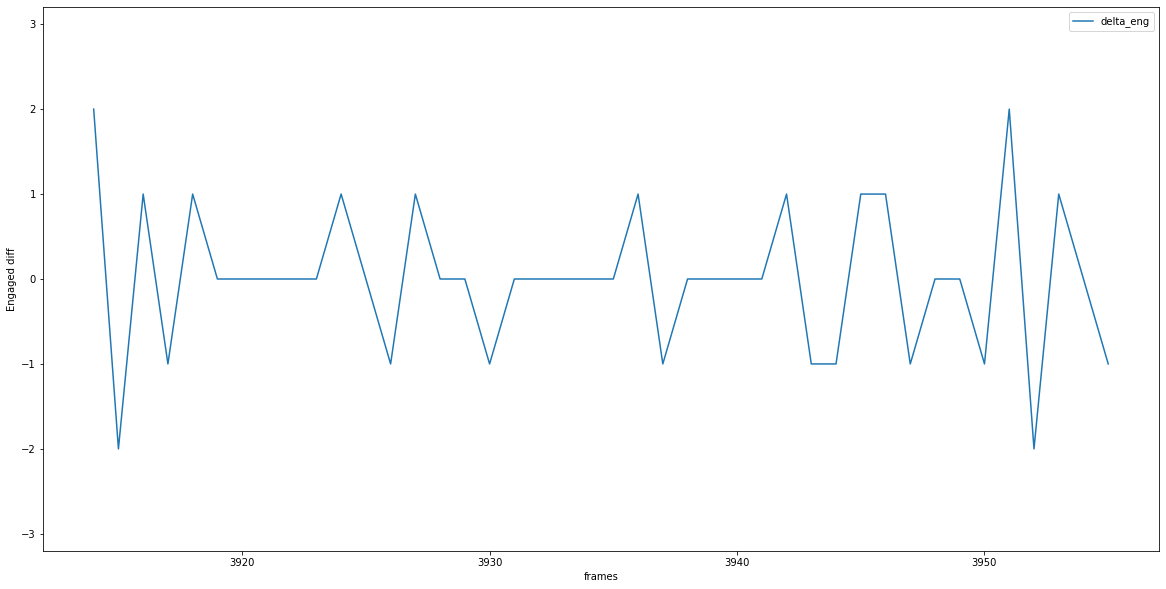

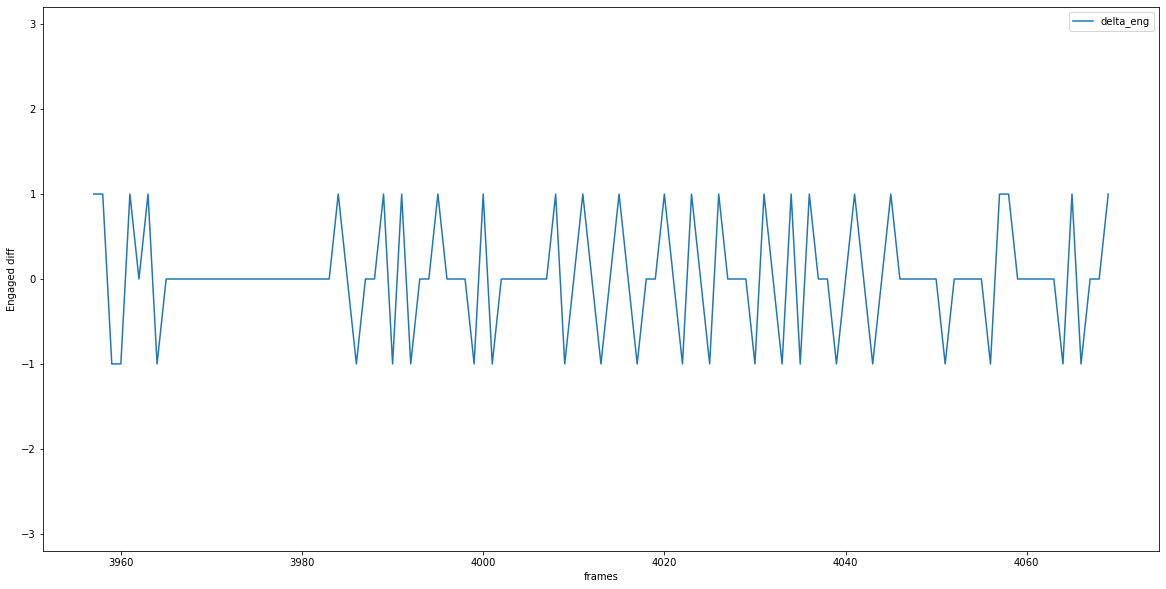

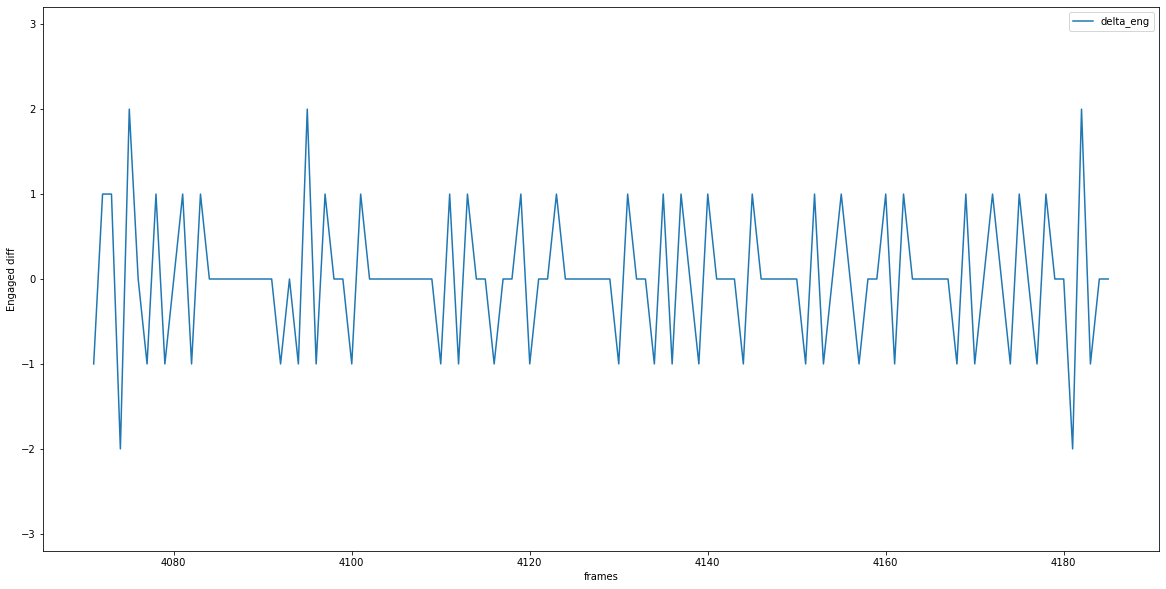

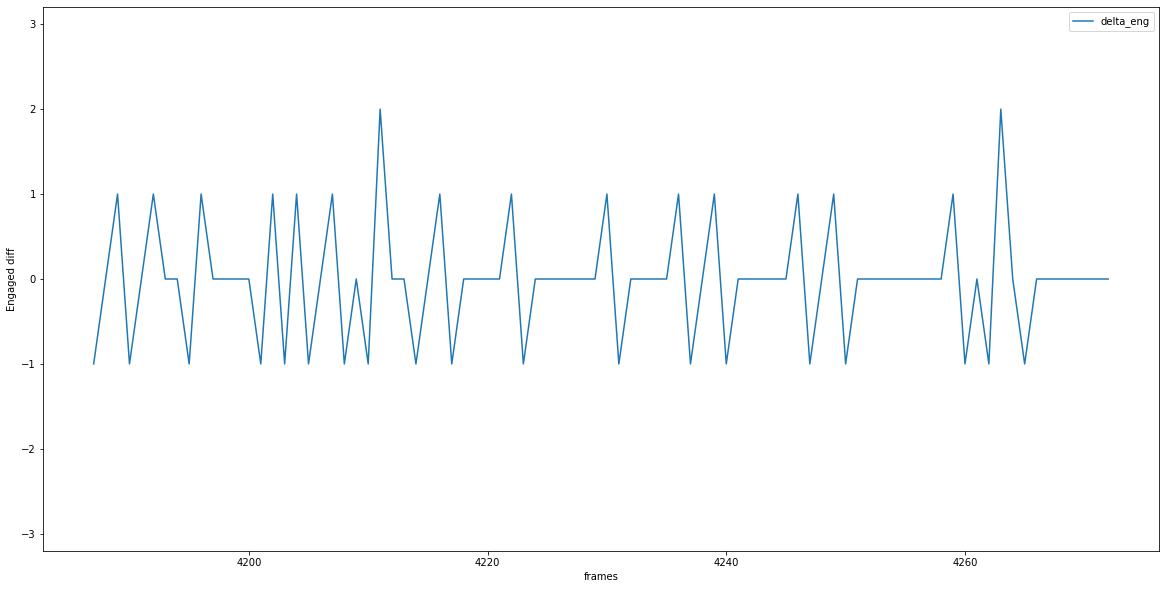

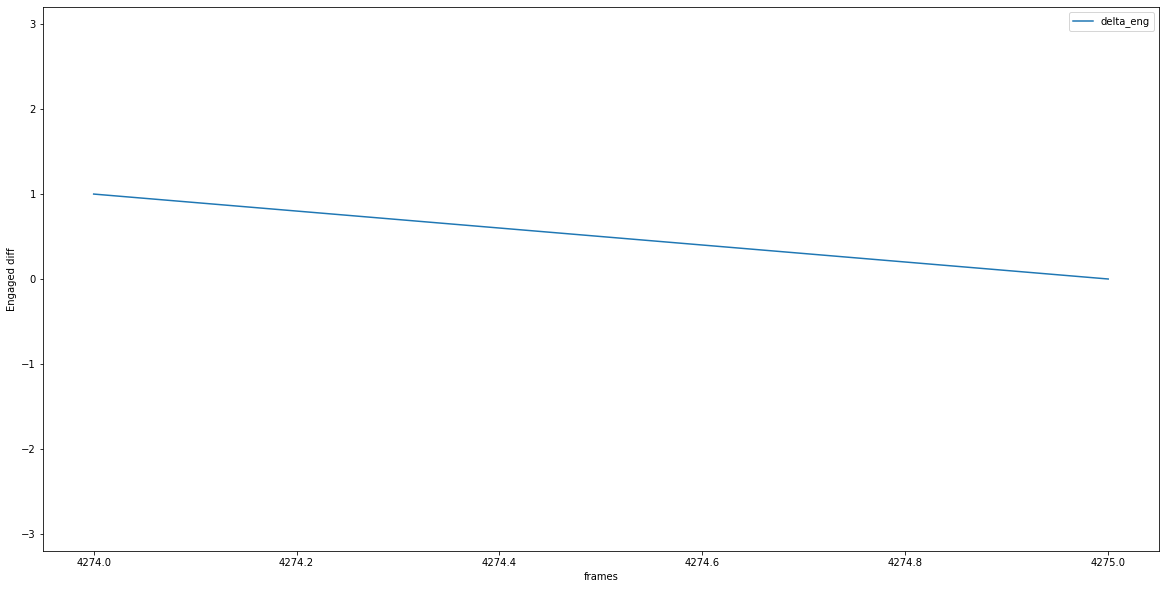

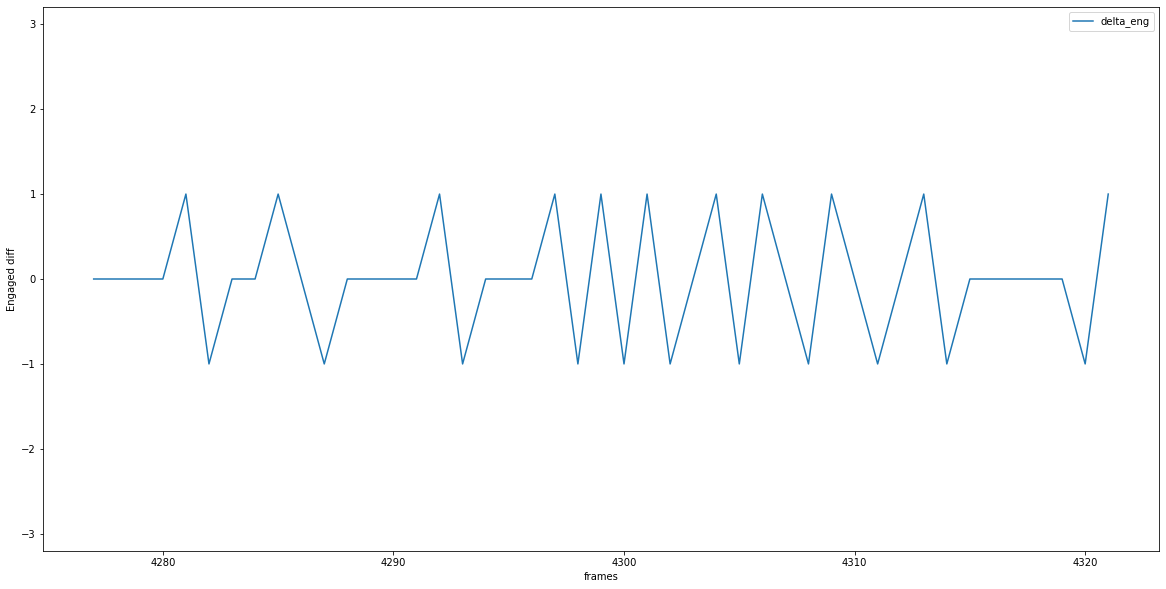

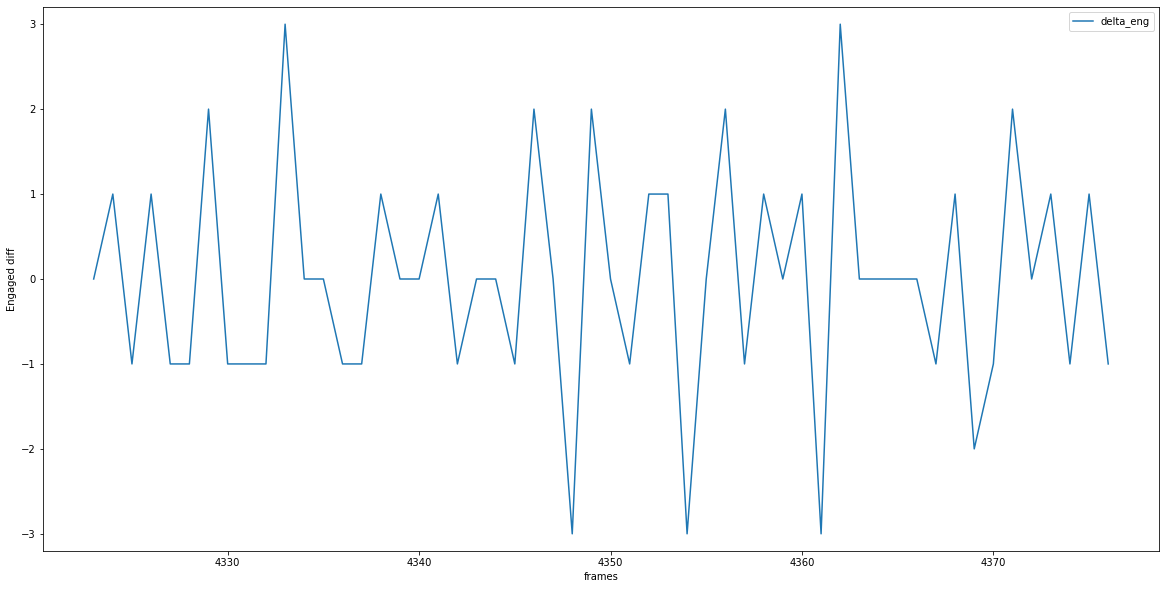

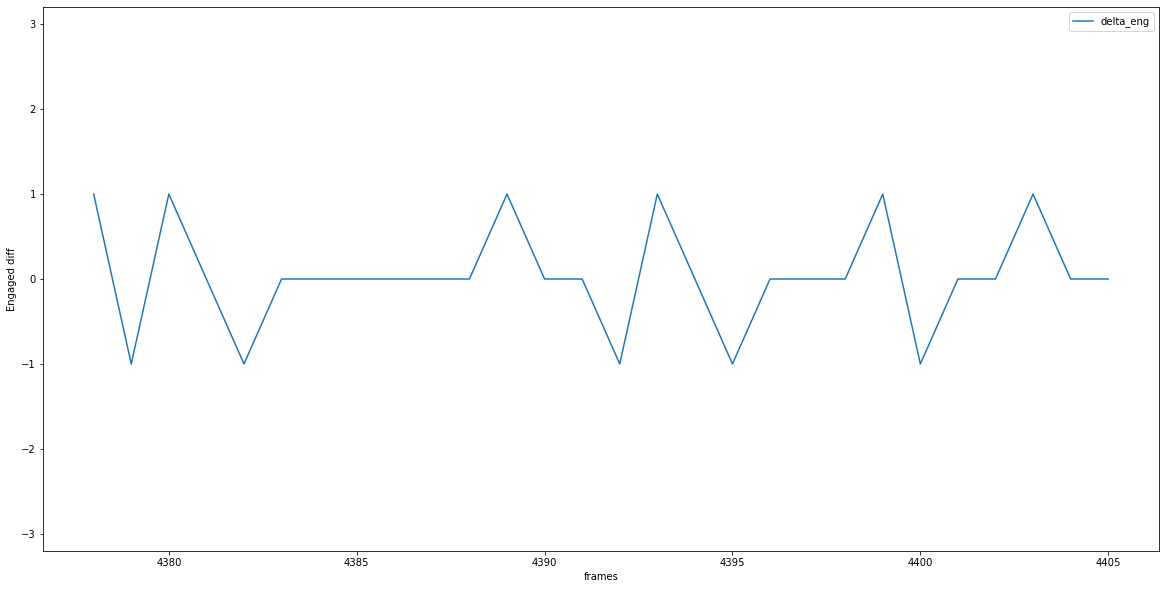

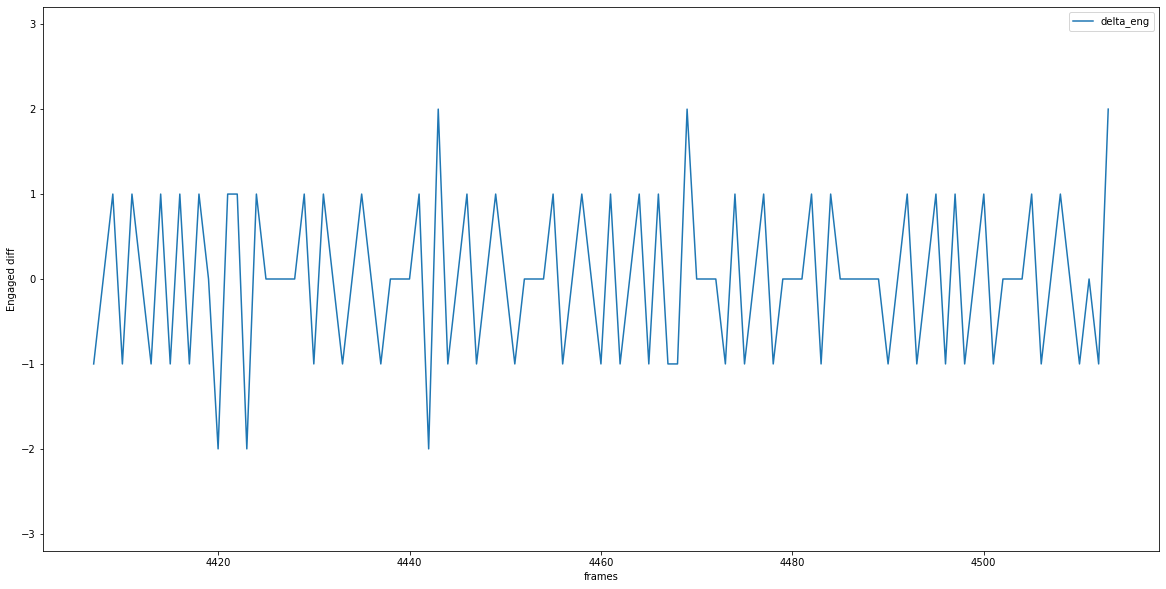

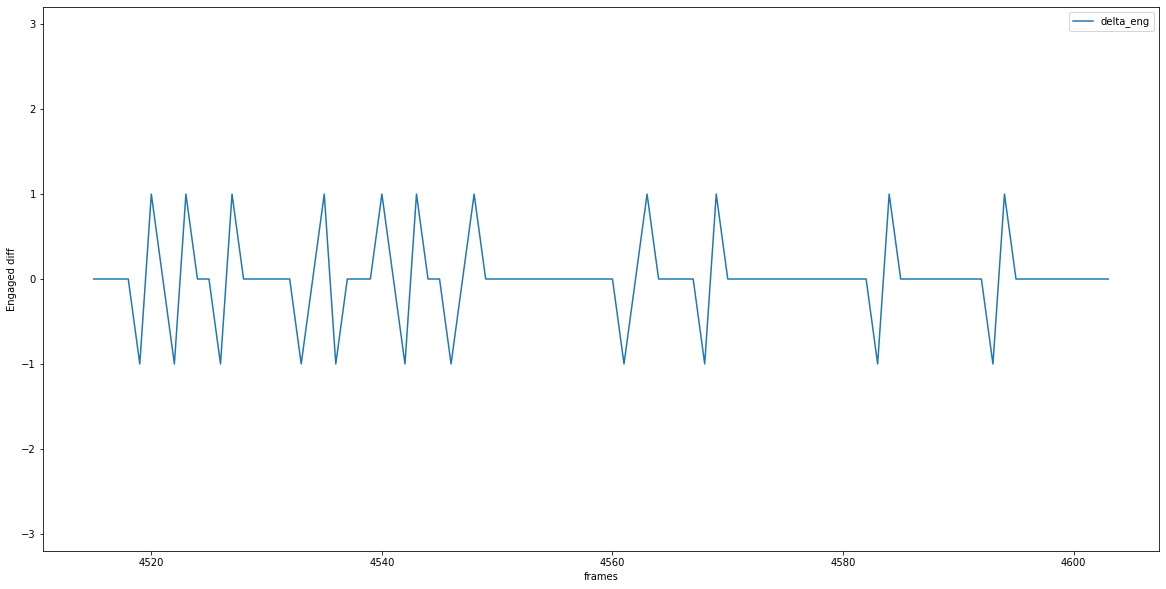

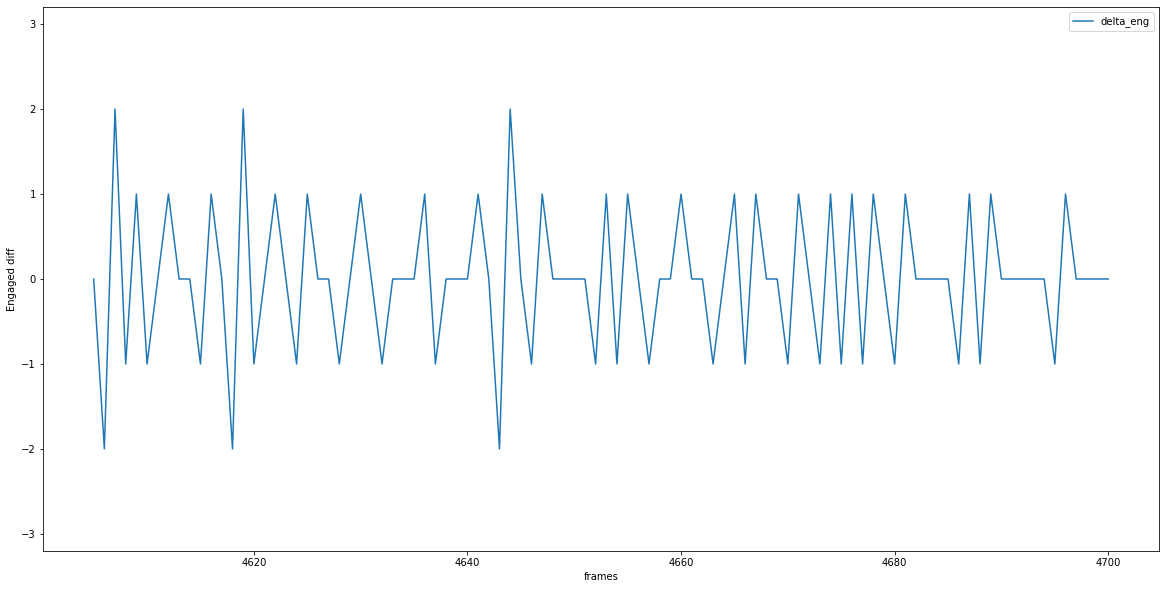

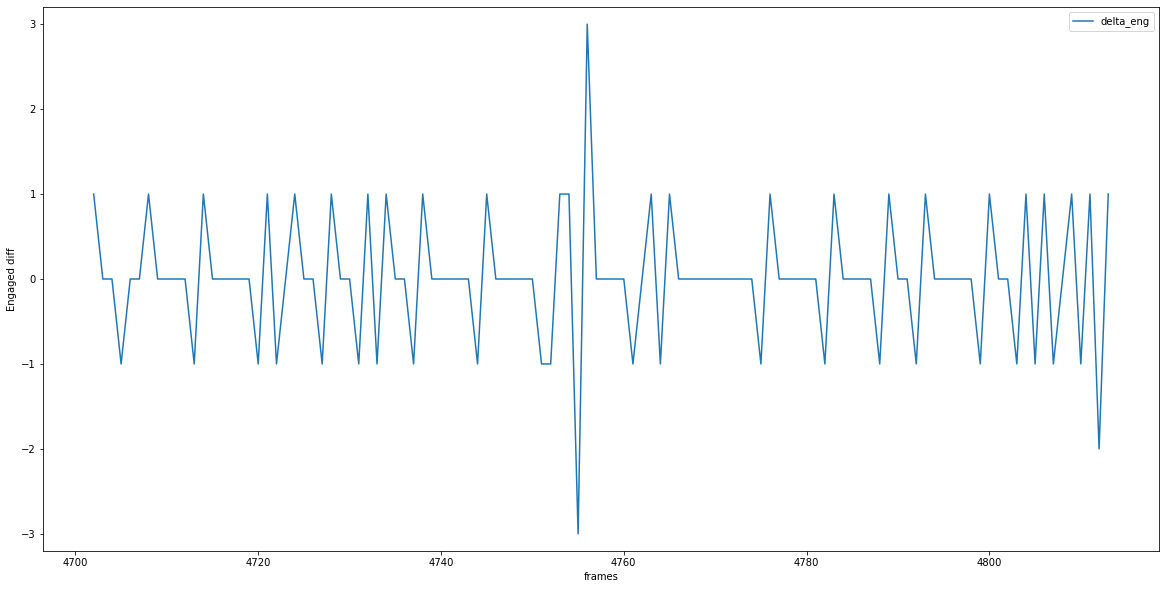

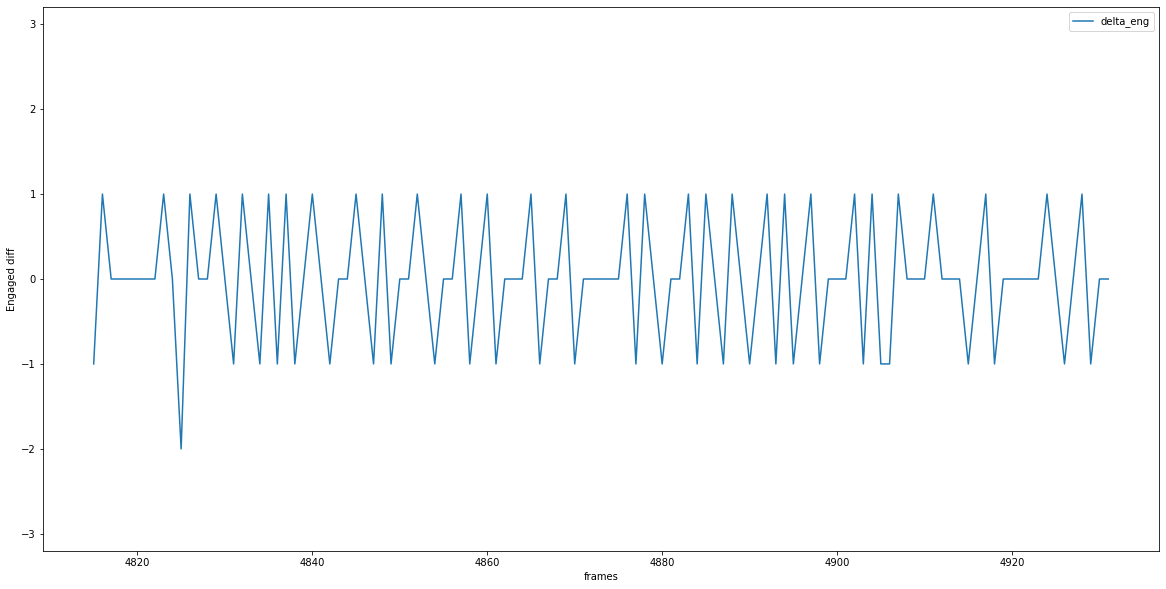

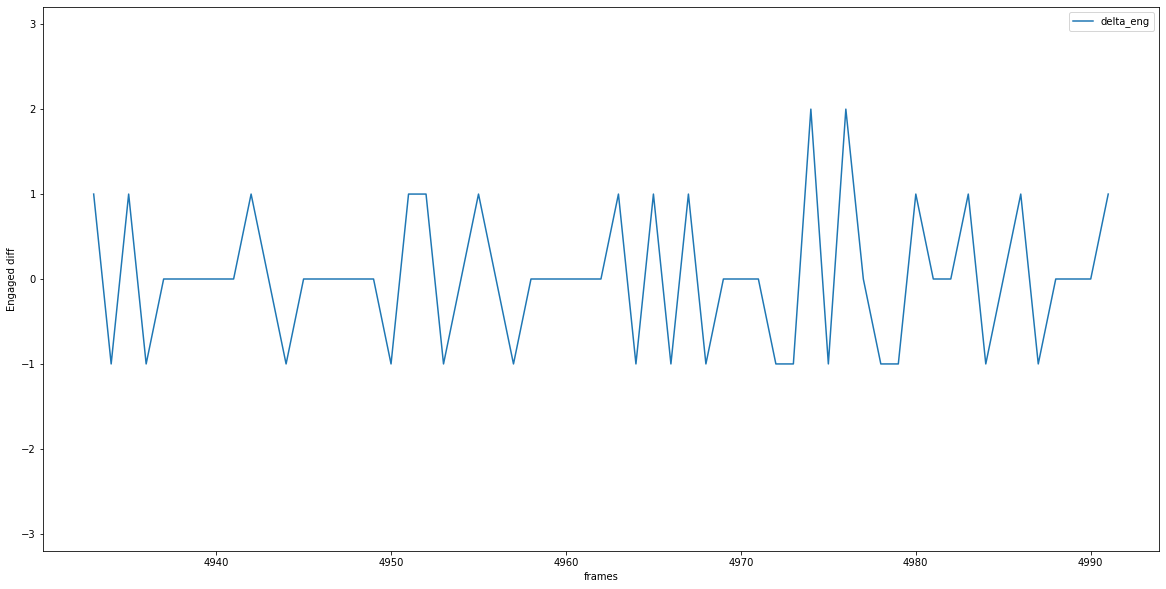

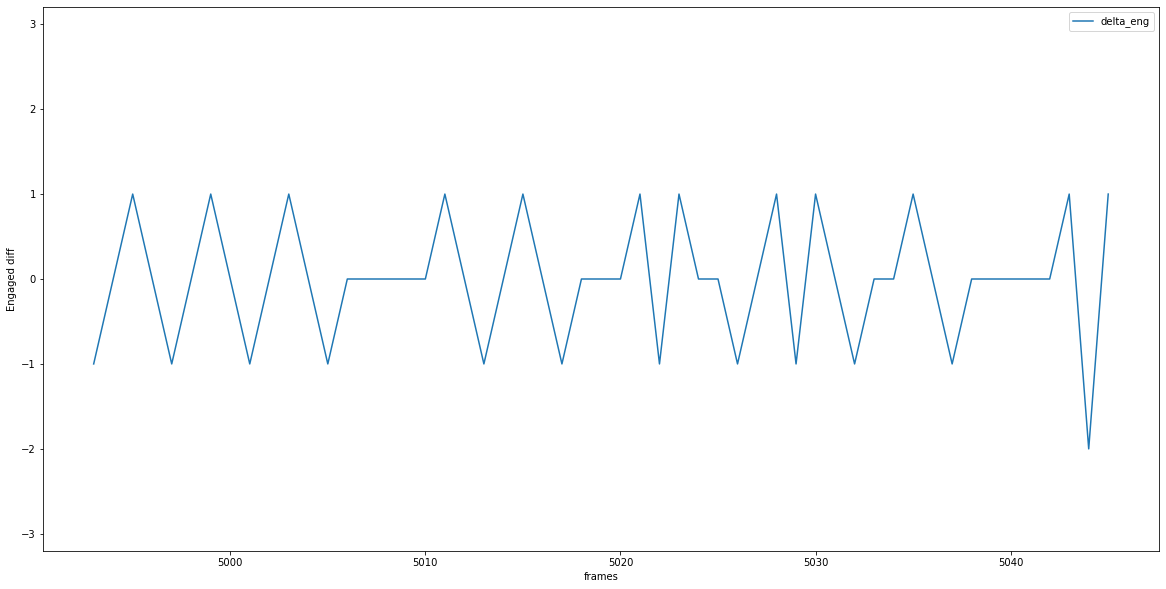

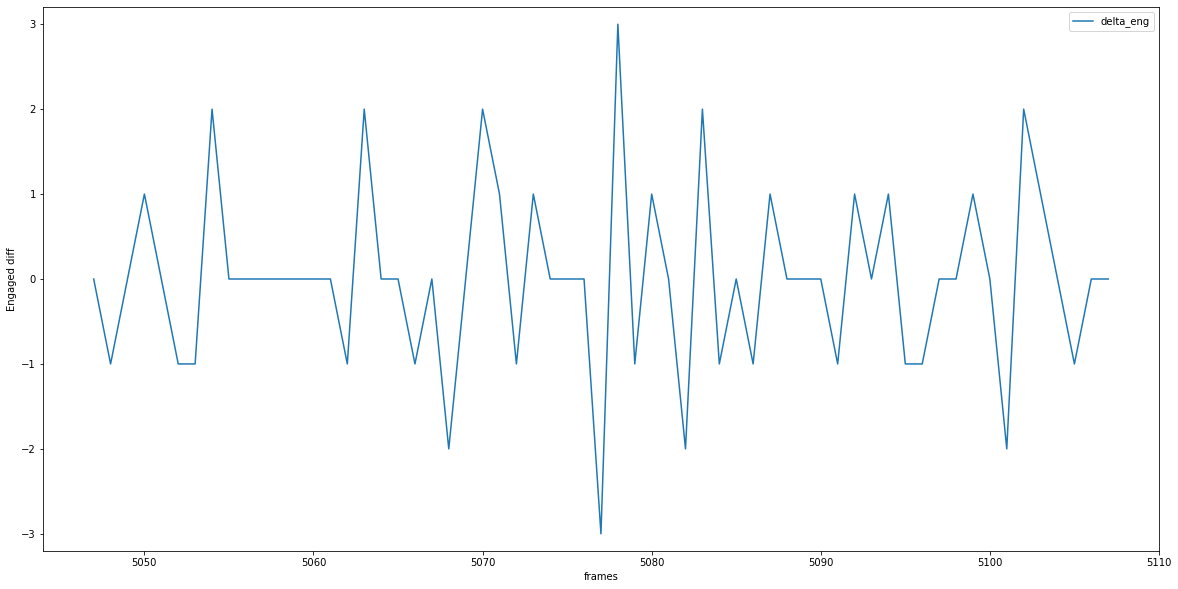

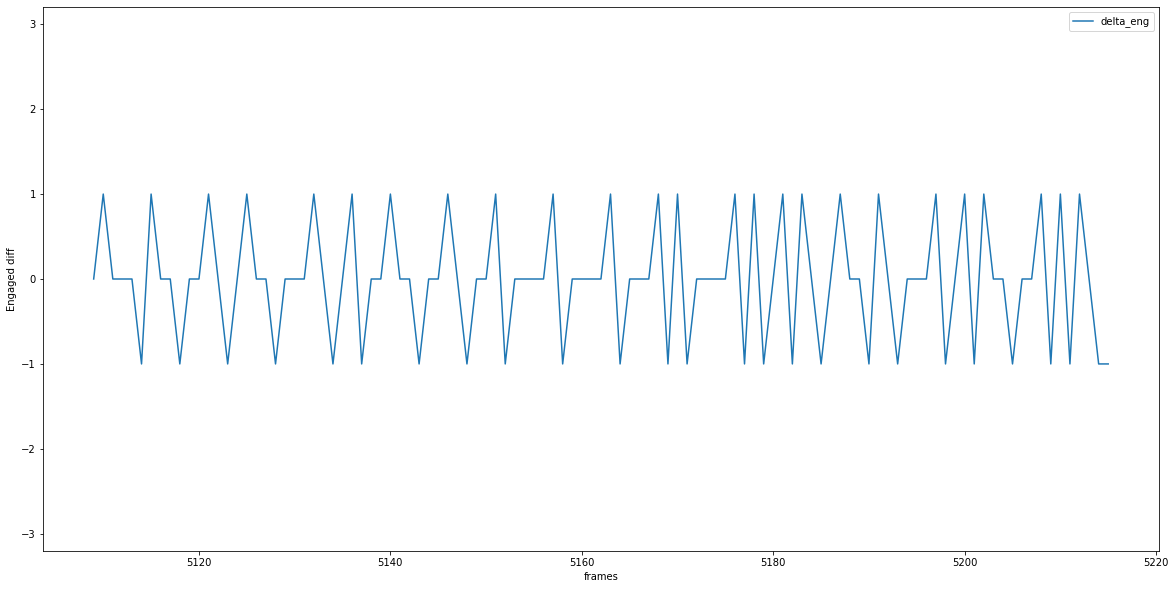

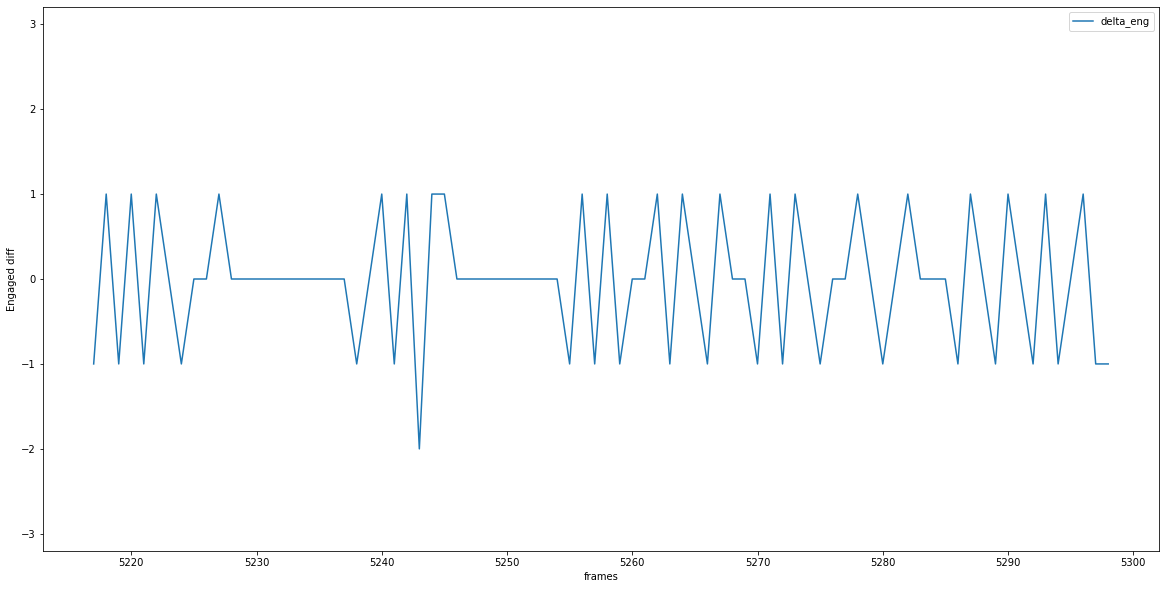

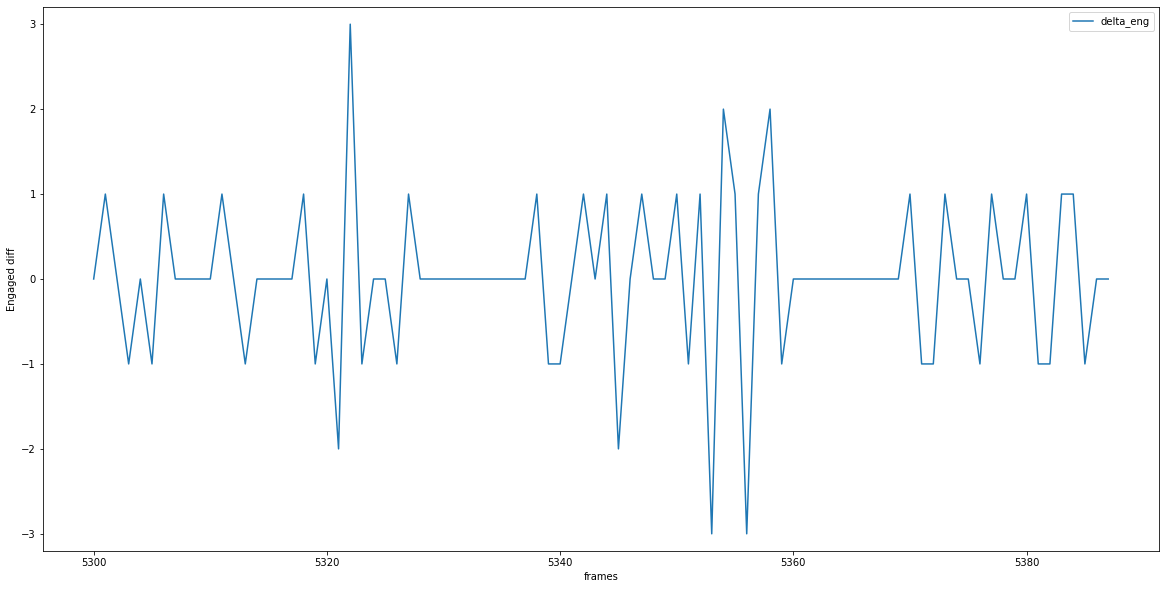

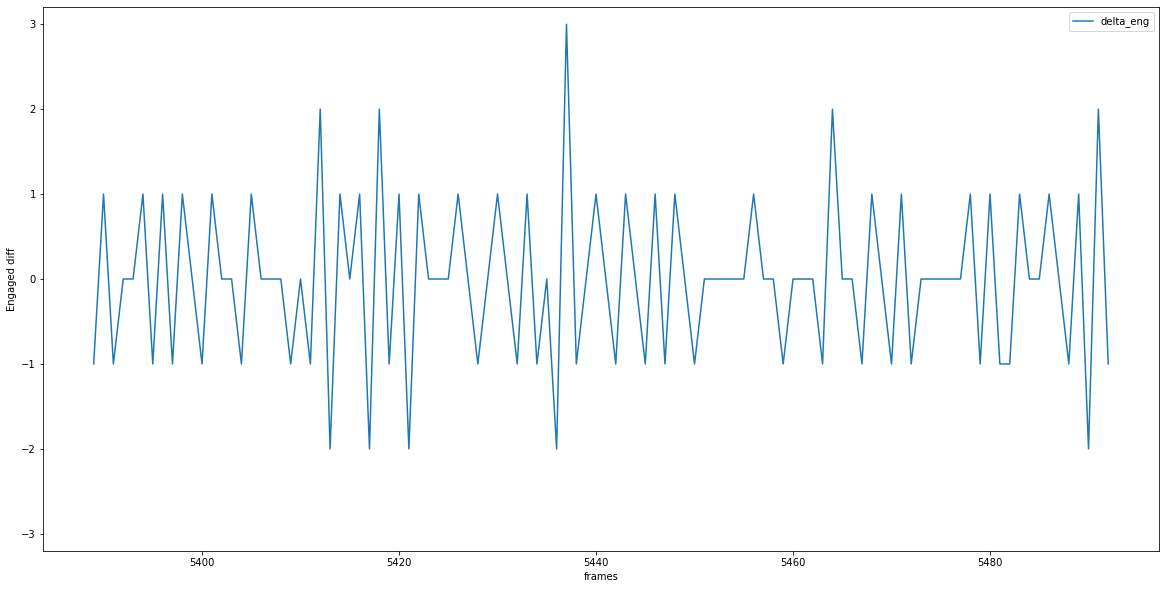

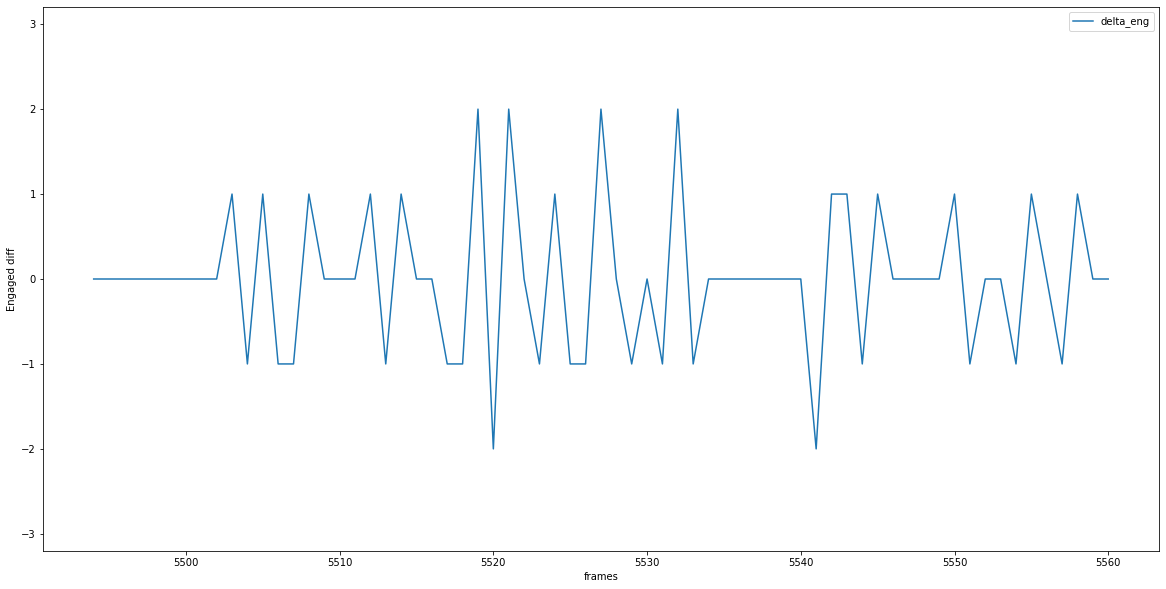

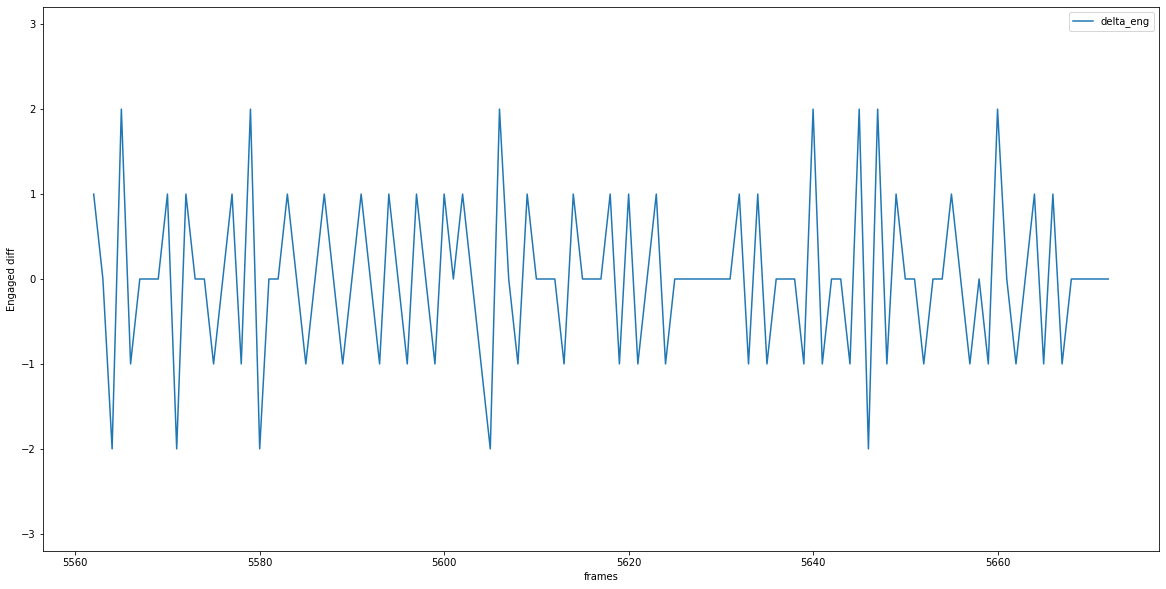

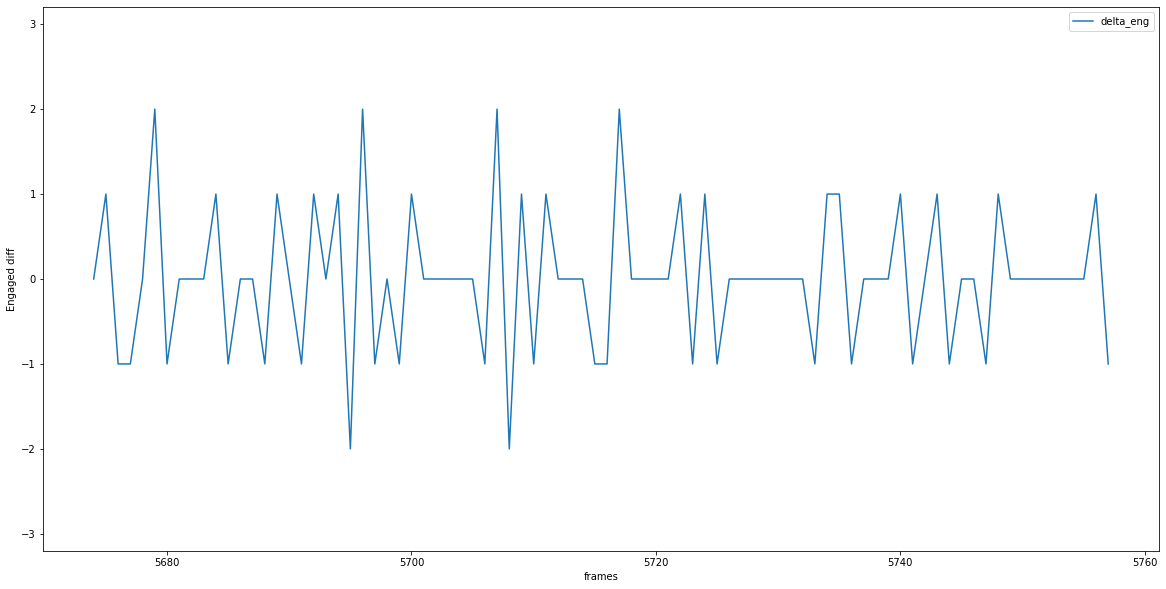

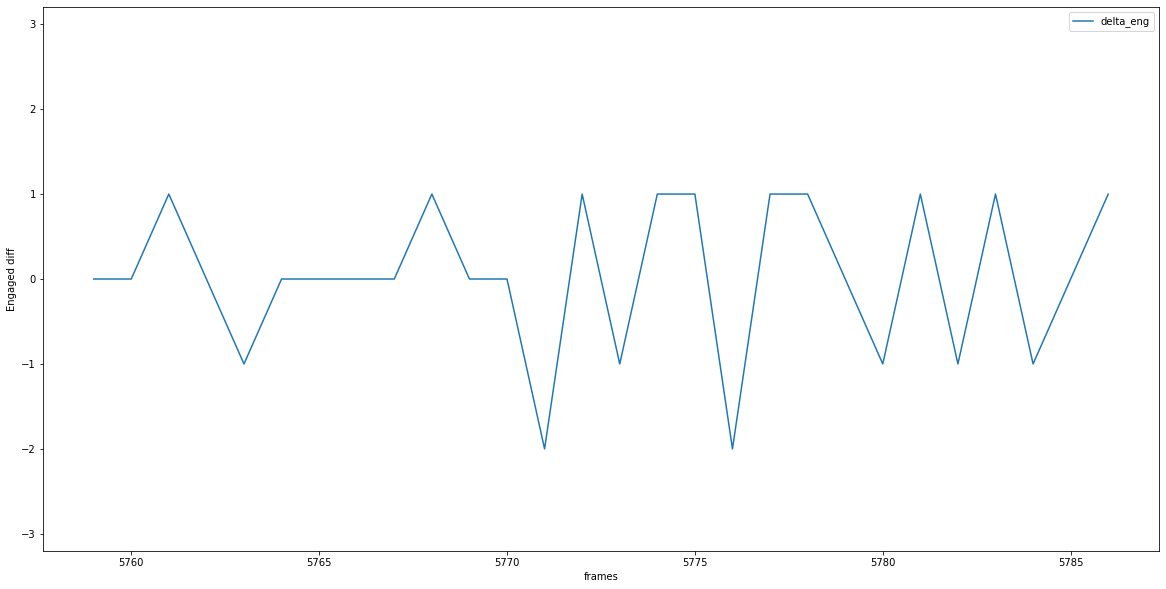

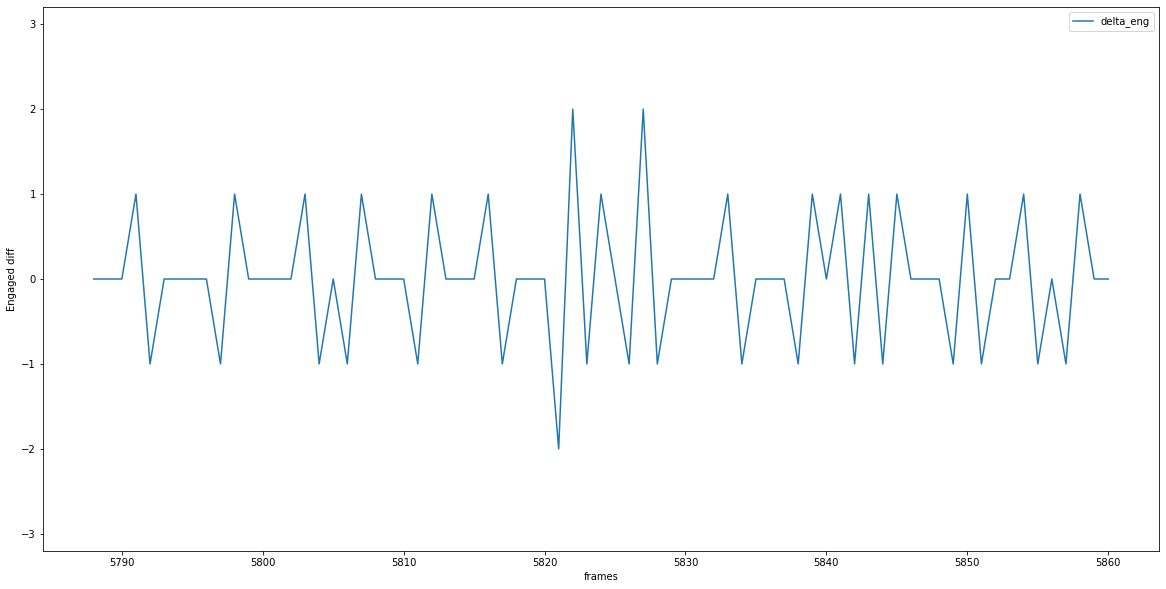

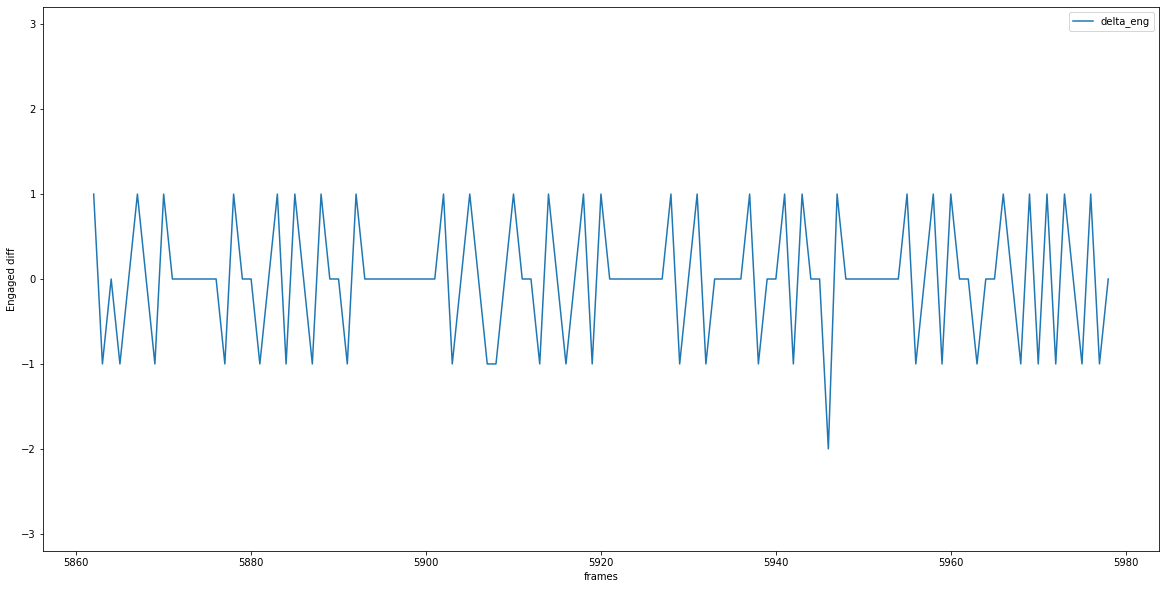

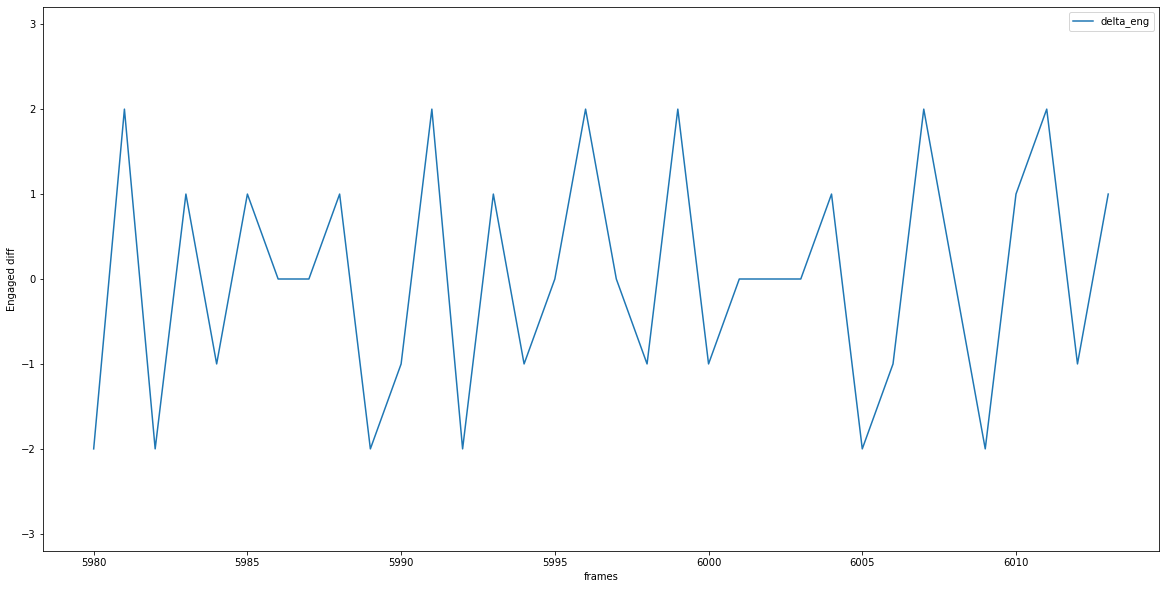

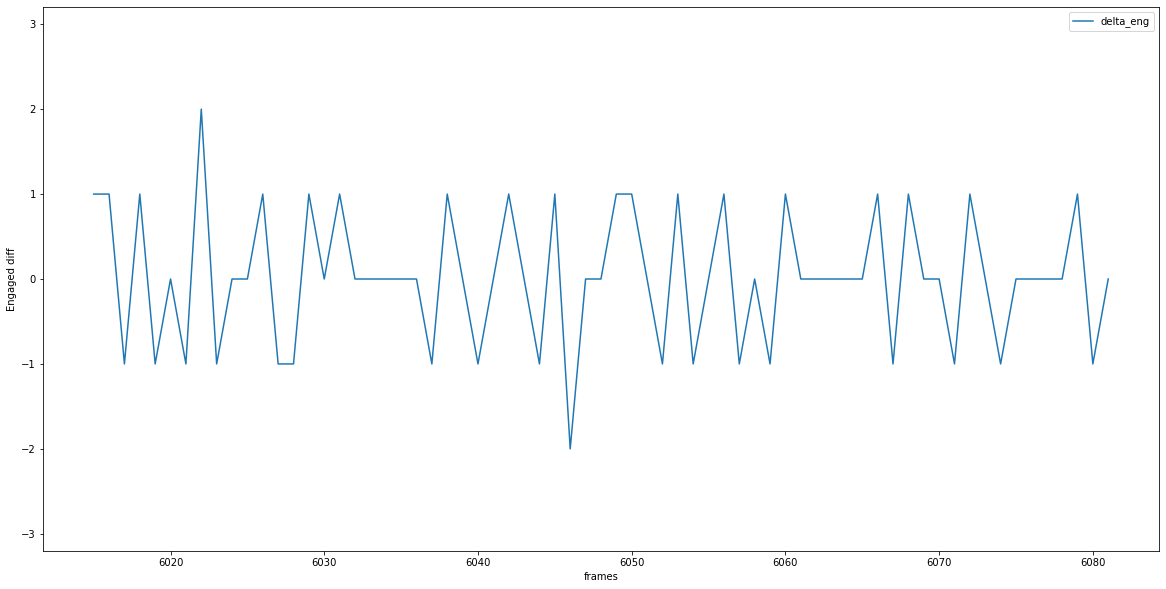

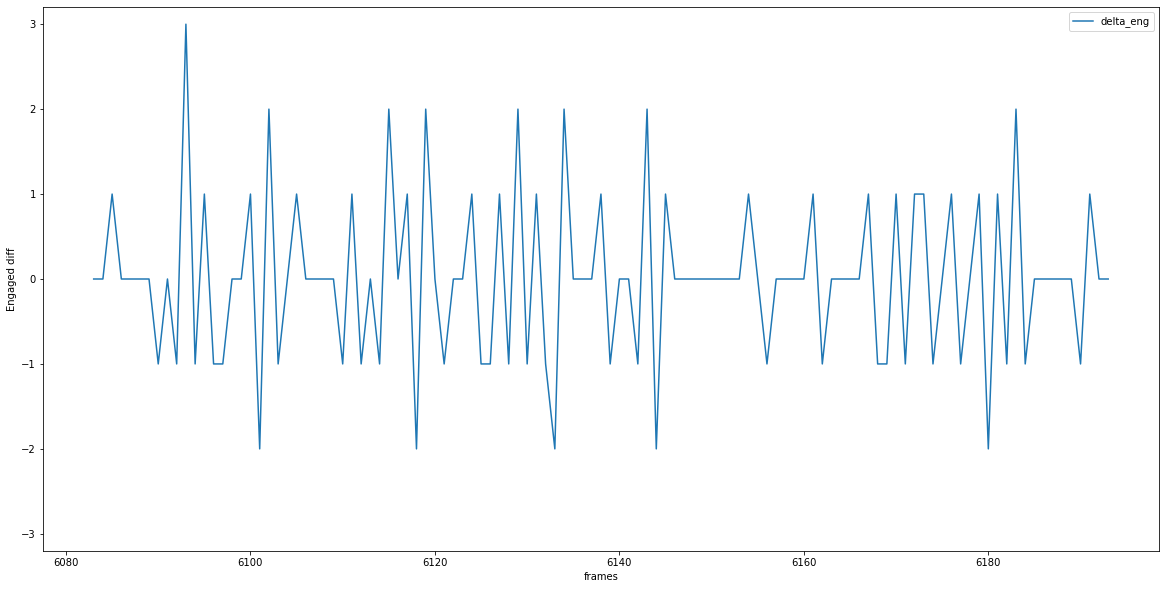

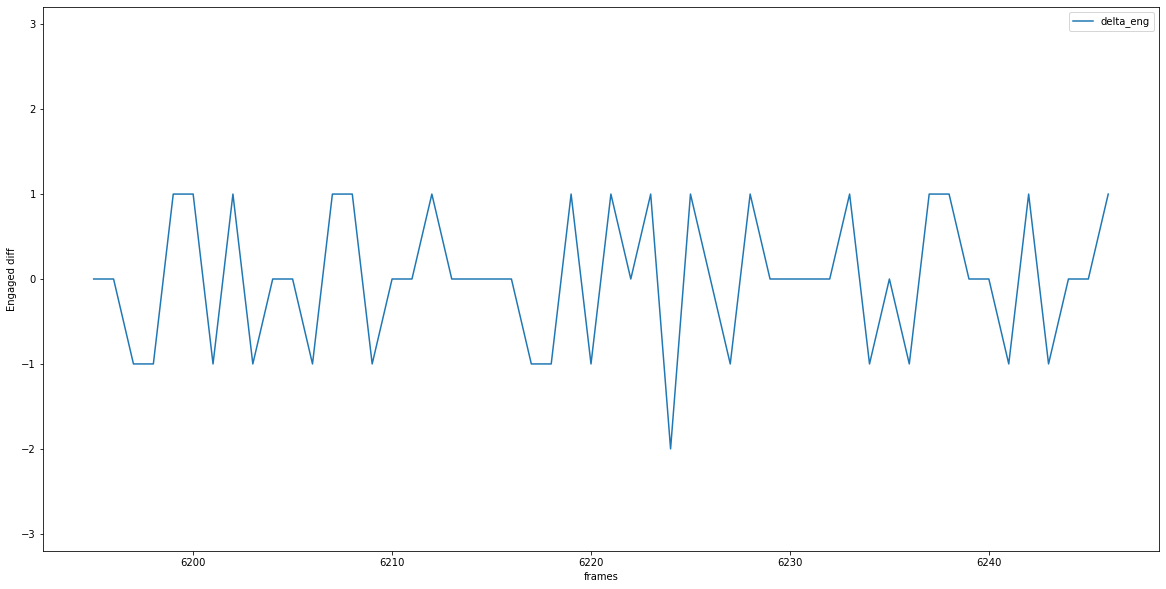

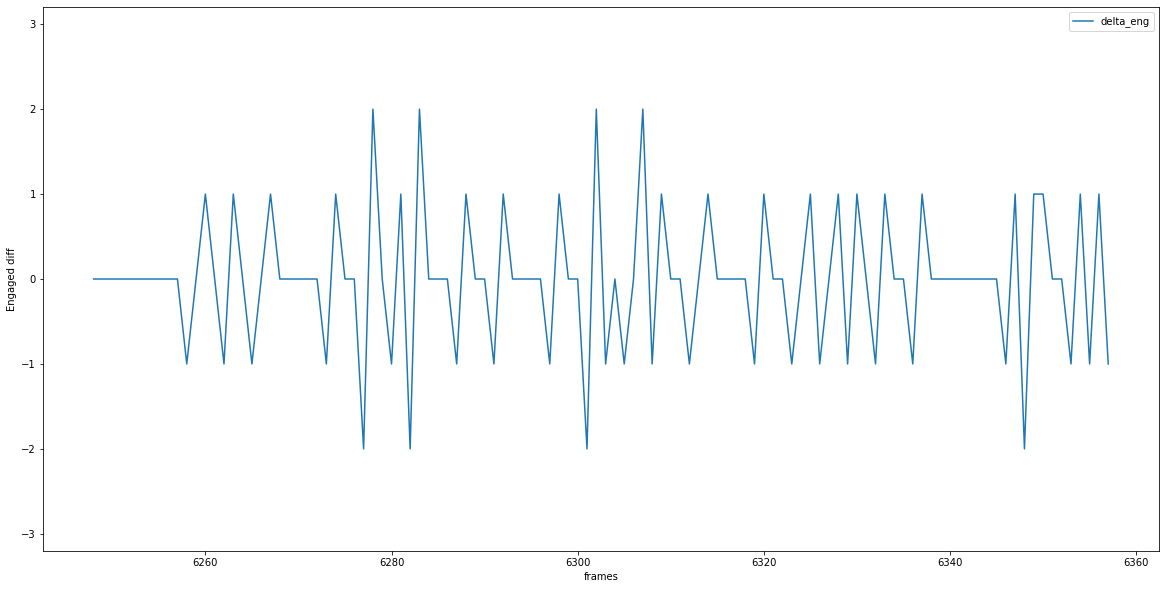

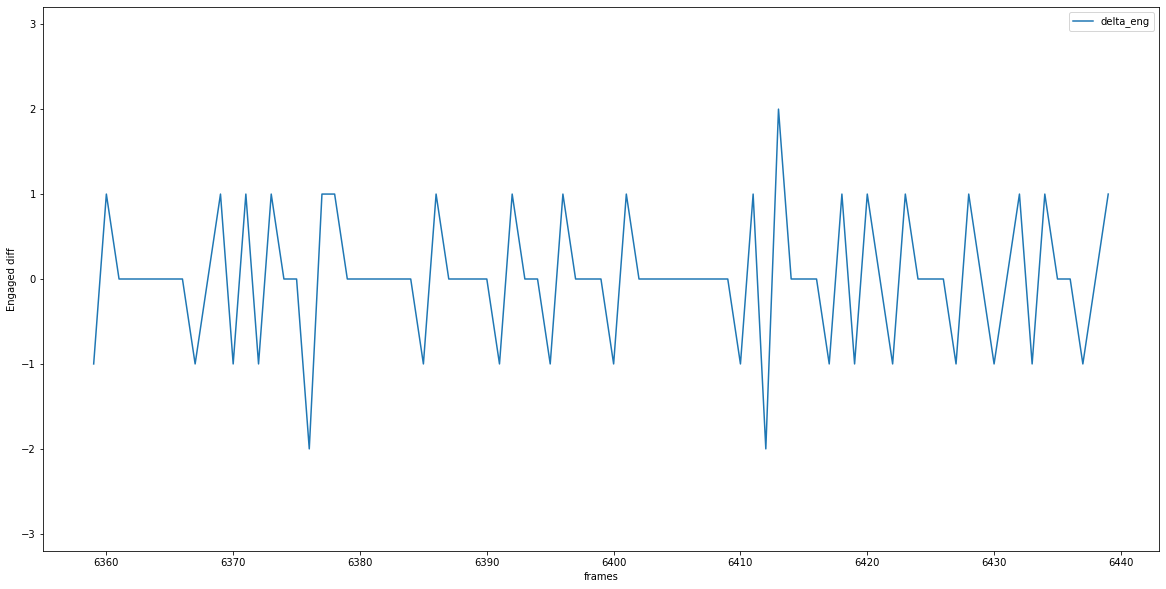

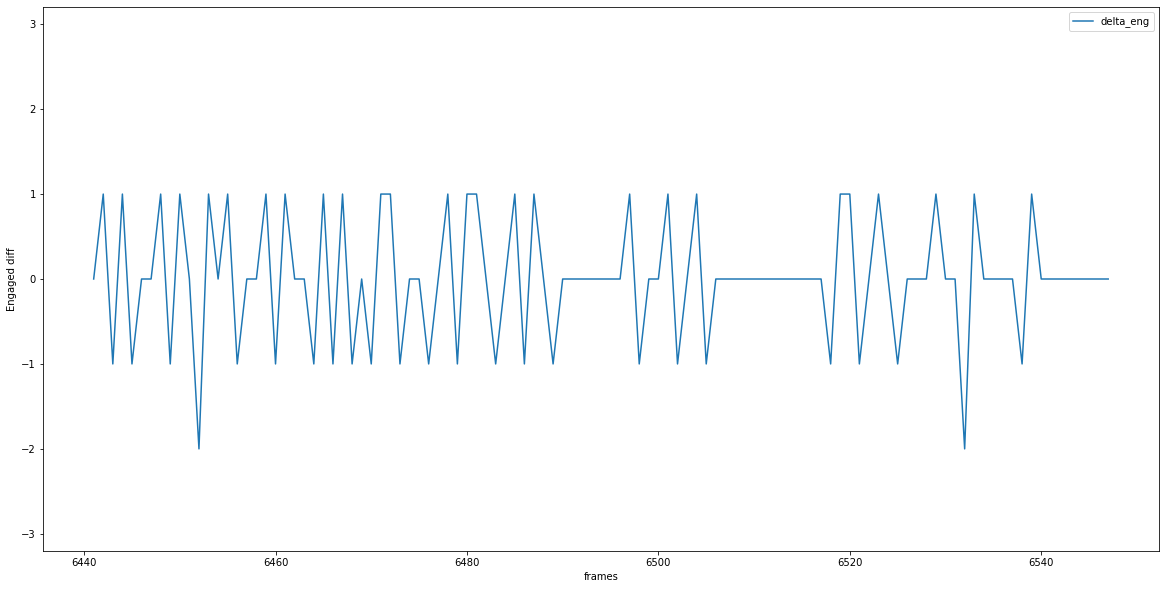

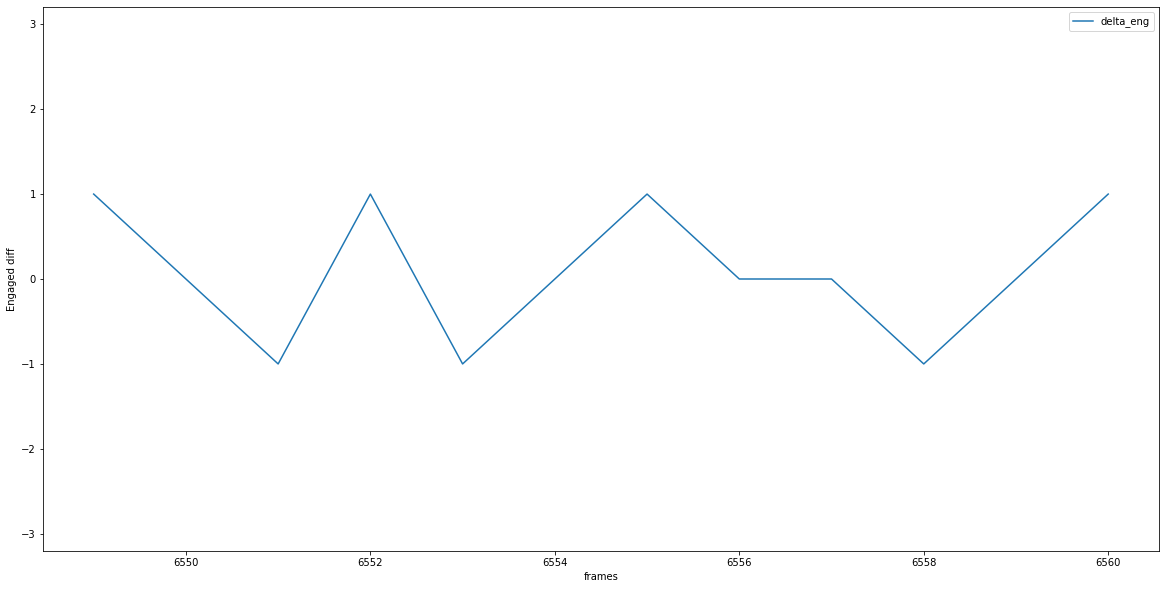

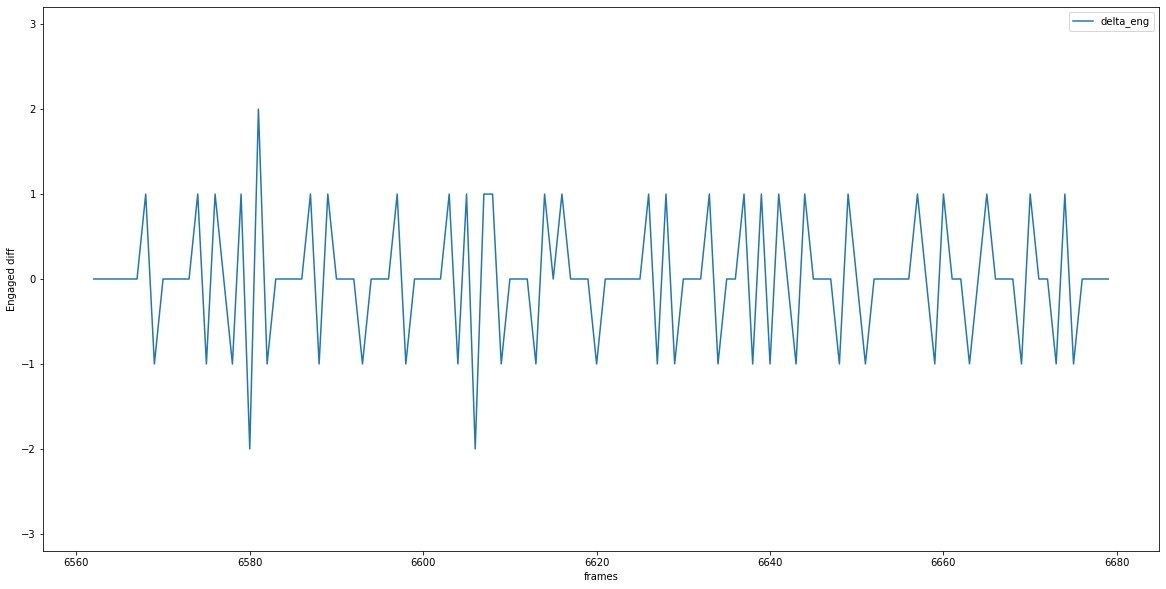

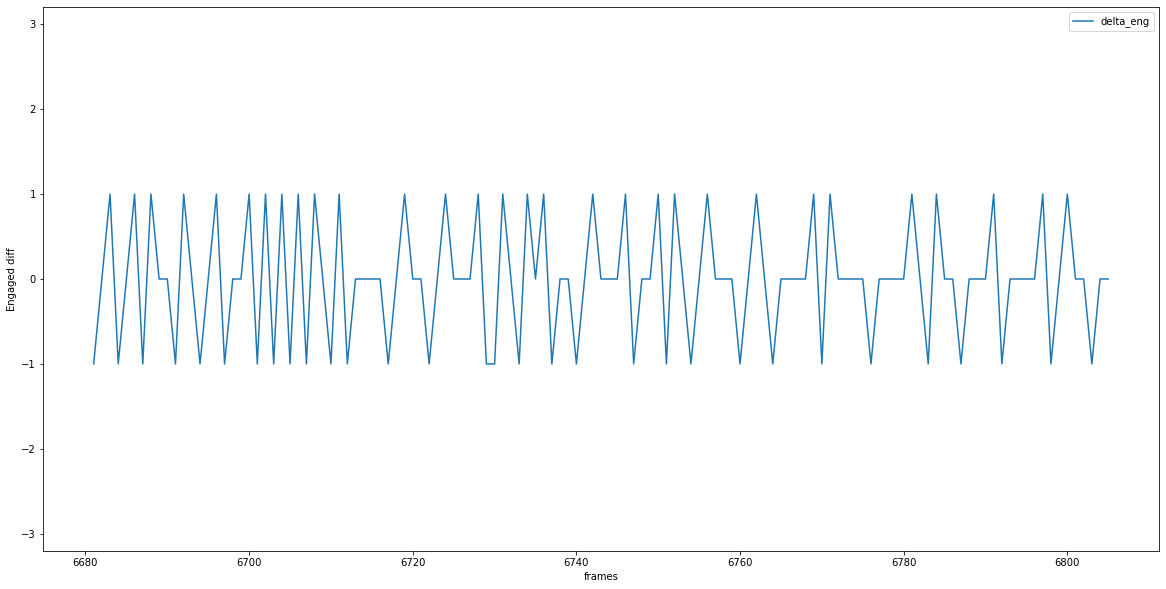

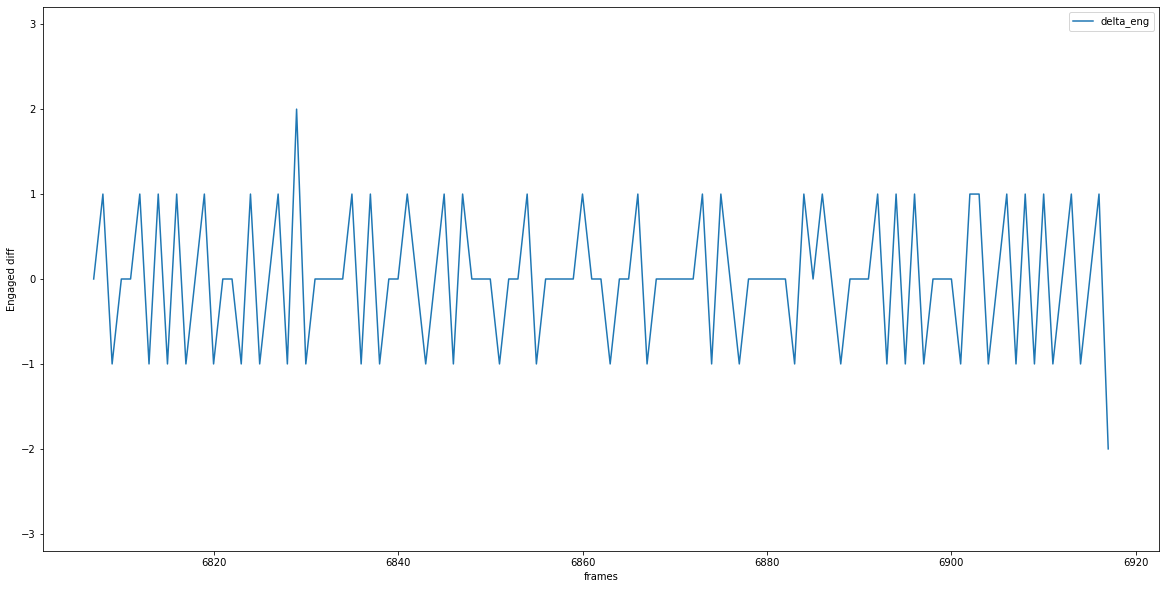

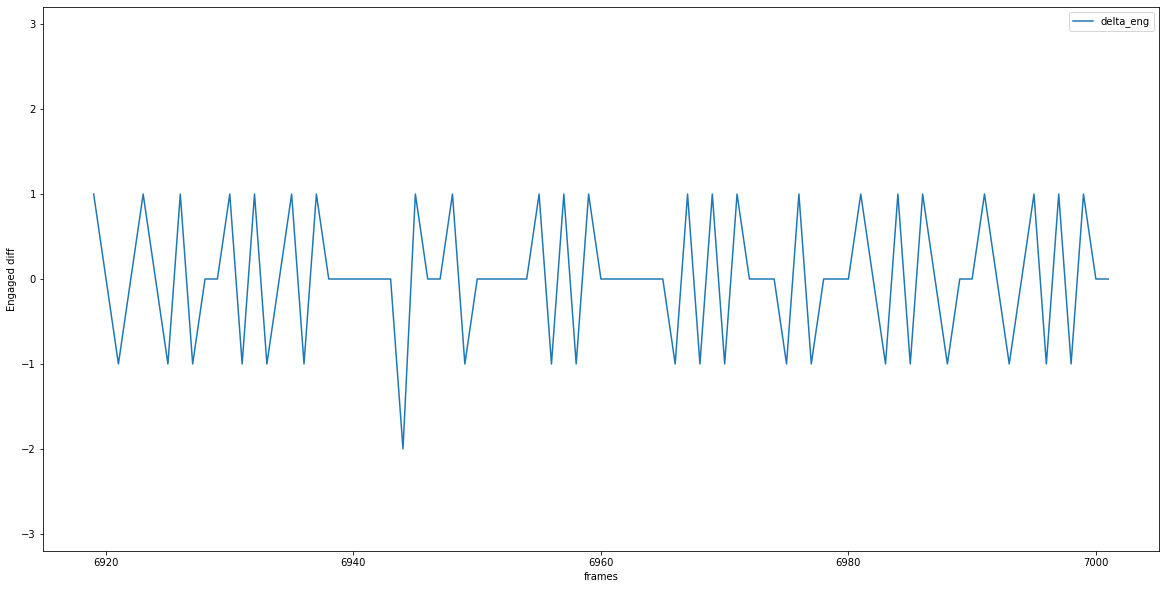

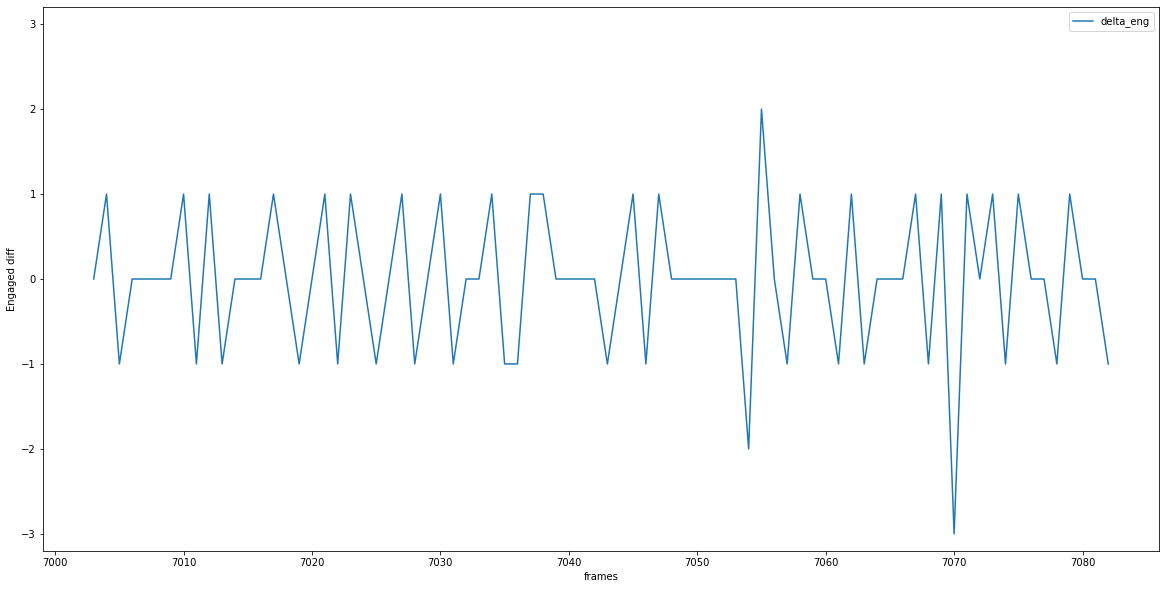

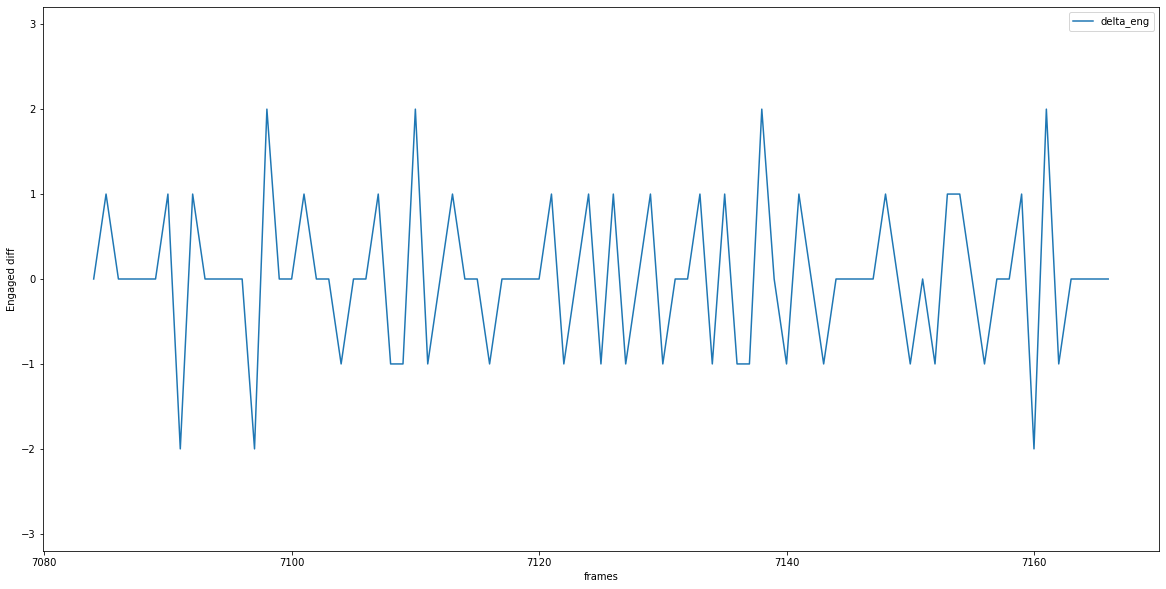

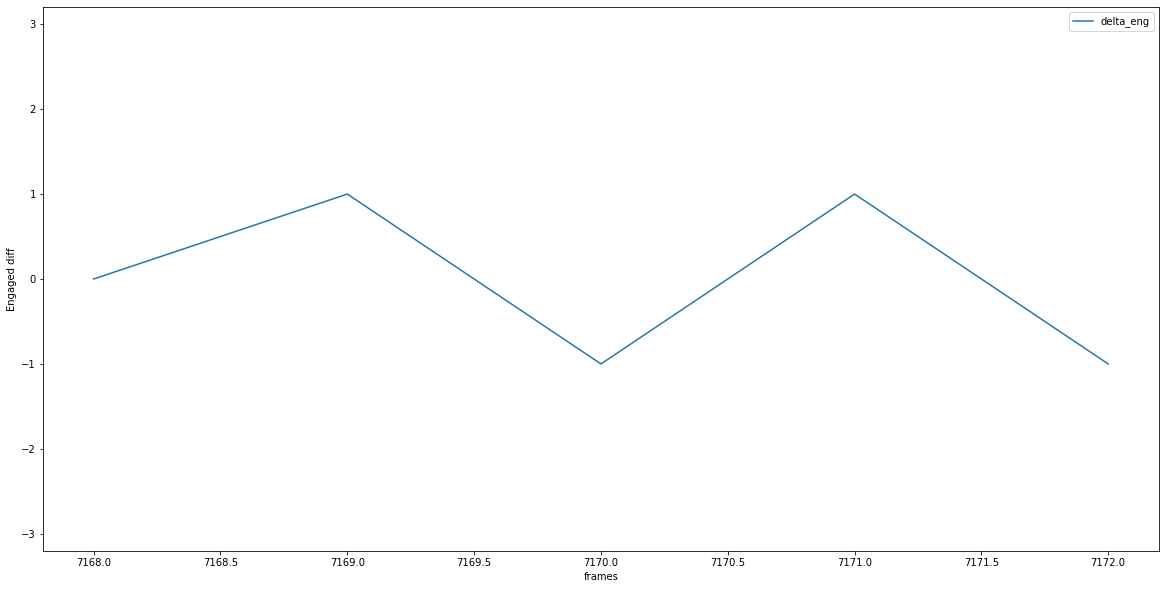

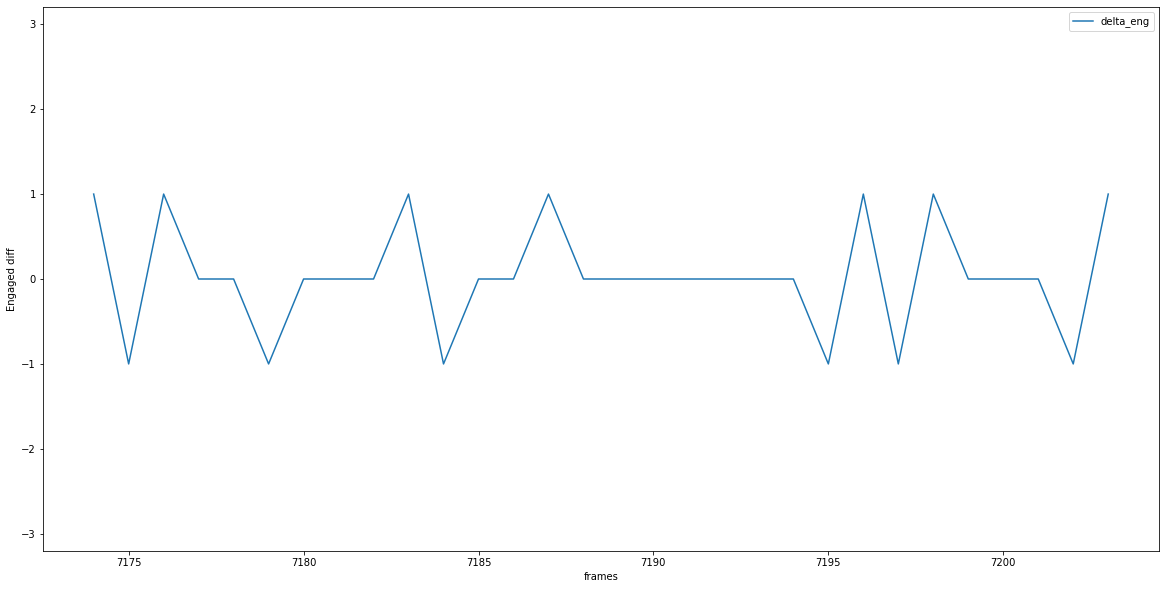

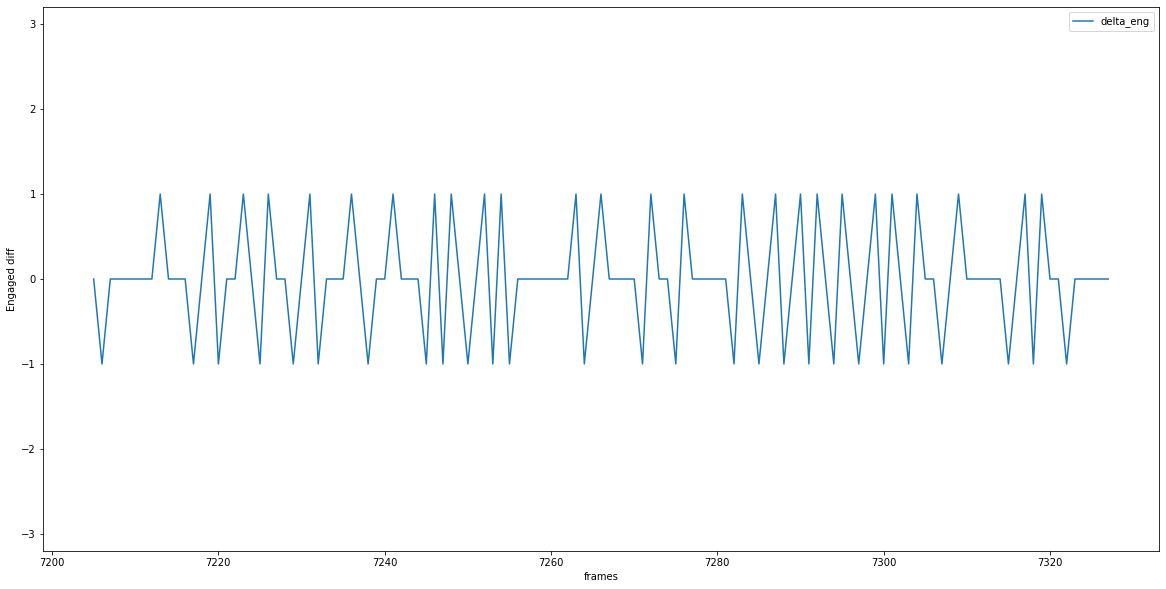

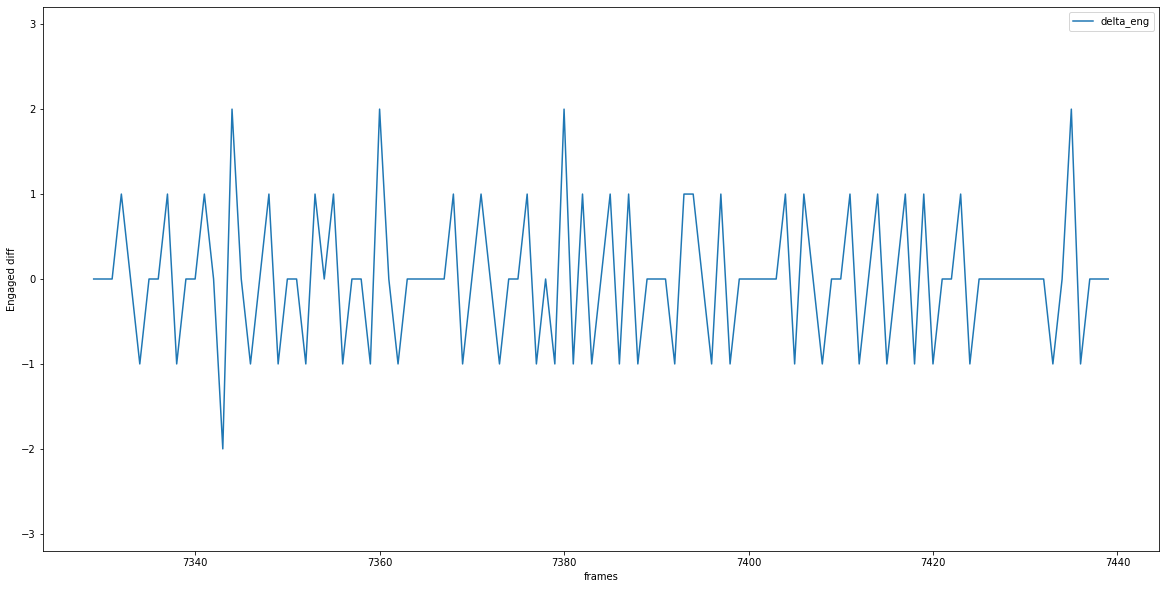

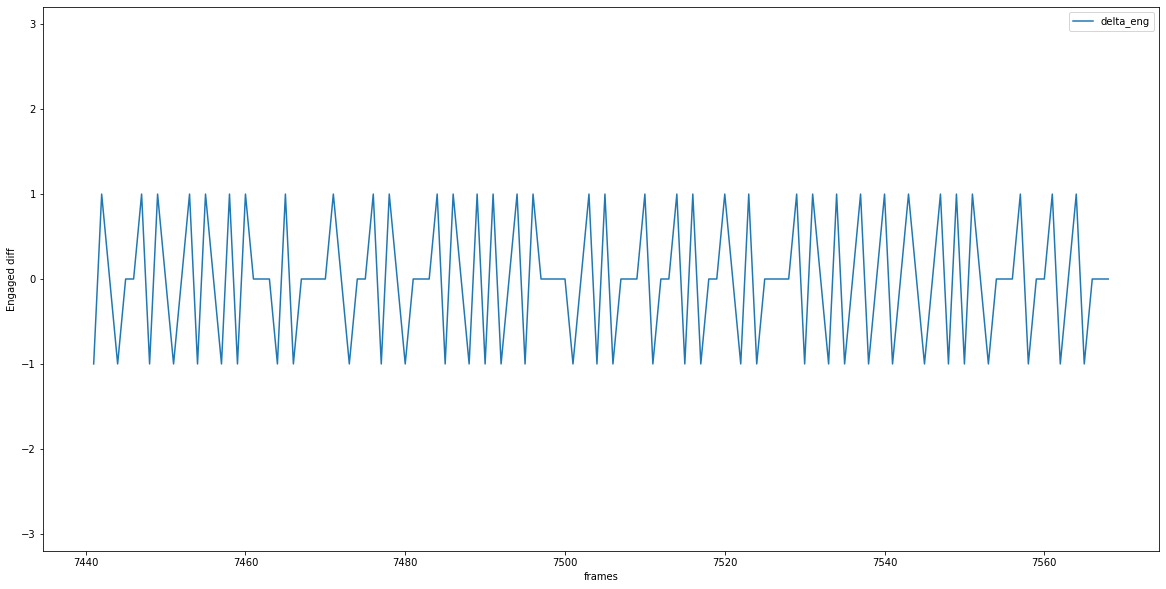

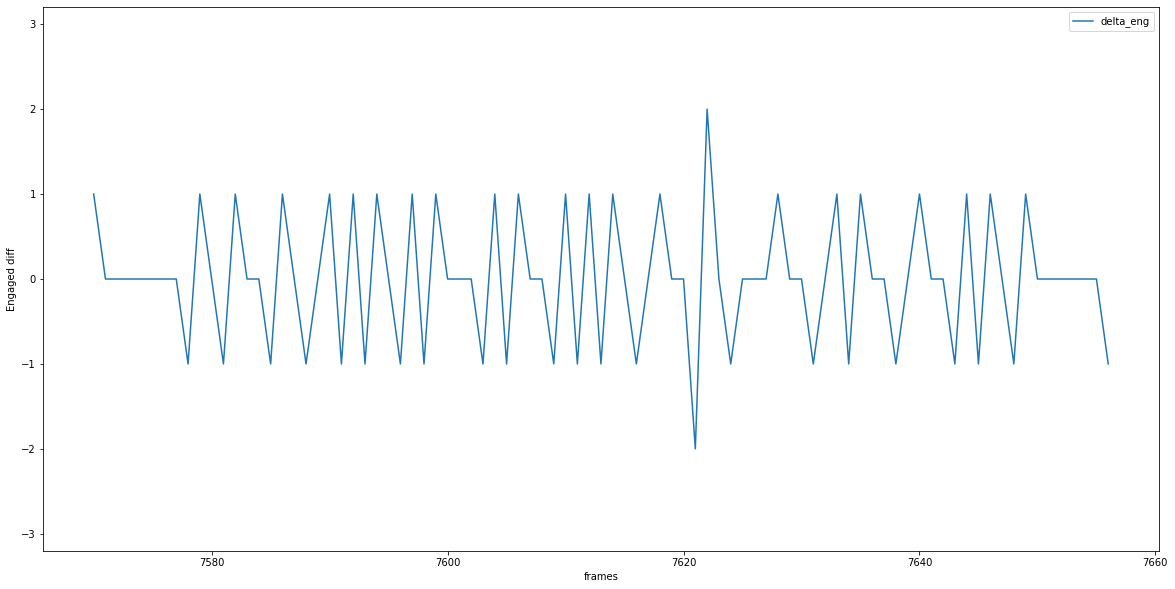

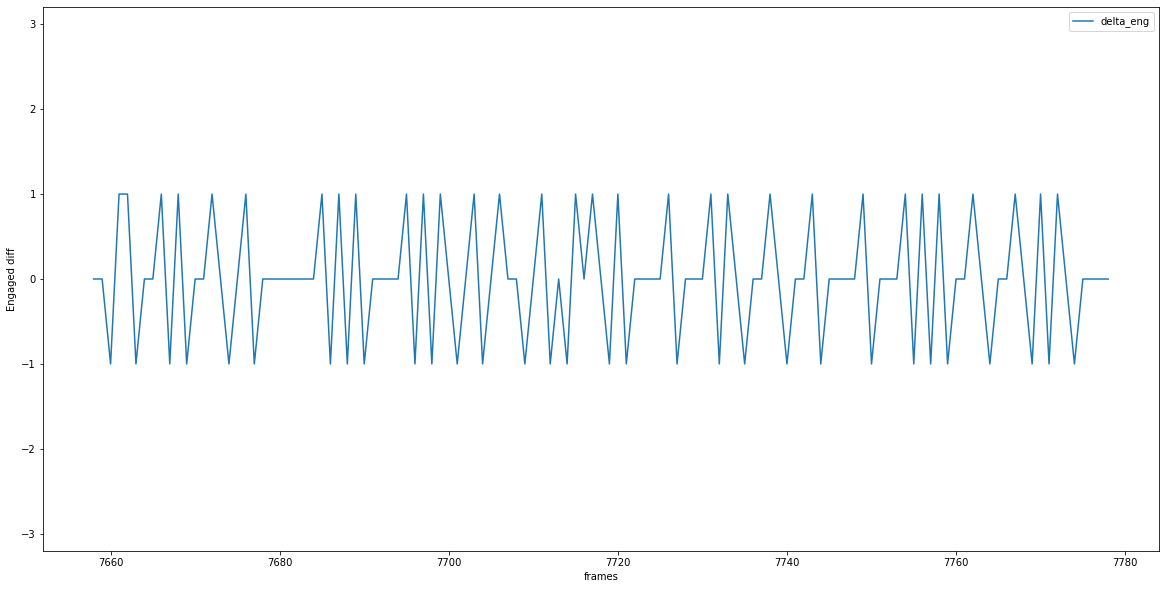

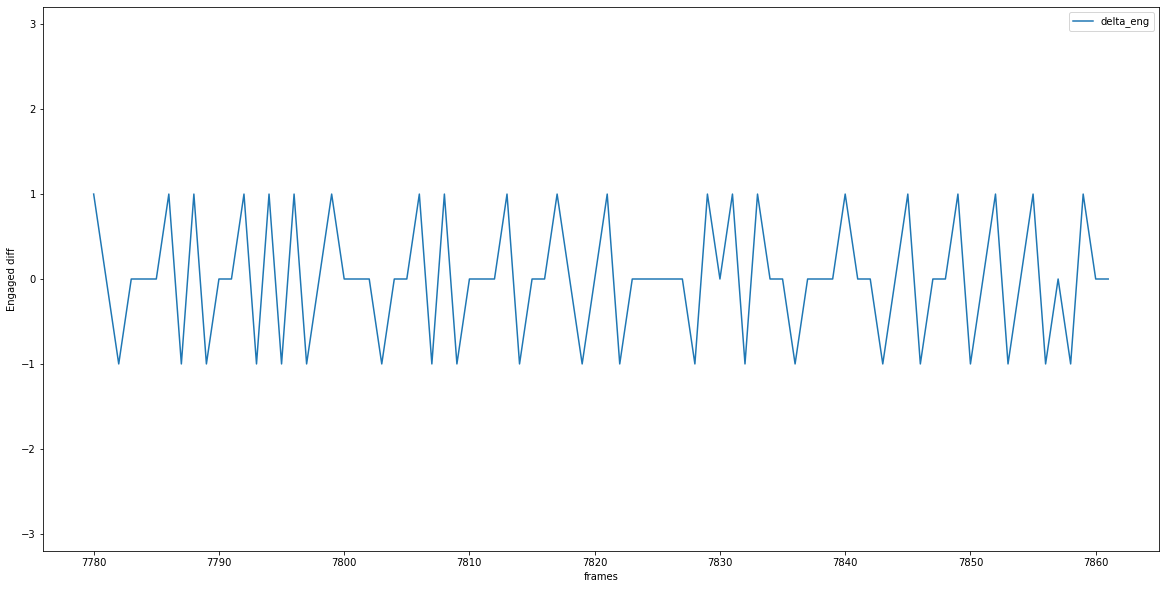

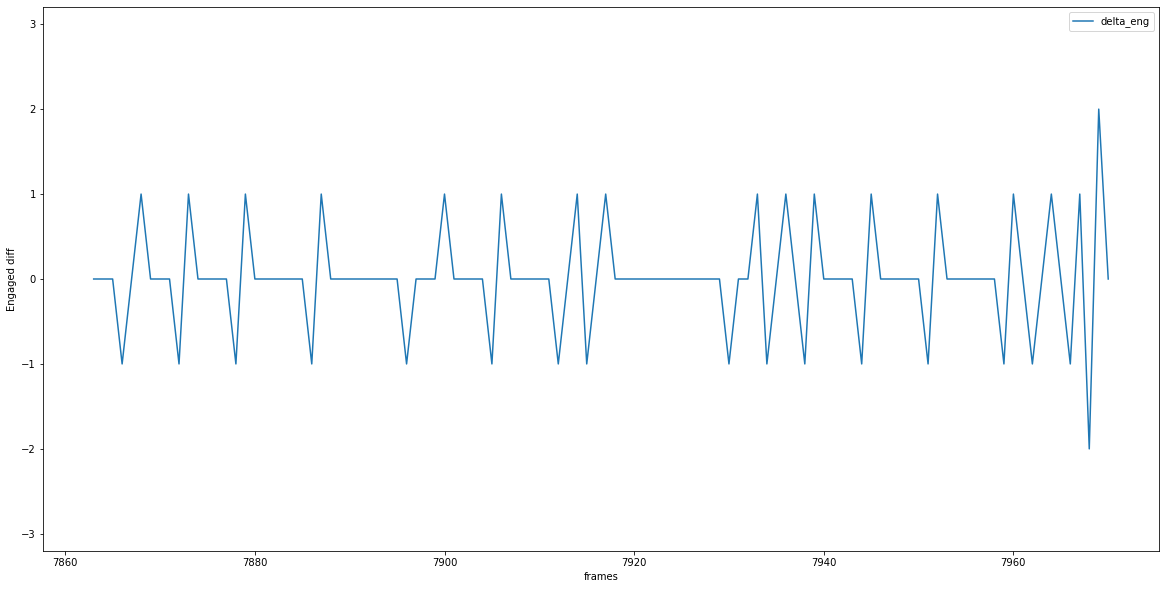

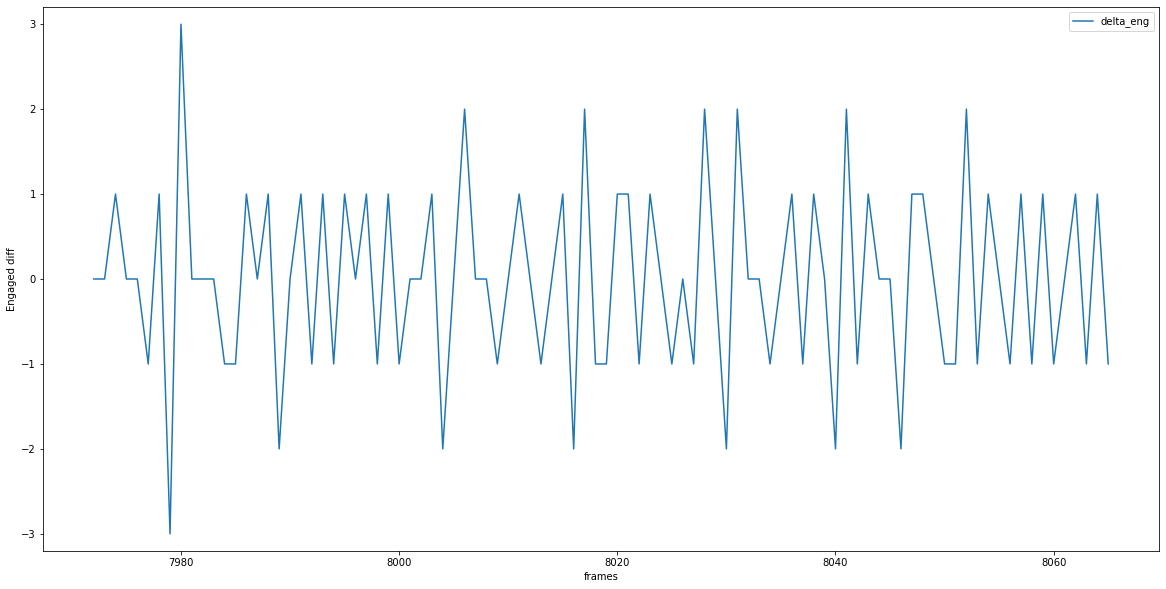

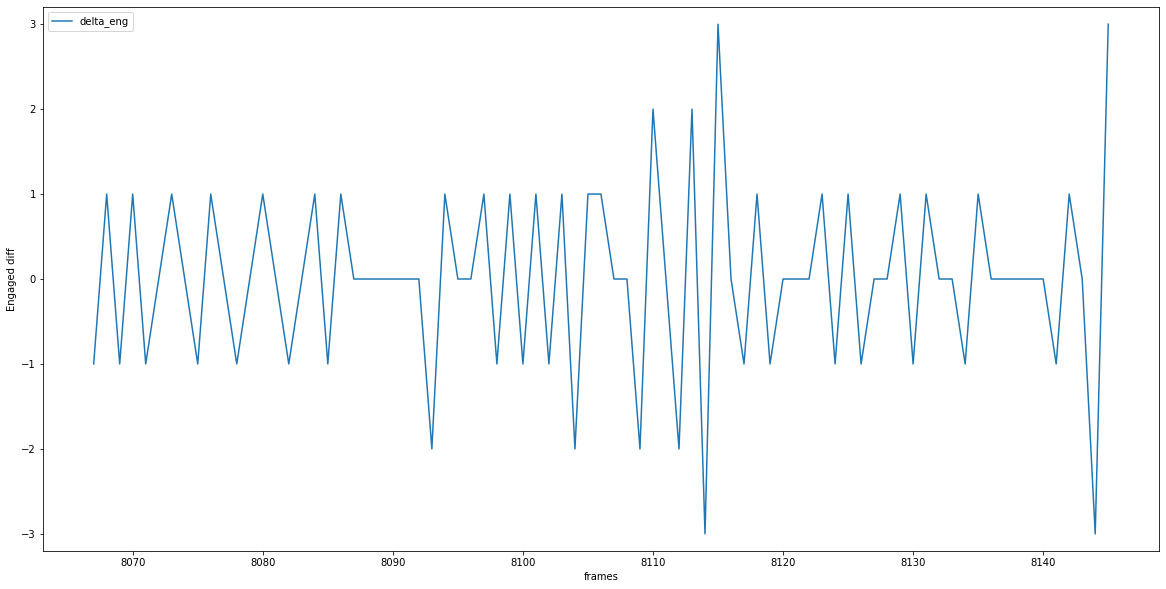

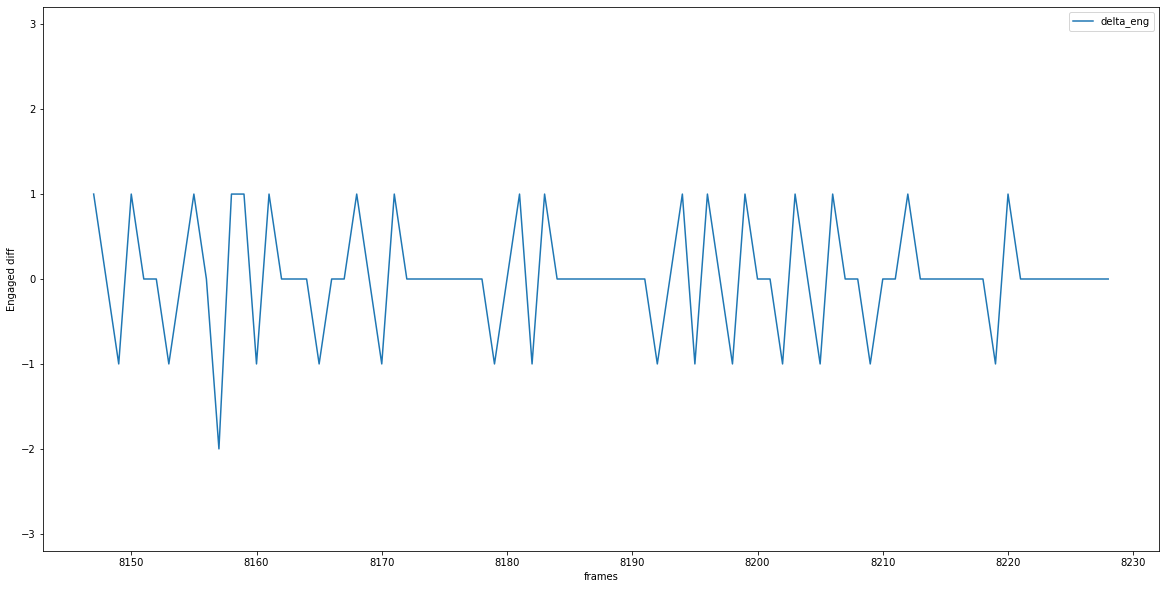

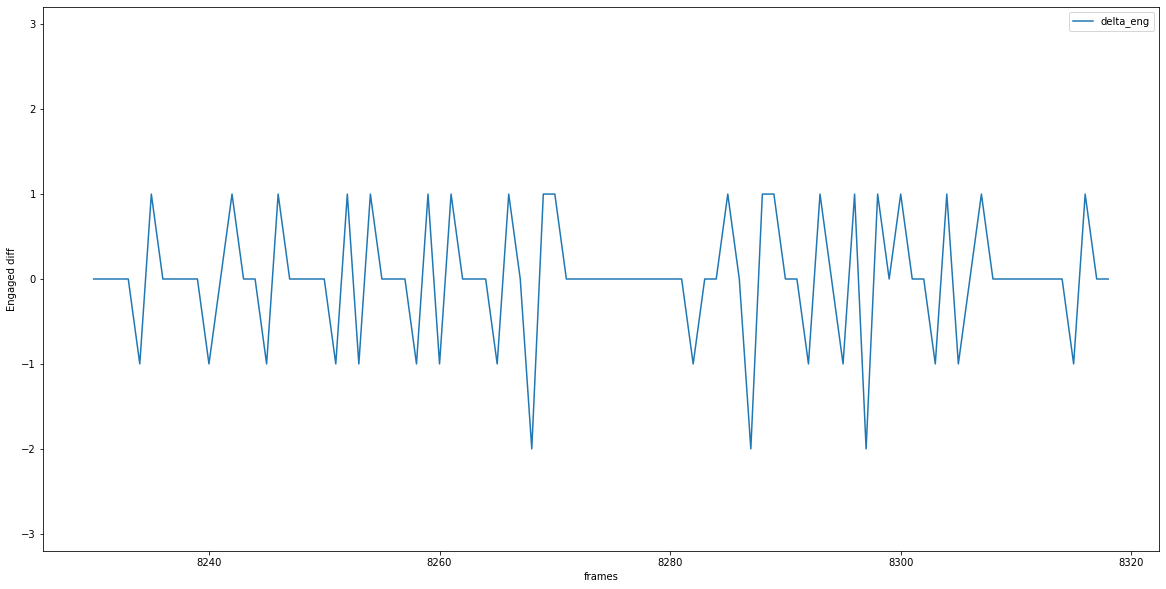

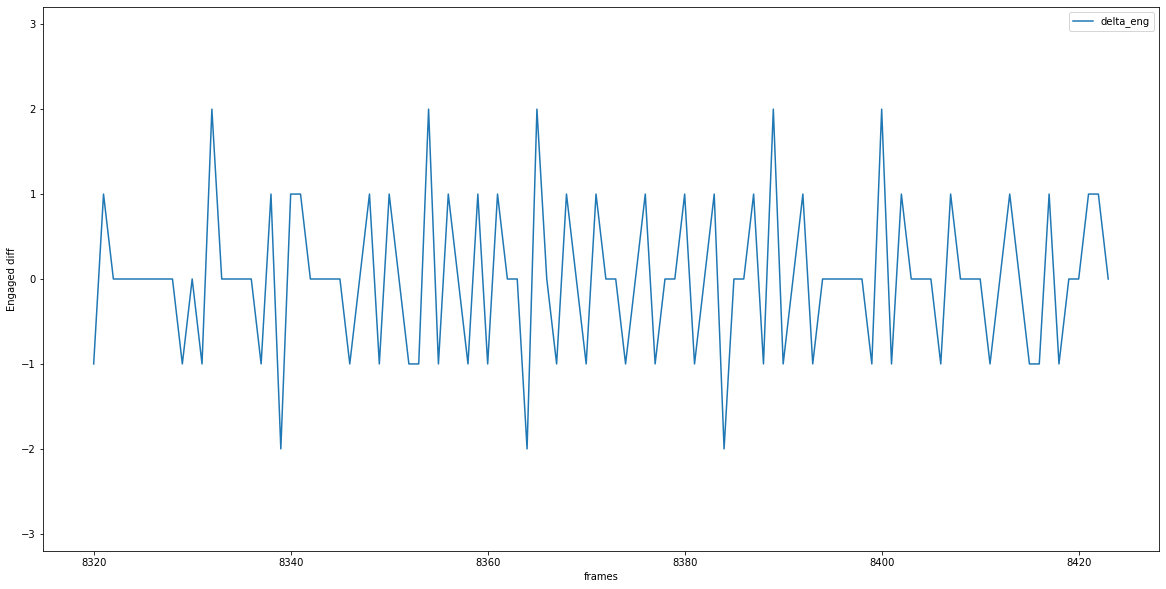

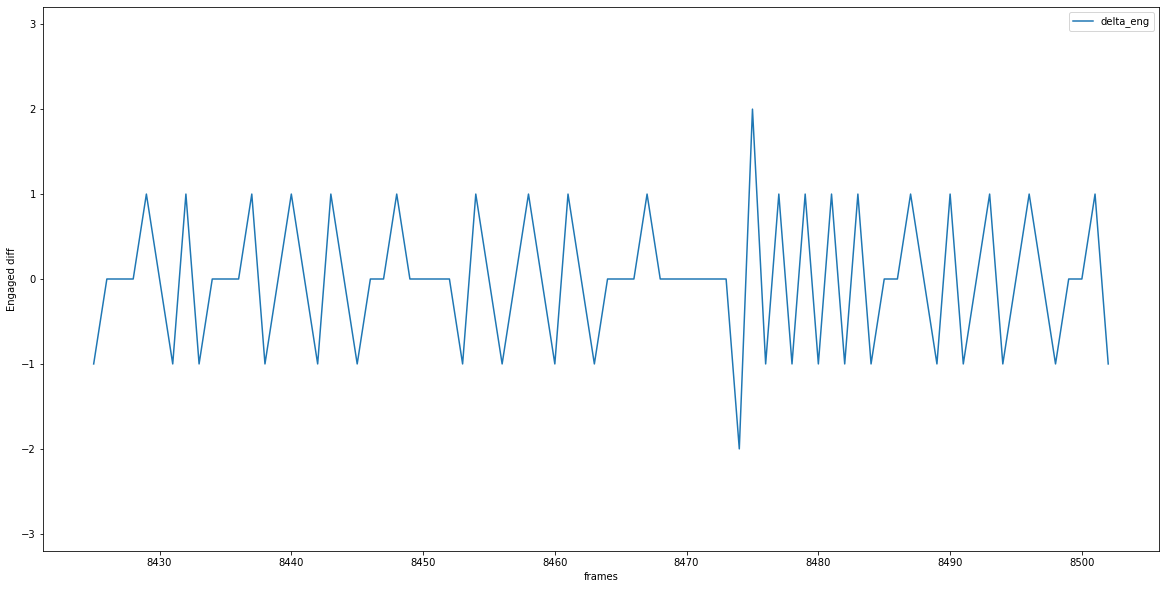

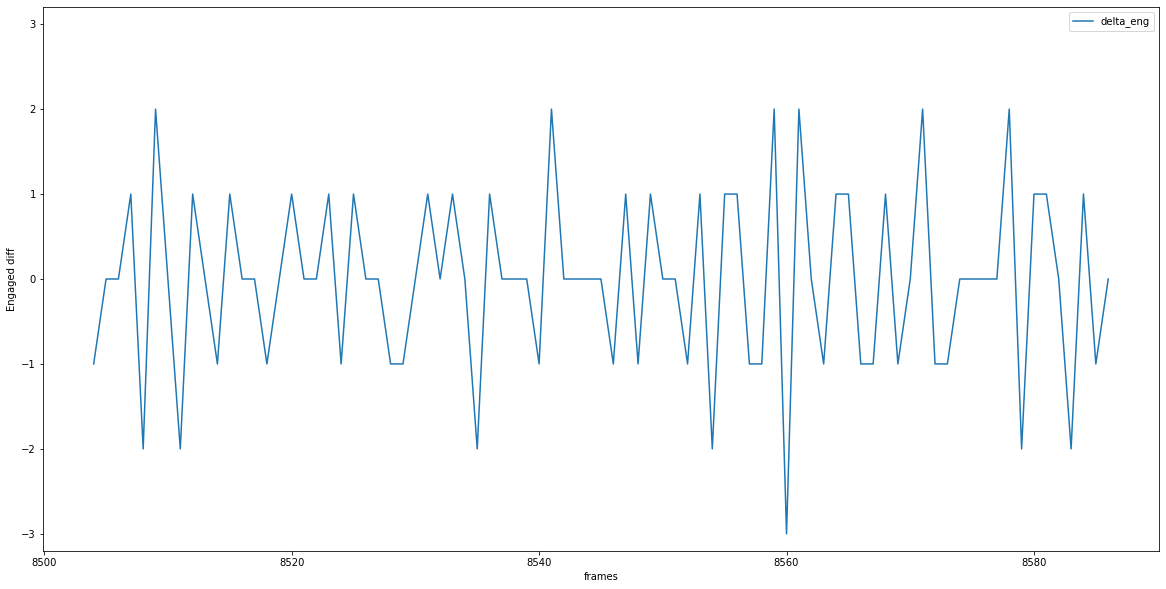

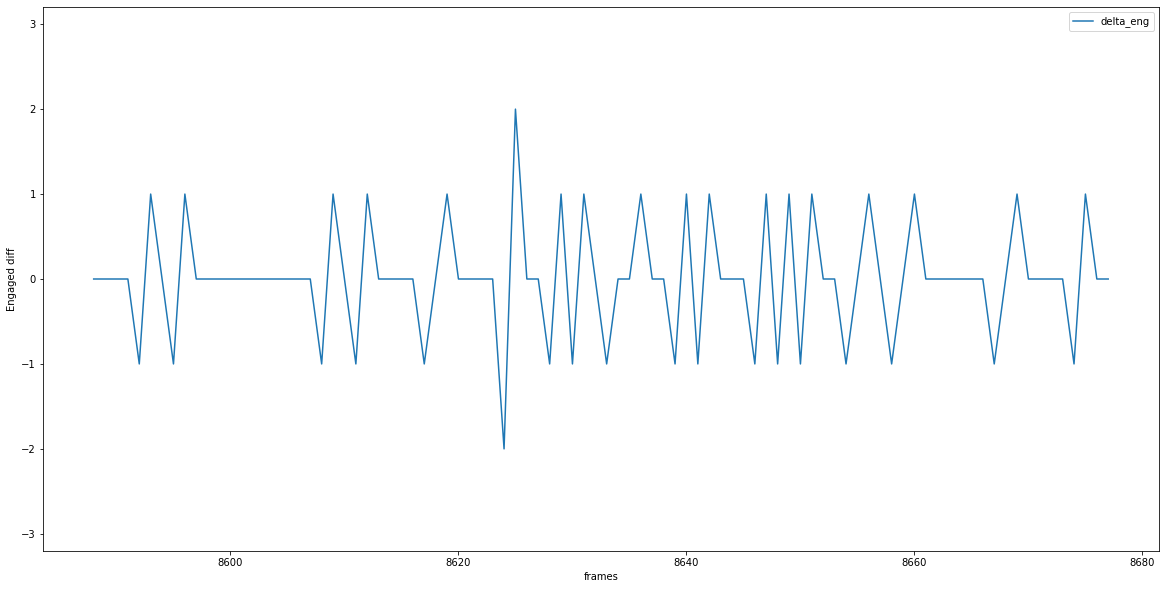

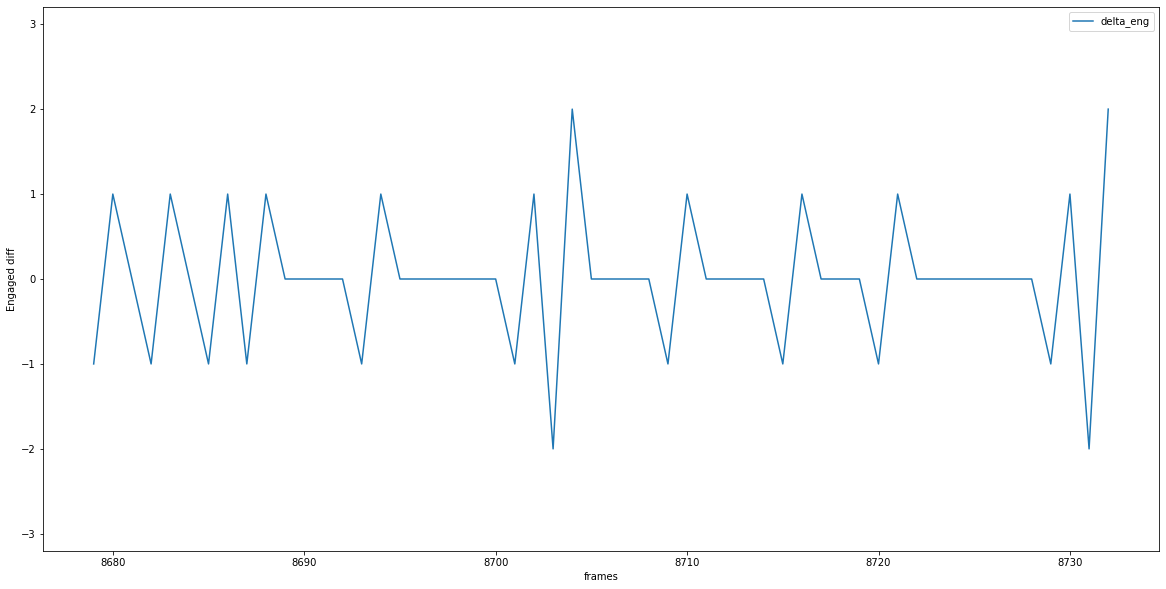

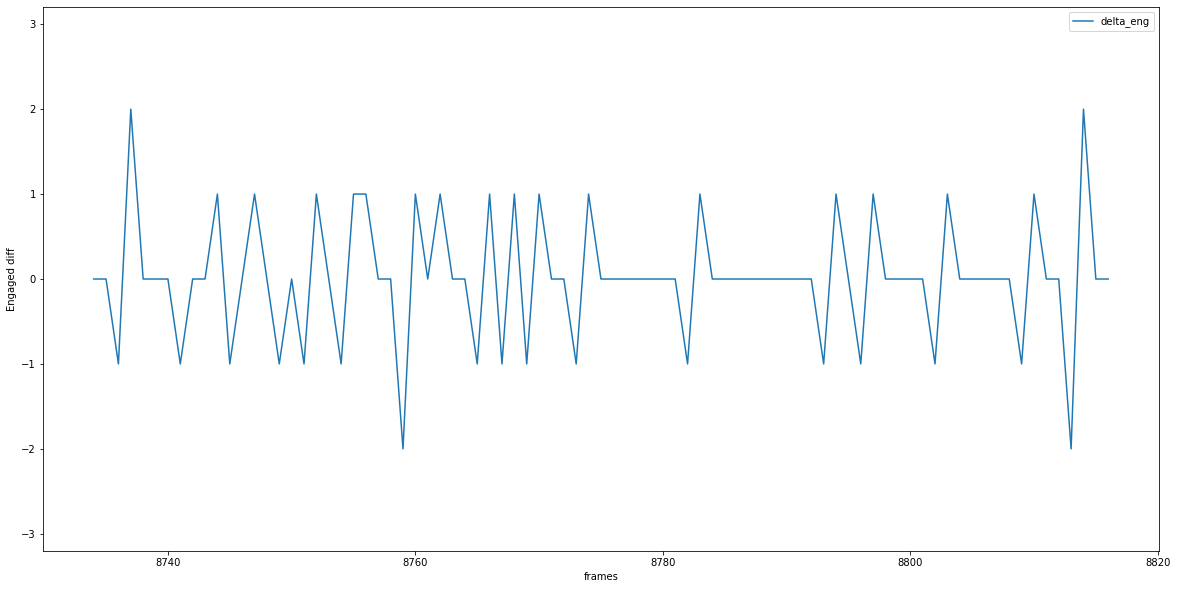

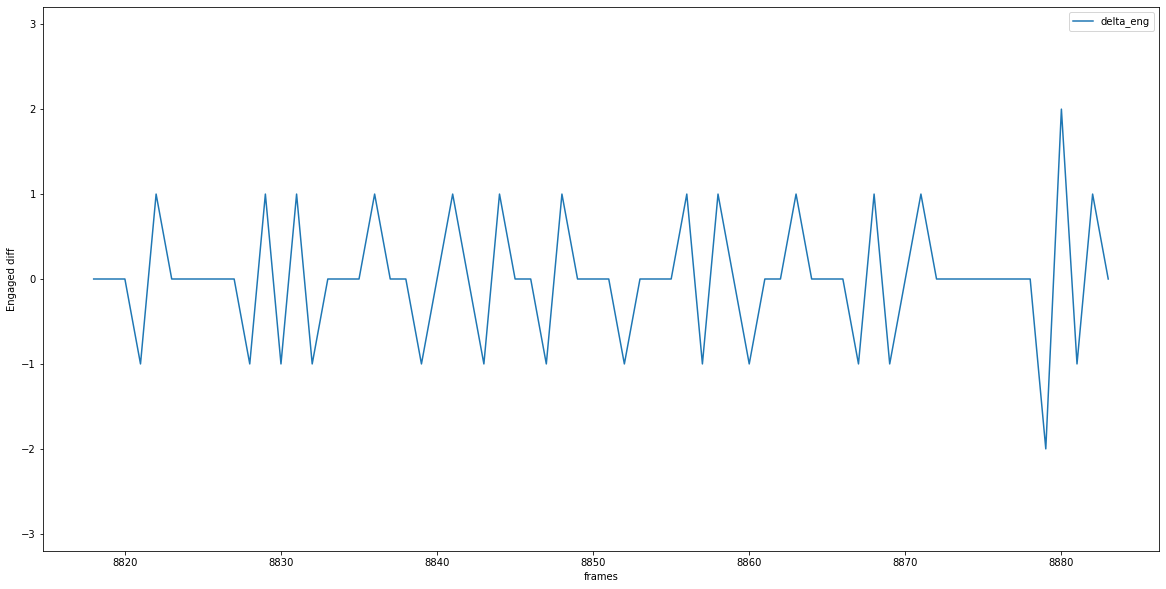

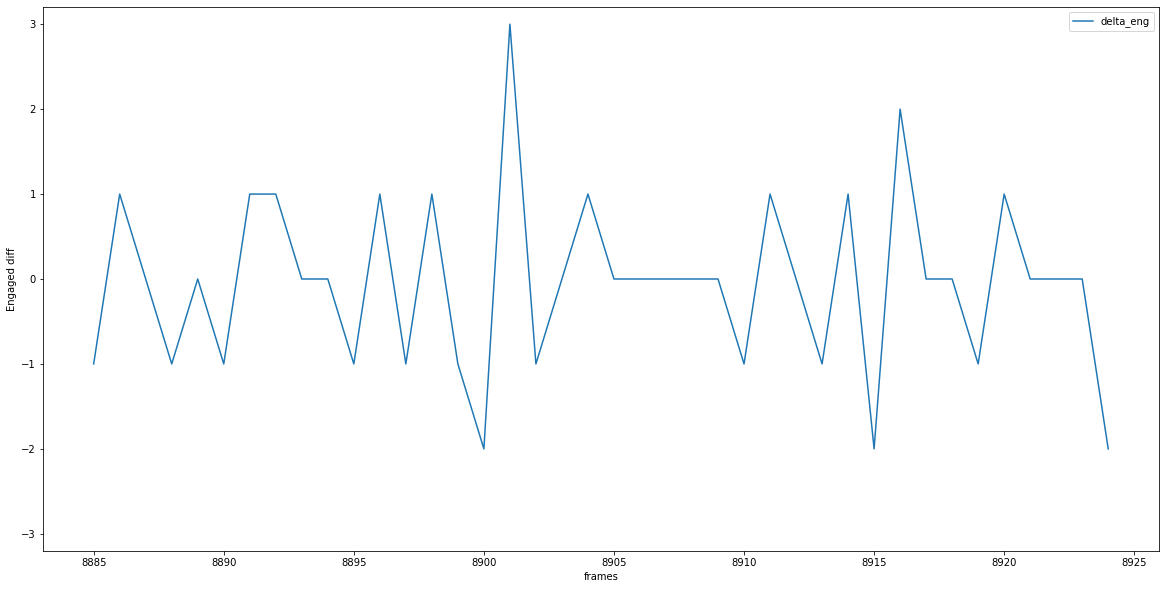

In [204]:
for idx in id_list:
    df_sample = df_sample2[df_sample2['id'] == idx]
    
    
    df_sample[['delta_eng']] = df_sample[['Engagement']].diff()
    
    df_sample.plot(y=['delta_eng'], figsize=(20,10))        
    plt.xlabel('frames')
    plt.ylabel('Engaged diff')
    plt.ylim([-3.2, 3.2])
    plt.savefig('./engagedDiff/'+idx+'.png')

    
    cnt_len = len(df_sample.loc[df_sample['delta_eng'] > 1]) # Engagement 0, 1인 개수

    print(idx)

#     break

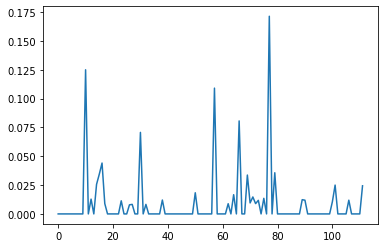

0.008914930738650725


In [169]:
plt.plot(idx_list, rate_list)
plt.show()

import statistics
mean = statistics.mean(rate_list)
print(mean)

In [ ]:


# df_sample[df_sample.columns.difference(['index'])].plot(figsize=(20,10))